---

Project Name: Diabetes Health Prediction  
Author : Fazrin Muhammad 

---

# **1. Introduction**

**Background**  
Diabetes is a chronic disease with a rising global prevalence, including in the United States. According to data from the Centers for Disease Control and Prevention (CDC), approximately 34.2 million adults in the United States, or around 13% of the adult population, were diagnosed with diabetes in 2020. This condition has significant implications for individual health and healthcare costs. The Behavioral Risk Factor Surveillance System (BRFSS) is a telephone survey conducted by the CDC to collect data on health-related risk behaviors, chronic health conditions, and preventive service utilization among adults in the United States. The BRFSS dataset provides rich information on various risk factors associated with diabetes, such as obesity rates, physical activity levels, dietary patterns, and health history.

**Objective**  
The predictive analysis aims to build a model that can identify individuals at high risk of diabetes based on relevant factors. By using BRFSS data, I'll explore with five different classificaton models: K-Nearest Neighbor (KNN), Support Vector Machine (SVM), Decision Tree, and Random Forest and also boosting algorithm XGBClassifier. Then, compare the model with the base one to choose the best option for predicting diabetes.

**Dataset Information**  
This project utilizes a raw dataset sourced from [Click Here!](https://www.kaggle.com/datasets/julnazz/diabetes-health-indicators-dataset/data?select=diabetes_binary_5050split_health_indicators_BRFSS2021.csv) titled *"Diabetes Health Indicators Dataset"* uploaded by JULLIEN NAZREEN.

**Model Deployment**
This model output has been deployed to my Huggingface space on [Click here!](https://huggingface.co/spaces/fazrinmuh/milestone2)

**Descripton Table**

| **Column** | **Description** |
|-----------------------------------|------------------------------------------------|
| Diabetes_binary | 0 = no diabetes, 1 = prediabetes and diabetes |
| HighBP | 0 = no high BP 1 = high BP |
| HighChol | 0 = no high cholesterol, 1 = high cholesterol |
| CholCheck | 0 = no cholesterol check in 5 years, 1 = yes cholesterol check in 5 years |
| BMI | Body Mass Index |
| Smoker | Have you smoked at least 100 cigarettes in your entire life? [Note: 5 packs = 100 cigarettes] 0 = no, 1 = yes |
| Stroke | (Ever told) you had a stroke. 0 = no, 1 = yes |
| HeartDiseaseorAttack | coronary heart disease (CHD) or myocardial infarction (MI) 0 = no, 1 = yes |
| PhysActivity | Physical activity in past 30 days - not including job 0 = no, 1 = yes |
| Fruits | Consume Fruit 1 or more per day 0 = no, 1 = yes |
| Veggies | Consume Vegetables 1 or more per day 0 = no, 1 = yes |
| HvyAlcoholConsump | Heavy drinkers (adult men having more than 14 drinks per week and adult women having more than 7 drinks per week) 0 = no, 1 = yes |
| AnyHealthcare | Have any kind of health care coverage, including health insurance, prepaid plans such as HMO, etc. 0 = no, 1 = yes |
| NoDocbcCost | Was there a time in the past 12 months when you needed to see a doctor but could not because of cost? 0 = no, 1 = yes |
| GenHlth | Would you say that in general your health is: scale 1-5: 1 = excellent, 2 = very good, 3 = good, 4 = fair, 5 = poor |
| MentHlth | Now thinking about your mental health, which includes stress, depression, and problems with emotions, for how many days during the past 30 days was your mental health not good? It is in days, scale will be between 0-30 |
| PhysHlth | Now thinking about your physical health, which includes physical illness and injury, for how many days during the past 30 days was your physical health not good? It is in days, scale will be between 0-30 |
| DiffWalk | Do you have serious difficulty walking or climbing stairs? 0 = no, 1 = yes |
| Sex | 0 = female, 1 = male |
| Age | 13-level age category (_AGEG5YR see codebook21 linked above): scale 1-13: 1 = 18-24, 2 = 25-29, 3 = 30-34, 4 = 35-39, 5 = 40-44, 6 = 45-49, 7 = 50-54, 8 = 55-59, 9 = 60-64, 10 = 65-69, 11 = 70-74, 12 = 75-79, 13 = 80 or older |
| Education | Education level (EDUCA see codebook21 linked above): scale 1-6: 1 or 2 or 3 = Did not graduate High School or 4 = Graduated High School or 5 = Attended College or Technical School or 6 = raduated from College or Technical School |
| Income | Income scale (INCOME3 see codebook21 linked above): scale 1-8: 1 = less than $10,000 ; 2 = Less than $15,000 ; 3 = Less than $20,000 ; 4 = Less than $25,000 ; 5 = less than $35,000 ; 6 = Less than $50,000 ; 7 = Less than $75,000 ; 8 = Less than $100,000 ; 9 = Less than $150,000 ; 10 = Less than $200,000 ; 11 = $200,000 or more |

# **2. Import Libraries**  

In [2]:
# For Data Manipulation
import pandas as pd
import numpy as np

# For Data Visualization
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
import seaborn as sns

# For Feature Engineering
from sklearn.model_selection import train_test_split
from feature_engine.outliers import Winsorizer
from scipy.stats import kendalltau, spearmanr, chi2_contingency
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.compose import ColumnTransformer
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
from sklearn.preprocessing import OneHotEncoder

# For Model Definition & Training
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

# For Model Evaluation
from sklearn.model_selection import GridSearchCV, cross_val_score, RandomizedSearchCV
from sklearn.metrics import make_scorer, classification_report, confusion_matrix, ConfusionMatrixDisplay, f1_score, accuracy_score, precision_score, recall_score

# For Saving Models
import pickle

# To Deactivate Warnings
import warnings
warnings.filterwarnings('ignore')

# Displaying all columns
pd.options.display.max_columns = 200

**explanation**  
Import libraries for analyze has sucsesfully.

# **3. Loading Data**

In [3]:
# Loading csv data
data = pd.read_csv('diabetes_binary_health_indicators_BRFSS2021.csv')

**Explanation**  
Loading datadiabetes_binary_health_indicators_BRFSS2021.csv to be our base dataset for this project.

In [4]:
# Show head data
data.head(10)

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1,0.0,1,33.0,0.0,0.0,0.0,1,1,1,0,1,0.0,2.0,15.0,0.0,1.0,1,7,6.0,9.0
1,0.0,0,1.0,1,27.0,1.0,0.0,0.0,1,0,0,0,1,0.0,2.0,1.0,2.0,0.0,1,7,6.0,6.0
2,0.0,0,1.0,1,26.0,1.0,0.0,0.0,0,0,0,0,1,0.0,3.0,0.0,30.0,0.0,1,13,4.0,3.0
3,0.0,0,0.0,1,19.0,1.0,0.0,0.0,1,1,1,0,1,0.0,3.0,0.0,0.0,0.0,0,11,5.0,7.0
4,0.0,1,0.0,1,37.0,0.0,0.0,0.0,1,1,1,0,1,0.0,2.0,0.0,0.0,0.0,0,5,5.0,3.0
5,0.0,1,1.0,1,27.0,1.0,0.0,0.0,1,1,1,1,1,0.0,1.0,0.0,1.0,0.0,0,11,6.0,8.0
6,0.0,0,0.0,1,28.0,0.0,1.0,1.0,0,0,0,0,1,0.0,5.0,30.0,30.0,1.0,0,12,5.0,4.0
7,0.0,0,0.0,1,39.0,1.0,0.0,0.0,1,0,1,0,1,0.0,5.0,0.0,30.0,0.0,0,12,5.0,6.0
8,0.0,0,0.0,1,22.0,0.0,0.0,0.0,1,1,1,0,1,0.0,3.0,7.0,0.0,0.0,0,3,6.0,7.0
9,0.0,0,0.0,1,26.0,1.0,0.0,0.0,0,0,0,0,1,0.0,2.0,30.0,0.0,1.0,0,4,6.0,2.0


**Explanation**  
Show 10 of head data on our dataset.

In [5]:
# Show tail data
data.tail(10)

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
67126,1.0,1,0.0,1,20.0,0.0,1.0,1.0,0,0,1,0,1,1.0,3.0,0.0,0.0,1.0,1,10,3.0,1.0
67127,1.0,1,1.0,1,28.0,0.0,0.0,0.0,1,1,1,0,1,0.0,3.0,0.0,0.0,1.0,0,9,2.0,6.0
67128,1.0,1,0.0,1,30.0,0.0,0.0,0.0,1,1,1,0,1,0.0,1.0,0.0,0.0,0.0,0,9,5.0,4.0
67129,1.0,0,0.0,1,36.0,0.0,0.0,1.0,0,0,0,0,0,0.0,2.0,0.0,30.0,1.0,1,9,3.0,4.0
67130,1.0,1,0.0,1,40.0,0.0,0.0,0.0,1,0,1,1,1,1.0,4.0,28.0,20.0,0.0,0,5,6.0,6.0
67131,1.0,1,0.0,1,27.0,0.0,0.0,0.0,1,1,1,0,1,0.0,3.0,0.0,0.0,0.0,1,11,5.0,6.0
67132,1.0,1,1.0,1,26.0,0.0,0.0,0.0,0,1,1,0,1,0.0,4.0,0.0,0.0,0.0,0,11,4.0,2.0
67133,1.0,1,1.0,1,32.0,0.0,0.0,1.0,1,0,0,0,1,1.0,2.0,10.0,0.0,0.0,1,8,6.0,6.0
67134,1.0,1,1.0,1,33.0,0.0,0.0,0.0,0,0,1,0,1,0.0,2.0,0.0,0.0,1.0,1,10,4.0,5.0
67135,1.0,1,1.0,1,21.0,0.0,0.0,0.0,1,1,1,0,1,0.0,4.0,0.0,0.0,0.0,1,10,2.0,3.0


**Explanation**  
Show 10 of tail data on our dataset.

In [6]:
# Show Data Summary
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67136 entries, 0 to 67135
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Diabetes_binary       67136 non-null  float64
 1   HighBP                67136 non-null  int64  
 2   HighChol              67136 non-null  float64
 3   CholCheck             67136 non-null  int64  
 4   BMI                   67136 non-null  float64
 5   Smoker                67136 non-null  float64
 6   Stroke                67136 non-null  float64
 7   HeartDiseaseorAttack  67136 non-null  float64
 8   PhysActivity          67136 non-null  int64  
 9   Fruits                67136 non-null  int64  
 10  Veggies               67136 non-null  int64  
 11  HvyAlcoholConsump     67136 non-null  int64  
 12  AnyHealthcare         67136 non-null  int64  
 13  NoDocbcCost           67136 non-null  float64
 14  GenHlth               67136 non-null  float64
 15  MentHlth           

**Explanation**  
From above we have some information as:
- The dataset comprises 22 columns and 67136 rows
- The datatype of columns had 13 float64 and 9 int64. I have confirmed that each column had correct datatype.
- At a quick look, there are no missing values in columns.

## Check Data Duplicates

In [7]:
# Check Data Duplicates
data.duplicated().sum()

737

**Explanation**  
There were 737 data duplicates from datasaet. We could be delete the data duplicates.

In [8]:
# Drop Data Duplicates
data.drop_duplicates(inplace=True)

**Explanation**  
Dropping rows that have duplicates.

In [9]:
# Re-check Data Duplicates
data.duplicated().sum()

0

**Explanation**  
Dropping duplicates data have been succesfully.

## Check Missing Values

In [10]:
# Checking missing values
data.isnull().sum()

Diabetes_binary         0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64

**Explanation**  
There is no missing values on dataset

# **4. Exploratory Data Analysis (EDA)**

## Creating Copy Data

In [11]:
# Create data copy for exploration and to keep original data
df_eda = data.copy()

**Explanation**  
Before starting the analysis, the first step is to make a copy of the data from the real data. This is done so that the real data is maintained and nothing unwanted happens when manipulating the data.

## Data Describe Summary

In [12]:
df_eda.describe().T

,count,mean,std,min,25%,50%,75%,max
Diabetes_binary,66399.0,0.502944,0.499995,0.0,0.0,1.0,1.0,1.0
HighBP,66399.0,0.551198,0.497376,0.0,0.0,1.0,1.0,1.0
HighChol,66399.0,0.502312,0.499998,0.0,0.0,1.0,1.0,1.0
CholCheck,66399.0,0.976054,0.152883,0.0,1.0,1.0,1.0,1.0
BMI,66399.0,30.333318,7.111725,12.0,26.0,29.0,34.0,99.0
Smoker,66399.0,0.443260,0.496774,0.0,0.0,0.0,1.0,1.0
Stroke,66399.0,0.059504,0.236567,0.0,0.0,0.0,0.0,1.0
HeartDiseaseorAttack,66399.0,0.137969,0.344870,0.0,0.0,0.0,0.0,1.0
PhysActivity,66399.0,0.714333,0.451735,0.0,0.0,1.0,1.0,1.0
Fruits,66399.0,0.602916,0.489297,0.0,0.0,1.0,1.0,1.0


In [13]:
modus = df_eda.mode()
modus

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,1.0,1,1.0,1,27.0,0.0,0.0,0.0,1,1,1,0,1,0.0,3.0,0.0,0.0,0.0,0,10,6.0,7.0


**Exp**  
There are data summary from dataset. We have some information as like:
- Almost all of these features are descrete categorical, except BMI is continous numerical
- The average BMI of individuals is 30.33, with minimum from 12 to 99 of BMI maximum.
- Individuals who smoked at least 100 cigarettes in their entire life called smoker, then the majority is 0 (no smoker).
- The stroke of individuals are majority is 0 (no stroke).
- The age of individuals are majority from 10 which is 65-69 years old.
- The gender of individuals are majority is 0 (female).

## Comparison of Diabetes Status

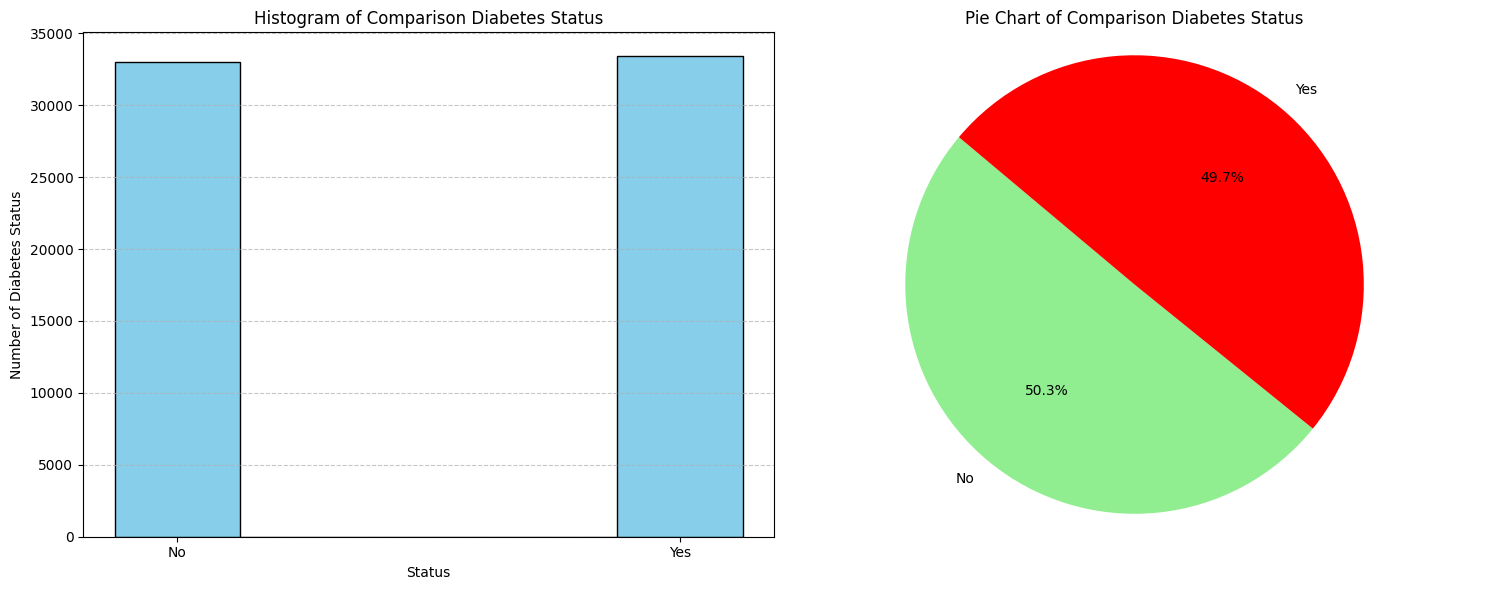

In [14]:
# Histogram and Pie Chart of Comparison of Diabetes Status

# Diabetes status
diabetes_status = df_eda['Diabetes_binary'].value_counts()

# Figure and axis
fig, axs = plt.subplots(1, 2, figsize=(15, 6))

# Histogram
axs[0].hist(df_eda['Diabetes_binary'], bins=5, color='skyblue', edgecolor='black')
axs[0].set_title('Histogram of Comparison Diabetes Status')
axs[0].set_xlabel('Status')
axs[0].set_ylabel('Number of Diabetes Status')
axs[0].set_xticks([0.1, 0.9])
axs[0].set_xticklabels(['No', 'Yes'])
axs[0].grid(axis='y', linestyle='--', alpha=0.7)

# Pie Chart
axs[1].pie(diabetes_status, labels=['No', 'Yes'], autopct='%1.1f%%', startangle=140, colors=['lightgreen', 'red'])
axs[1].set_title('Pie Chart of Comparison Diabetes Status')
axs[1].axis('equal')

# Showing the Plot
plt.tight_layout()
plt.show()

**Explanation**  
From the overall comparison diabetes status of dataset, we have 50.3% that negative diabetes and 49.7% that positive diabetes. 

## Distribution of `BMI`, `Age` by Diabetes Status

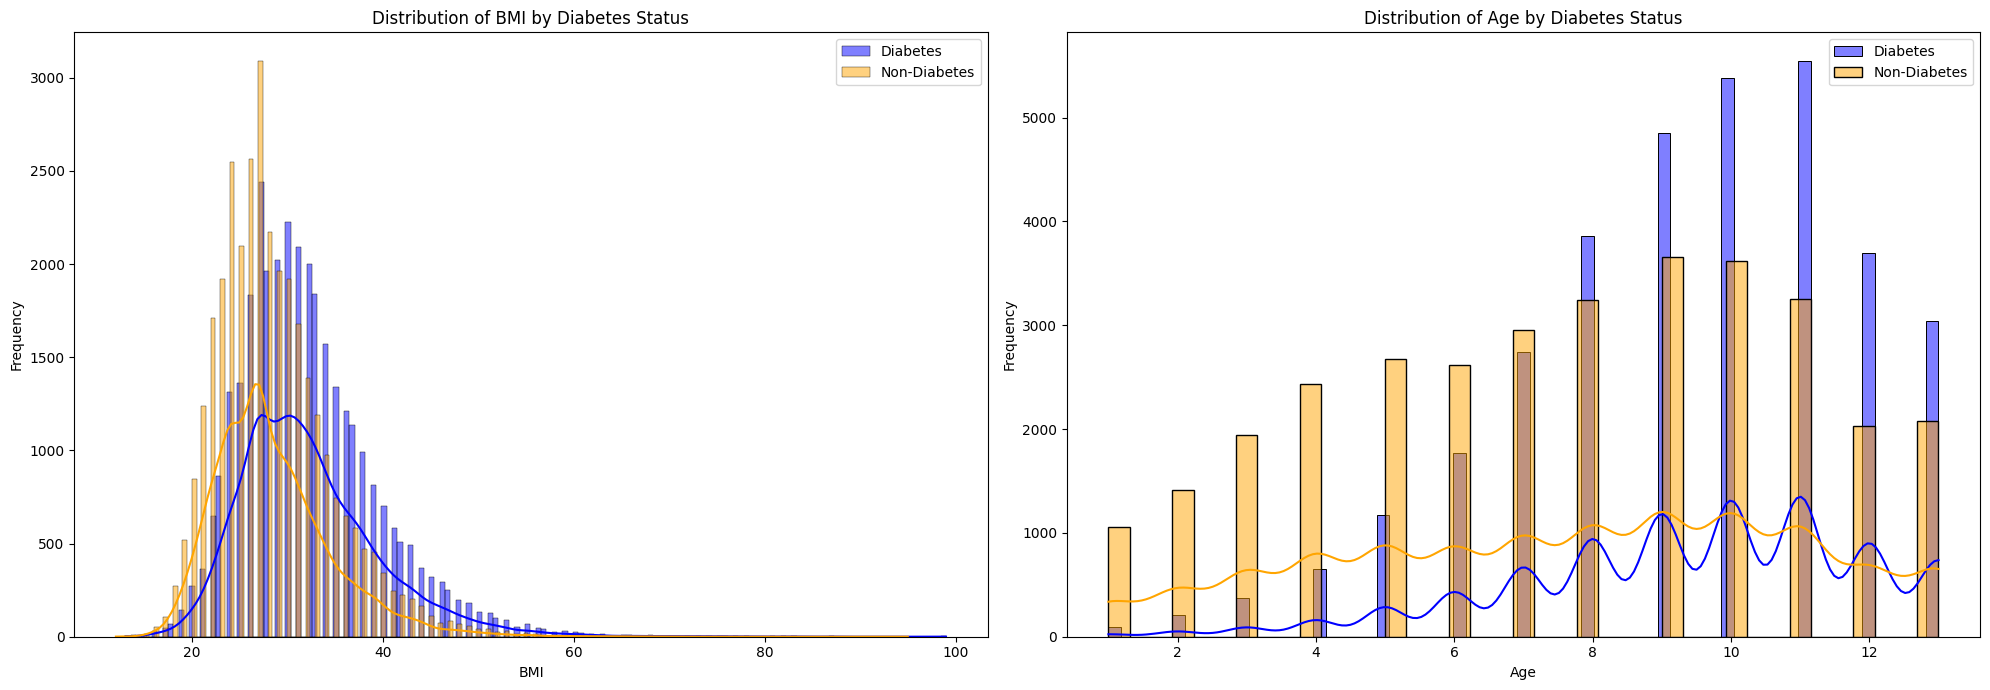

In [15]:
# Data subsets for diabetes and non-diabetes
diabetes_data = df_eda[df_eda['Diabetes_binary'] == 1]
non_diabetes_data = df_eda[df_eda['Diabetes_binary'] == 0]

# Columns to be analyzed
columns_to_analyze = ['BMI', 'Age']

plt.figure(figsize=(20, 7))

# Histogram plot for each column
for column in columns_to_analyze:
    plt.subplot(1, 2, columns_to_analyze.index(column)+1)
    sns.histplot(diabetes_data[column], color='blue', kde=True, label='Diabetes')
    sns.histplot(non_diabetes_data[column], color='orange', kde=True, label='Non-Diabetes')
    plt.title(f'Distribution of {column} by Diabetes Status')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.legend()

plt.tight_layout()
plt.show()

**Explanation**  
From above distribution we have some information as like:
- BMI distribution for both of diabetes status have a roughly normal distribution, but the distribution for individuals with diabetes is shifted to the right. This indicates, on average of diabetes have higher BMI than those without diabetes.
- The age distribution for diabetes is generally skewed to the right, showing that older age groups have higher frequencies of diabetes. Then, for non diabetes the age distribution seems relatively uniform, but with a slight increase in frequency in the middle age ranges. Anyway, the diabetes is more prevalent in older population.

## Diabetes Status by Health Risk Factor

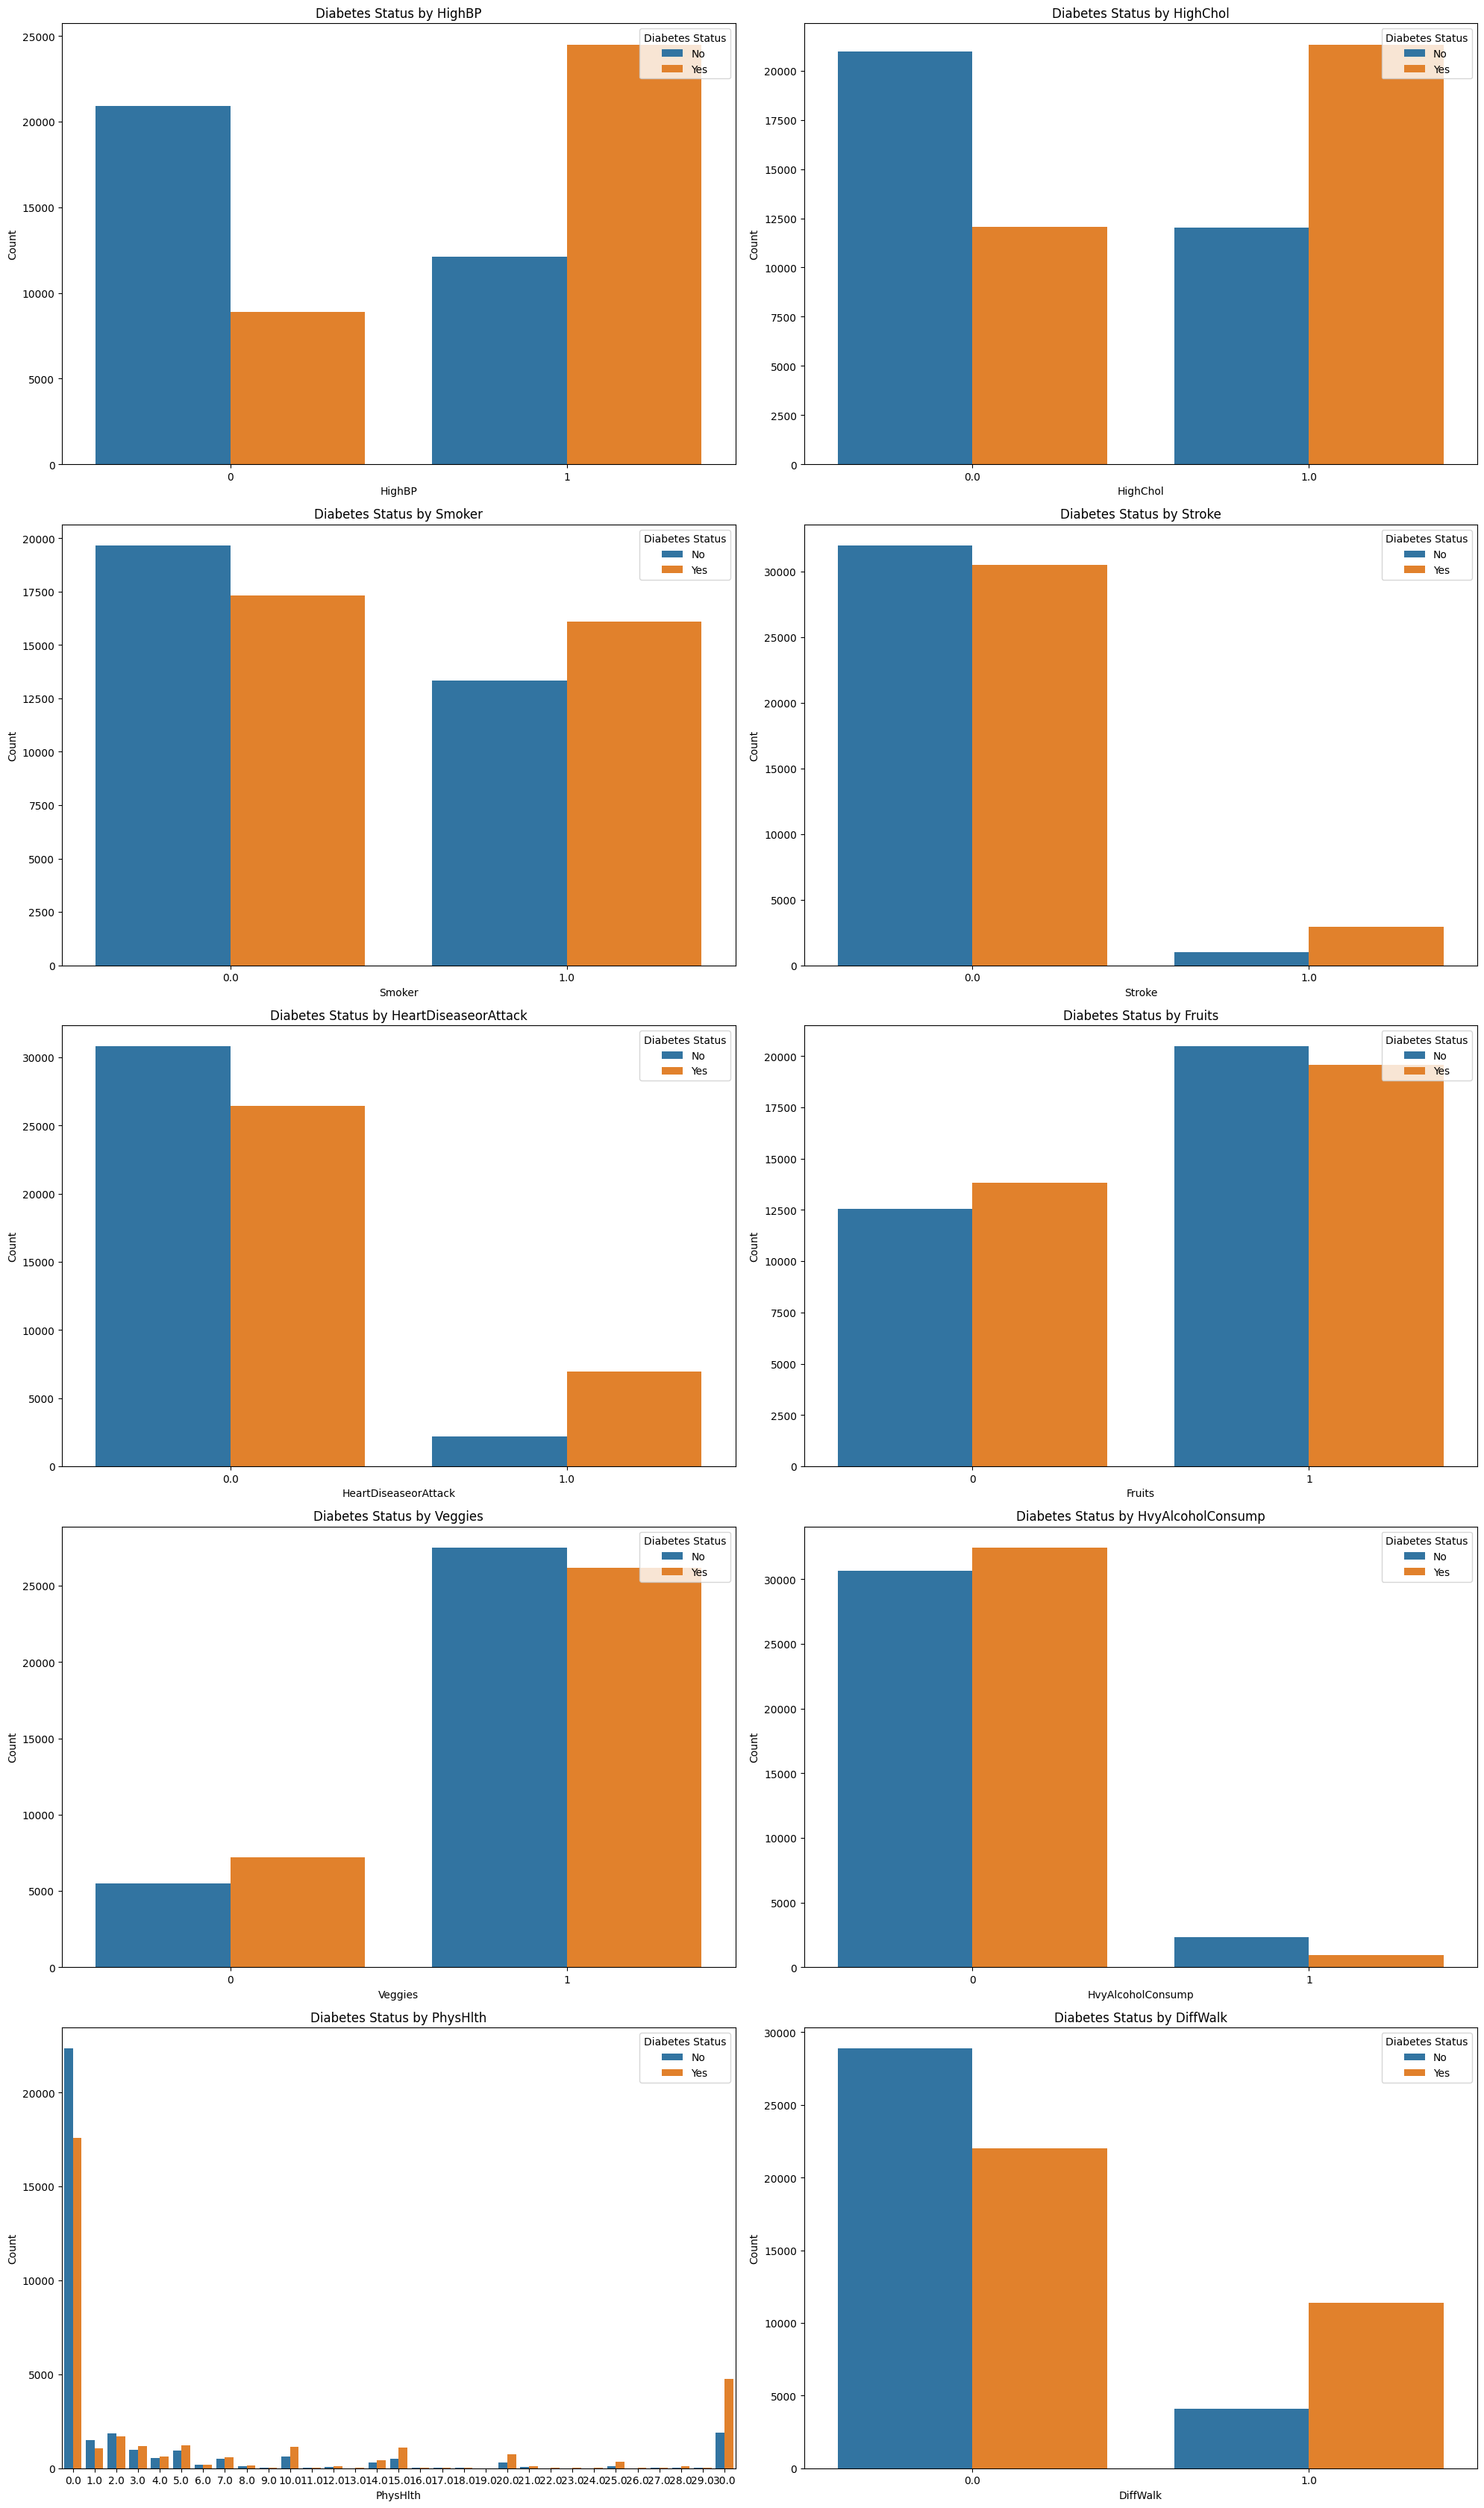

In [46]:
# Selecting the variables to be used for segmentation
healthrisk_var = ['HighBP', 'HighChol', 'Smoker', 'Stroke', 'HeartDiseaseorAttack', 'Fruits', 'Veggies', 'HvyAlcoholConsump', 'PhysHlth', 'DiffWalk']

# Create subplots for each segmentation variable
plt.figure(figsize=(20, 40))
for i, var in enumerate(healthrisk_var):
    plt.subplot(6, 2, i+1)
    sns.countplot(x=var, hue='Diabetes_binary', data=df_eda)
    plt.title(f'Diabetes Status by {var}')
    plt.xlabel(var)
    plt.ylabel('Count')
    plt.legend(title='Diabetes Status', loc='upper right', labels=['No', 'Yes'])
plt.tight_layout()
plt.show()

**Explanation**  
We can see the status of diabetes based on health risk factors, here is the information that can be obtained:
- A larger number of individuals with high blood pressure also have diabetes compared to those who don't have high blood pressure. This suggest, a strong association between high blood pressure and diabetes.
- Similar to high blood pressure, high cholesterol levels are also more common in individuals with diabetes than in those without. This could indicate that high cholesterol is another condition that is commonly associated with diabetes.
- The difference between smokers and non-smokers in terms of diabetes prevalence is less pronounced than in the cases of high blood pressure or cholesterol. Smoking does not appear to show a clear pattern of association with diabetes in this data.
- Individuals that have history of stroke also tend to have higher rates of diabetes. There appears to be an association between the incidence of stroke and diabetes.
- There are more individuals with diabetes who have had a heart disease or attack than those without diabetes. This suggests that there is significant assocation between diabetes and heart-related health issues.
- There is difference in the consumption of fruits between diabetes and non-diabetes individuals, with non-diabetics more likely to consume fruits. This suggests that a potential assocation between fruits consumption and diabetes rates
- Like with fruits, a greater proportion of non-diabetics consume vegetables. This also suggests a potential assocation between vegetable consumption and lower diabetes rates
- The heavy alcohol consumption have fewer individuals with diabetes compared to those without. Then, Iindividuals who do not consume alcohol heavily, there are more individuals with diabetes than without.

## Diabetes Status by `Education` and `Sex`

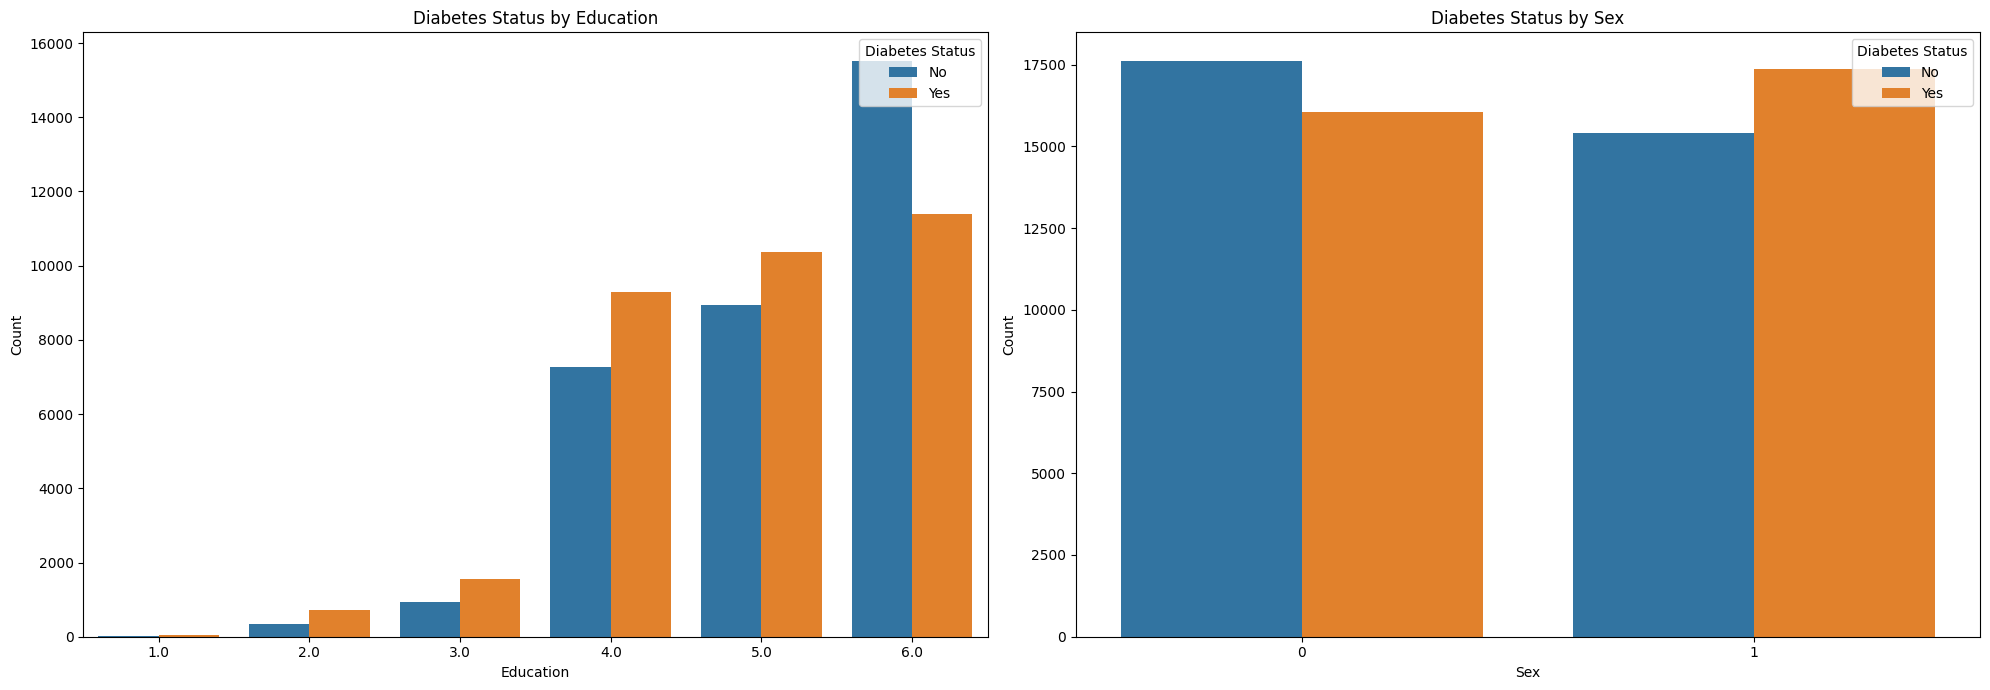

In [17]:
# Memilih variabel yang akan digunakan untuk segmentasi
segment_vars = ['Education', 'Sex']

# Membuat subplots untuk setiap variabel segmentasi
plt.figure(figsize=(20, 7))
for i, var in enumerate(segment_vars):
    plt.subplot(1, 2, i+1)
    sns.countplot(x=var, hue='Diabetes_binary', data=df_eda)
    plt.title(f'Diabetes Status by {var}')
    plt.xlabel(var)
    plt.ylabel('Count')
    plt.legend(title='Diabetes Status', loc='upper right', labels=['No', 'Yes'])
plt.tight_layout()
plt.show()

**Explanation**  
From visualization above, we have information as like:
- Education is ordinal categorical, for both diabetes status have majority of population a higher level education. However, the education level might indicate have relationship with diabetes status, possibly due to factors like better health awareness and lifestyle choices associated with higher education levels.
- The bar chart compares the count of individuals with and without diabetes between two sex categories, typically '0' represent females and '1' represent males. Males has a slightly higher count of individuals with diabetes compared to females.

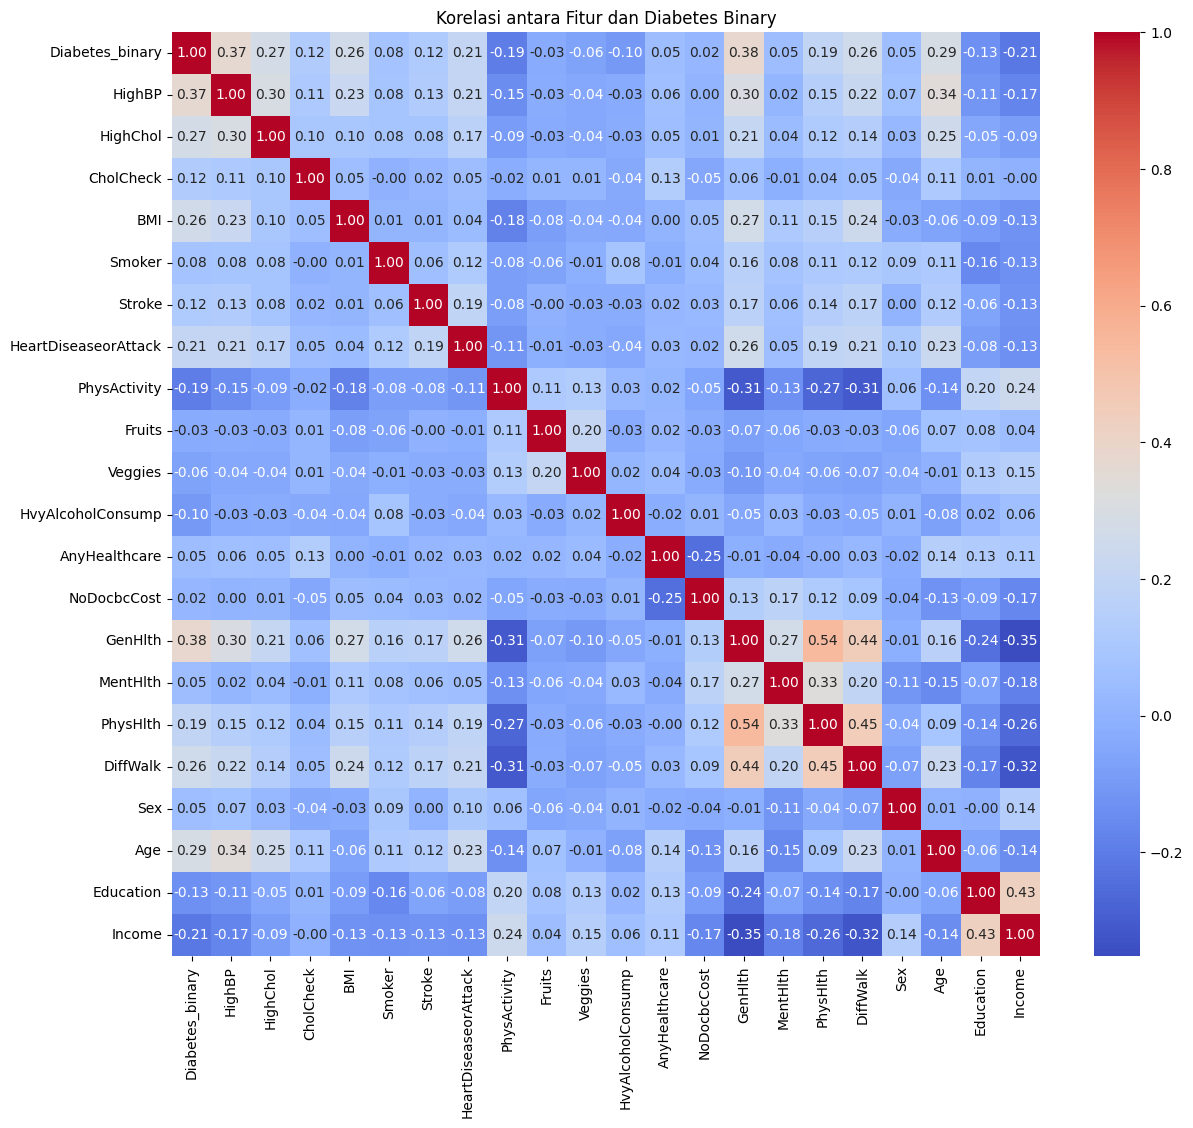

In [18]:
# Menghitung korelasi antar fitur
corr = df_eda.corr()

# Membuat heatmap
plt.figure(figsize=(14, 12))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Korelasi antara Fitur dan Diabetes Binary')
plt.show()

# **5. Feature Engineering**

## Create Copy Data

In [19]:
# Create data copy for feature enigneering and to keep original data
df = data.copy()

**Explanation**  
Before starting create model, the first step is to make a copy of the data from the real data.

## Cardinality Check

In [20]:
# Set the maximum column width to None to display the entire content of each column
pd.set_option('display.max_colwidth', None)

# Set the maximum number of rows to None to display all rows
pd.set_option('display.max_rows', None)

# Create a looping for unique values details
listItem = []
for col in df.columns :
    listItem.append( [col, df[col].nunique(), df[col].unique()])

# Create into a dataframe
unique_val_df = pd.DataFrame(columns=['Column Name', 'Number of Unique', 'Unique Sample'],
                     data=listItem)

# Show the dataframe
unique_val_df

,Column Name,Number of Unique,Unique Sample
0,Diabetes_binary,2,"[0.0, 1.0]"
1,HighBP,2,"[1, 0]"
2,HighChol,2,"[0.0, 1.0]"
3,CholCheck,2,"[1, 0]"
4,BMI,79,"[33.0, 27.0, 26.0, 19.0, 37.0, 28.0, 39.0, 22.0, 30.0, 21.0, 32.0, 25.0, 49.0, 41.0, 20.0, 44.0, 24.0, 31.0, 34.0, 29.0, 42.0, 23.0, 38.0, 50.0, 36.0, 35.0, 40.0, 17.0, 46.0, 58.0, 56.0, 61.0, 54.0, 18.0, 52.0, 15.0, 43.0, 16.0, 47.0, 53.0, 45.0, 48.0, 55.0, 74.0, 57.0, 51.0, 71.0, 67.0, 66.0, 90.0, 59.0, 60.0, 65.0, 70.0, 78.0, 77.0, 13.0, 14.0, 63.0, 62.0, 72.0, 95.0, 68.0, 12.0, 79.0, 64.0, 69.0, 75.0, 82.0, 83.0, 73.0, 76.0, 81.0, 86.0, 87.0, 84.0, 99.0, 91.0, 94.0]"
5,Smoker,2,"[0.0, 1.0]"
6,Stroke,2,"[0.0, 1.0]"
7,HeartDiseaseorAttack,2,"[0.0, 1.0]"
8,PhysActivity,2,"[1, 0]"
9,Fruits,2,"[1, 0]"


**Explanation**  
From the table above, we have information as like:
- The dataset is mainly consist of low cardinality. Only `BMI`, `MentHlth`, and `PhysHlth` that have high cardinality.
- The category of of datasets are descrete numerical and continous numerical.  
    - Descrete numerical: `HighBP`, `HighChol`, `CholCheck`, `Smoker`, `Stroke`, `HeartDiseaseorAttack`, `PhysActivity`, `Fruits`, `Veggies`, `HvyAlcoholConsump`, `AnyHealthcare`, `NoDocbcCost`, `GenHlth`, `MentHlth`, `PhysHlth`, `DiffWalk`, `Sex`, `Age`, `Education`, `Income`.
    - Continous numerical: `BMI` 

## Split Train-Test

In [21]:
# Split features (X) and Target (y) 
X = df.drop(['Diabetes_binary'], axis=1) #Features
y = df['Diabetes_binary'] #Label or target

**Explanation**  
Drop target from features (X) then append to be label or target (y). `Diabetes_binary` is the target to predict diabetes status.

In [22]:
# Split between train data and test data
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size = 0.3,           #Test size 30%
                                                    random_state = 99)         #Random state 99

# Melihat total baris train dan test
print(f'X train shape: {X_train.shape}')
print(f'y train shape: {y_train.shape}')
print(f'X test shape: {X_test.shape}')

X train shape: (46479, 21)
y train shape: (46479,)
X test shape: (19920, 21)


**Explanation**  
The test set size is 30% and train set size is 70% of the dataset. Train set consists of 46479 samples and 21 features, comparises test size cosists of 19920 and 21 features.

## Outlier Handling

In [23]:
# Create function to search the skew value, upper and lower boundaries, and outlier flag
def outlier_analysis(data):

    # create the dataframe and empty lists
    result = pd.DataFrame()
    col_name = []
    skew = []
    upper = []
    lower = []
    has_outliers = []  # New list to indicate if a column has outliers

    # Loop for the columns
    for col in data.columns:
        col_name.append(col)

        # calculate skewness
        skew_val = data[col].skew()
        skew.append(skew_val)

        # Highly skewed upper and lower boundaries
        if skew_val > 1 or skew_val < -1:
            IQR = data[col].quantile(0.75) - data[col].quantile(0.25)

            lower_boundary = data[col].quantile(0.25) - (IQR * 3)
            upper_boundary = data[col].quantile(0.75) + (IQR * 3)

        # Moderately skewed
        elif skew_val >= 0.5 or skew_val <= -0.5:
            IQR = data[col].quantile(0.75) - data[col].quantile(0.25)

            lower_boundary = data[col].quantile(0.25) - (IQR * 1.5)
            upper_boundary = data[col].quantile(0.75) + (IQR * 1.5)

        # Normally distributed
        else:
            std = data[col].quantile(0.75) - data[col].quantile(0.25)

            lower_boundary = data[col].mean() - (std * 3)
            upper_boundary = data[col].mean() + (std * 3)
        
        # Append the upper and lower value
        upper.append(upper_boundary)
        lower.append(lower_boundary)
        
        # Check for outliers
        outliers = (data[col] < lower_boundary) | (data[col] > upper_boundary)
        has_outliers.append(any(outliers))

    # Add into the dataframe
    result['columns'] = col_name
    result['skewness'] = skew
    result['upper boundary'] = upper
    result['lower boundary'] = lower
    result['has_outliers'] = has_outliers  # Add the has_outliers column

    return result

In [24]:
# Continous Variables
contious_cols = ['BMI']

# Descrete Variables
descrete_cols = ['HighBP', 'HighChol', 'CholCheck', 'Smoker', 'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies', 'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth', 'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education', 'Income']

# Select the data except categorical and target columns
outlier_check = X_train[contious_cols + descrete_cols]

# Check the data skewness and boundaries
outlier_df = outlier_analysis(outlier_check)
outlier_df

,columns,skewness,upper boundary,lower boundary,has_outliers
0,BMI,1.264643,61.000000,-2.000000,True
1,HighBP,-0.204908,3.550958,-2.449042,False
2,HighChol,-0.002625,3.500656,-2.499344,False
3,CholCheck,-6.215922,1.000000,1.000000,True
4,Smoker,0.212168,3.447256,-2.552744,False
5,Stroke,3.701369,0.000000,0.000000,True
6,HeartDiseaseorAttack,2.103719,0.000000,0.000000,True
7,PhysActivity,-0.945649,2.500000,-1.500000,False
8,Fruits,-0.420508,3.602874,-2.397126,False
9,Veggies,-1.563824,1.000000,1.000000,True


**Explanation**  
From the code above I split between continous cols and descrete cols based on cardinality check previously. Then, outlier appears on some features. The outlier will be handle next on.

In [25]:
# Define a function to categorize skewness
def categorize_skewness(skewness):
    if np.abs(skewness) < 0.5:
        return 'low skewness'
    elif np.abs(skewness) < 1:
        return 'high skewness'
    else:
        return 'extreme skewness'

# Apply the function to the 'skewness' column to create a new 'skewness_category' column
outlier_df['skewness_category'] = outlier_df['skewness'].apply(categorize_skewness)

# Define a function to decide on the capping method
def decide_capping_method(skewness_category):
    if skewness_category == 'low skewness':
        return 'Gaussian'
    elif skewness_category == 'high skewness':
        return 'Quantiles'
    else:
        return 'Interquartile Range (IQR)'

# Apply the function to the 'skewness_category' column to create a new 'capping_method' column
outlier_df['capping_method'] = outlier_df['skewness_category'].apply(decide_capping_method)
outlier_df[outlier_df['has_outliers']==True]


,columns,skewness,upper boundary,lower boundary,has_outliers,skewness_category,capping_method
0,BMI,1.264643,61.0,-2.0,True,extreme skewness,Interquartile Range (IQR)
3,CholCheck,-6.215922,1.0,1.0,True,extreme skewness,Interquartile Range (IQR)
5,Stroke,3.701369,0.0,0.0,True,extreme skewness,Interquartile Range (IQR)
6,HeartDiseaseorAttack,2.103719,0.0,0.0,True,extreme skewness,Interquartile Range (IQR)
9,Veggies,-1.563824,1.0,1.0,True,extreme skewness,Interquartile Range (IQR)
10,HvyAlcoholConsump,4.159970,0.0,0.0,True,extreme skewness,Interquartile Range (IQR)
11,AnyHealthcare,-5.134325,1.0,1.0,True,extreme skewness,Interquartile Range (IQR)
12,NoDocbcCost,3.464560,0.0,0.0,True,extreme skewness,Interquartile Range (IQR)
14,MentHlth,2.170244,16.0,-12.0,True,extreme skewness,Interquartile Range (IQR)
15,PhysHlth,1.841604,20.0,-15.0,True,extreme skewness,Interquartile Range (IQR)


**Explanation**  
The features that have extreme skewness will be capping with IQR method.

In [26]:
# have outlier
have_outliers = ['CholCheck', 'Stroke', 'HeartDiseaseorAttack', 'Veggies', 'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'DiffWalk']

# Capping the skewed distribution
winsoriser_fare = Winsorizer(
    capping_method='gaussian',
    tail='both',
    fold=3,
    variables=have_outliers,
    missing_values = 'ignore'
)

X_train_capped = winsoriser_fare.fit_transform(X_train)
X_test_capped = winsoriser_fare.transform(X_test)

**Explanation**  
The code above is about to handling outlier with winsorizer with gaussian. Because that features have low cardinality so can't to handling with iqr method.

In [27]:
# have outlier
have_outliers = ['BMI', 'MentHlth', 'PhysHlth']

# Capping the skewed distribution
winsoriser_fare = Winsorizer(
    capping_method='iqr',
    tail='both',
    fold=3,
    variables=have_outliers,
    missing_values = 'ignore'
)

X_train_capped = winsoriser_fare.fit_transform(X_train_capped)
X_test_capped = winsoriser_fare.transform(X_test_capped)

**Explanation**  
The code above is about to handling outlier with winsorizer with iqr.

In [28]:
# Plot Distribution Comparison
def outlier_handling_plot_comparison(df_before, df_after, variable):
    """
    This function is created to plot histograms and boxplots for a variable before and after outlier handling
    
    Parameters:
    - df_before (pandas.DataFrame): DataFrame before outlier handling
    - df_after (pandas.DataFrame): DataFrame after outlier handling
    - variable (str): The variable to plot
    
    Example: 
    num_cols = ['numeric_column']                                   <- Enter the numeric column
    for col in num_cols:                                            <- make a for loop in numeric column to access every columns
        plot_distribution_comparison(X_train, X_train_capped, col)  <- put X_train, X_train_capped, and columns in the variable

    """
    # Figure Size, and Super Title based on variable
    fig, axes = plt.subplots(2, 2, figsize=(15, 10))                               
    fig.suptitle(f'{variable} - Distribution Before and After Outlier Handling')

    # Plot Histogram Before
    sns.histplot(df_before[variable], bins=30, ax=axes[0, 0], color='skyblue')
    axes[0, 0].set_title('Histogram Before')

    # Plot Boxplot Before
    sns.boxplot(y=df_before[variable], ax=axes[1, 0], color='lightgreen')
    axes[1, 0].set_title('Boxplot Before')

    # Plot Histogram After
    sns.histplot(df_after[variable], bins=30, ax=axes[0, 1], color='skyblue')
    axes[0, 1].set_title('Histogram After')

    # Plot Boxplot After
    sns.boxplot(y=df_after[variable], ax=axes[1, 1], color='lightgreen')
    axes[1, 1].set_title('Boxplot After')

    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

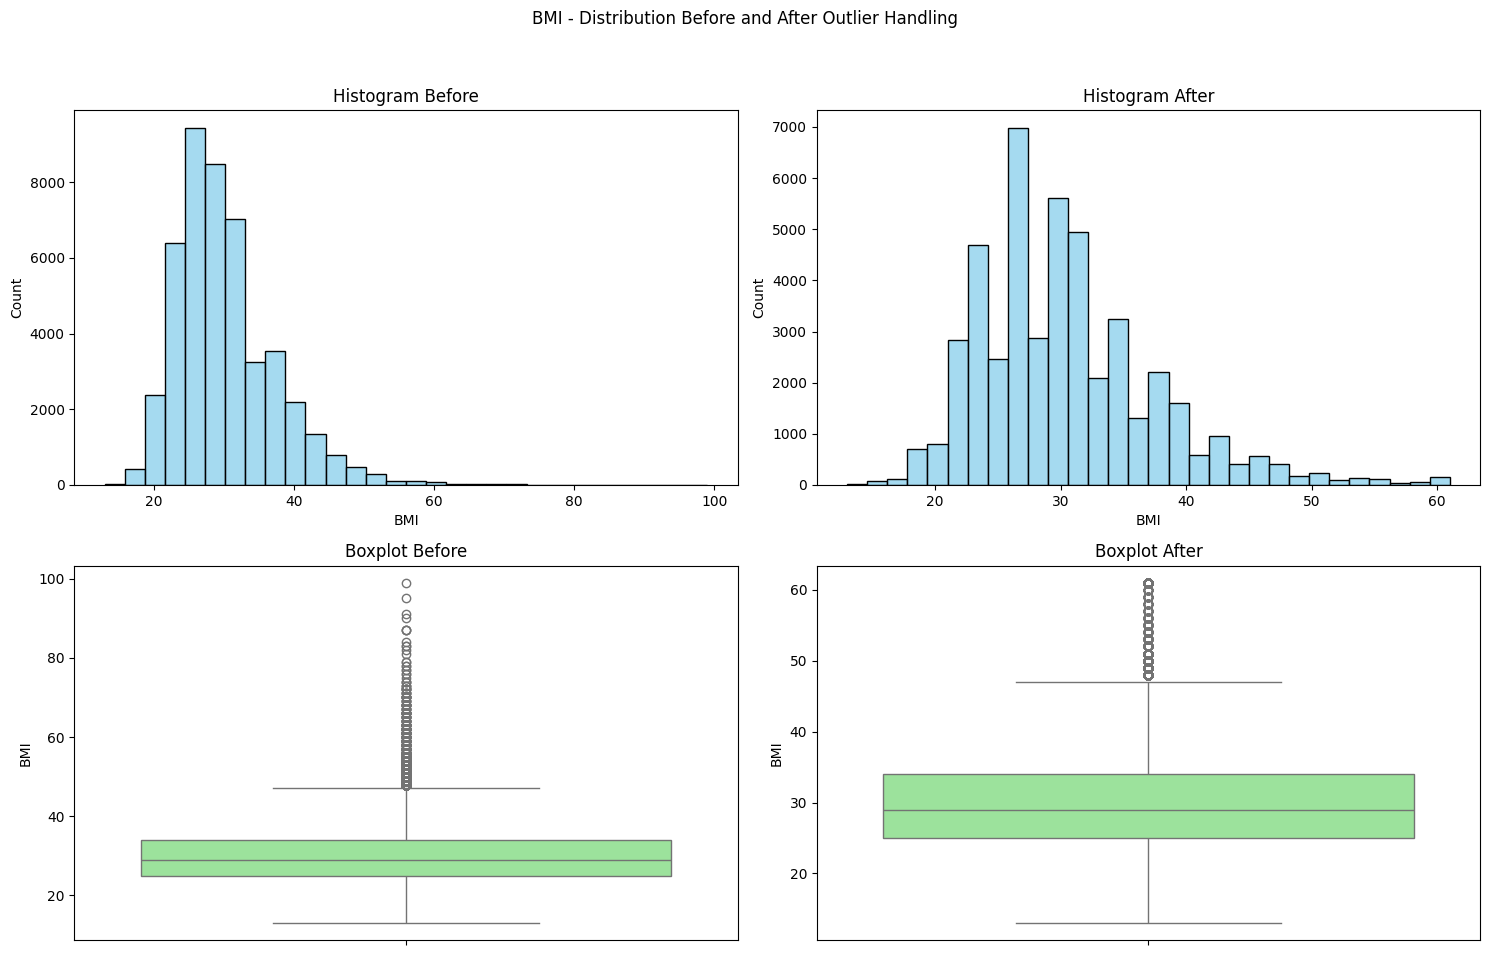

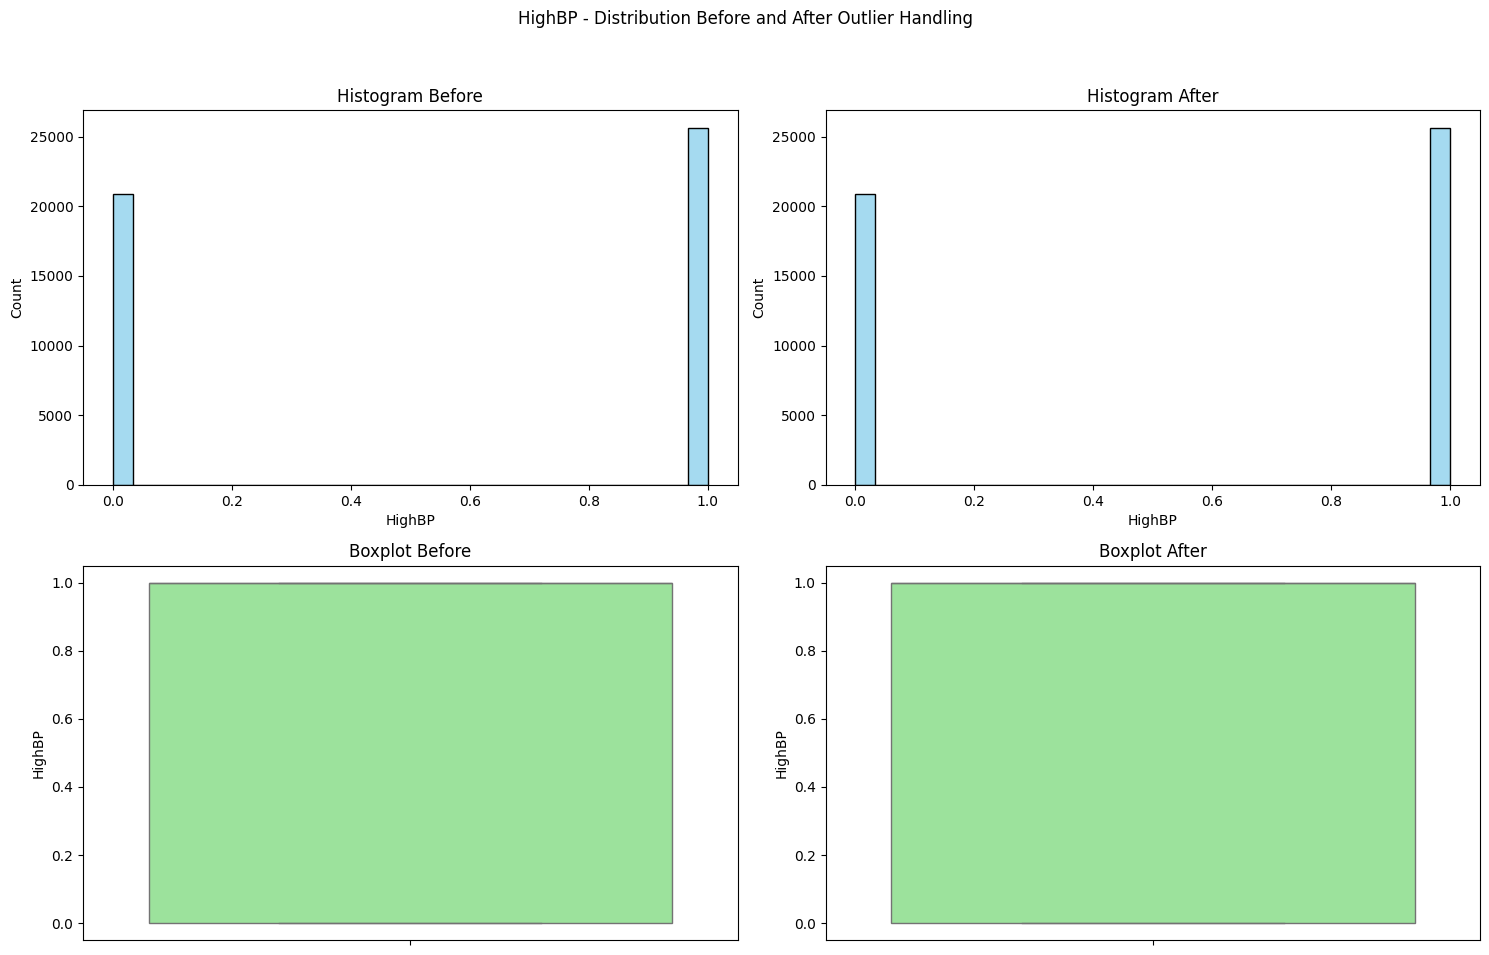

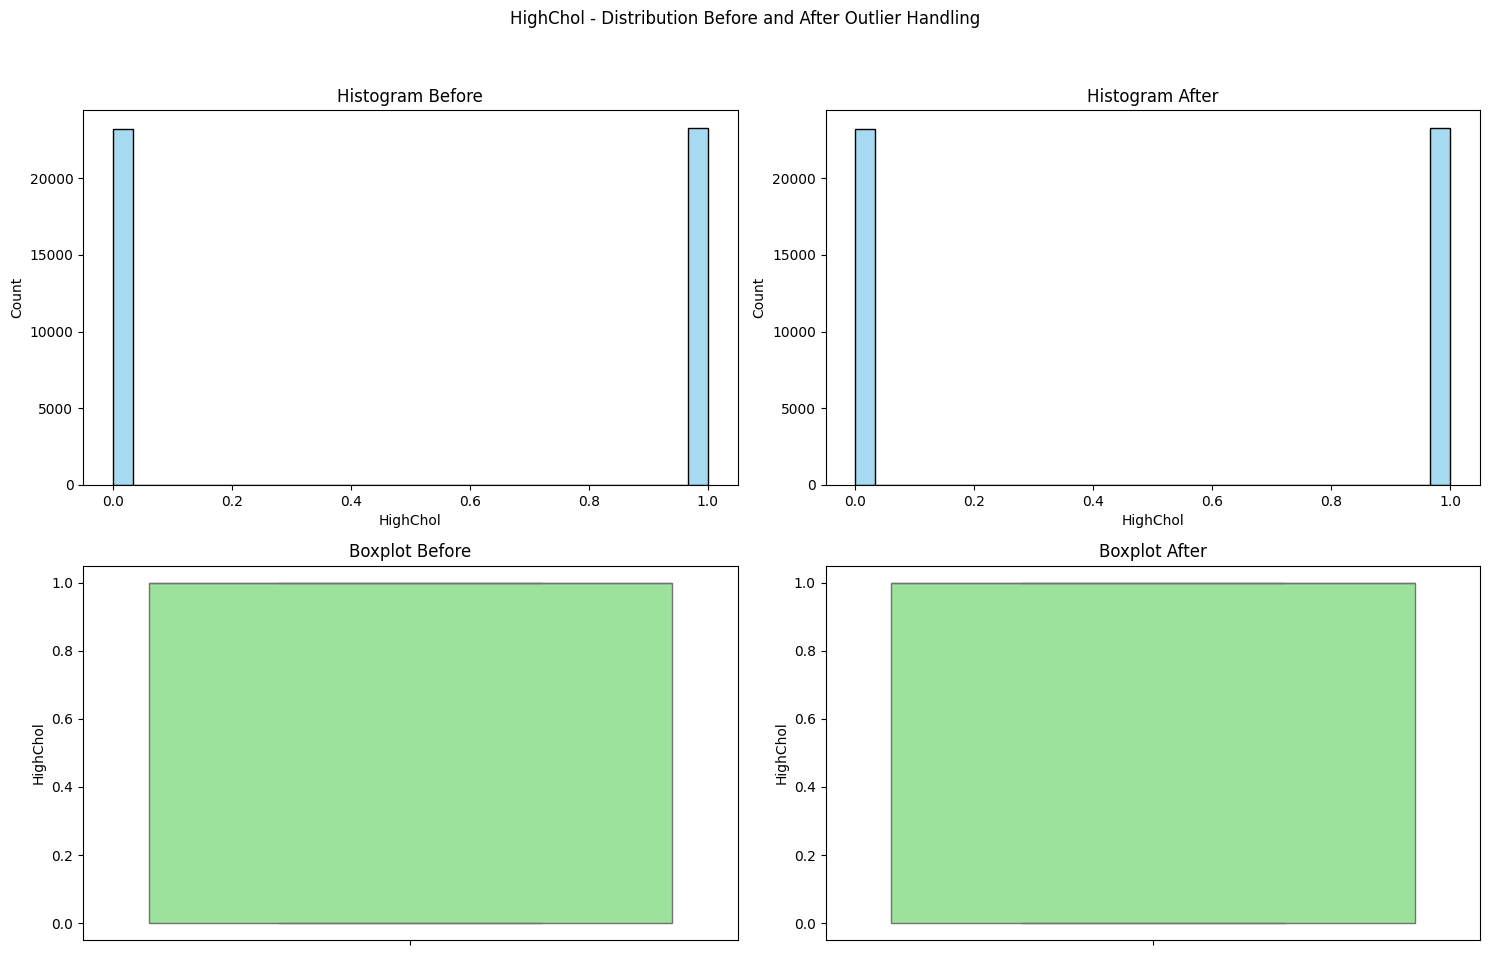

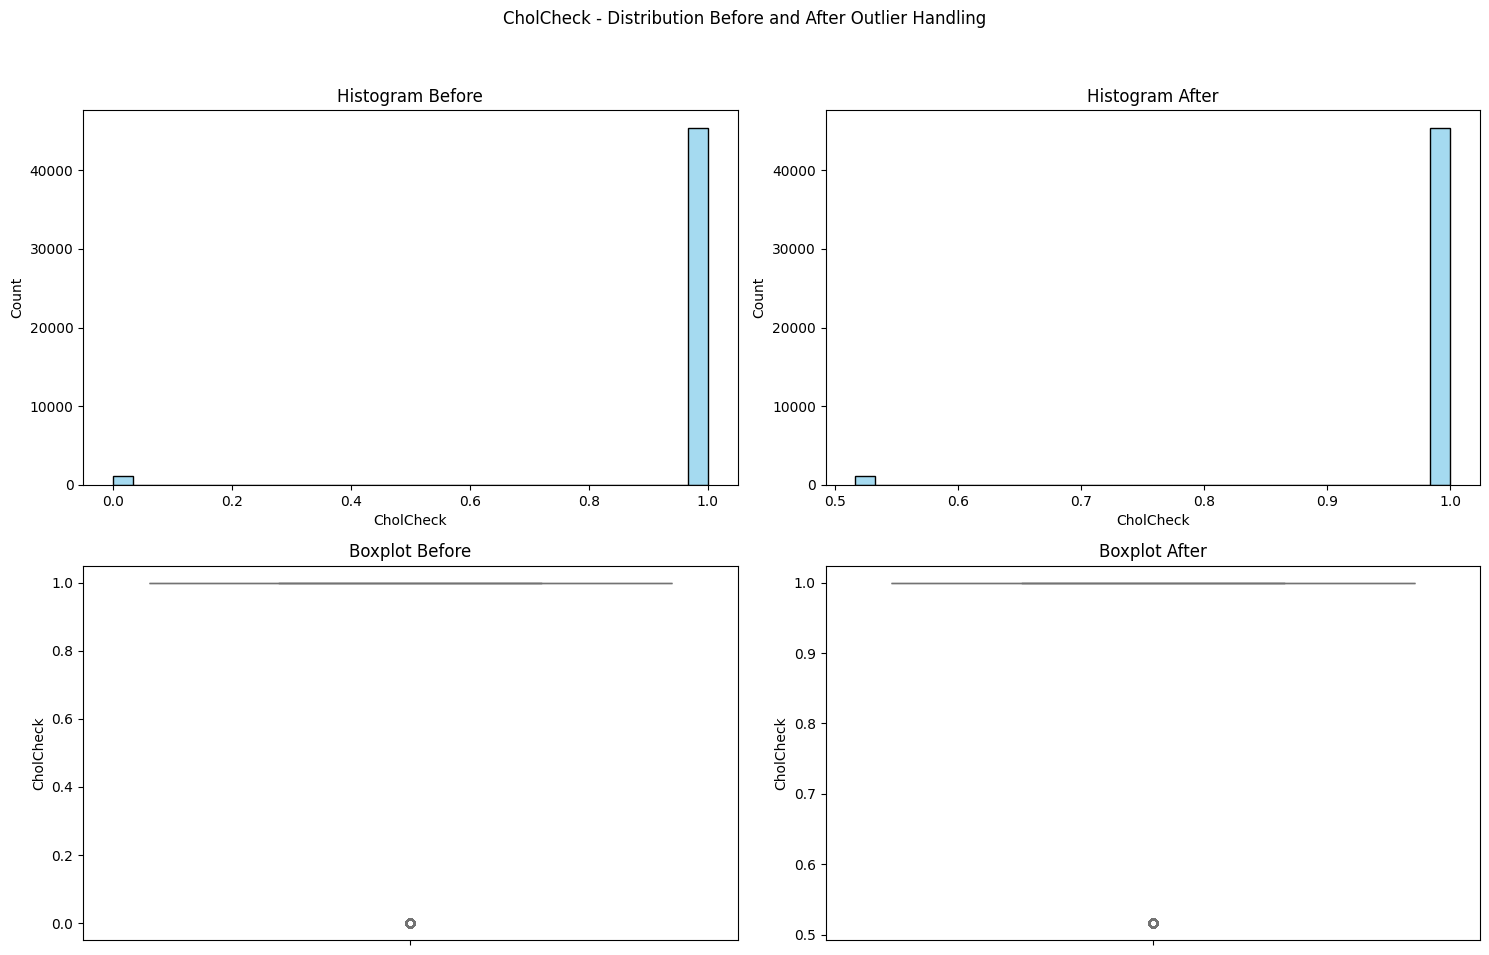

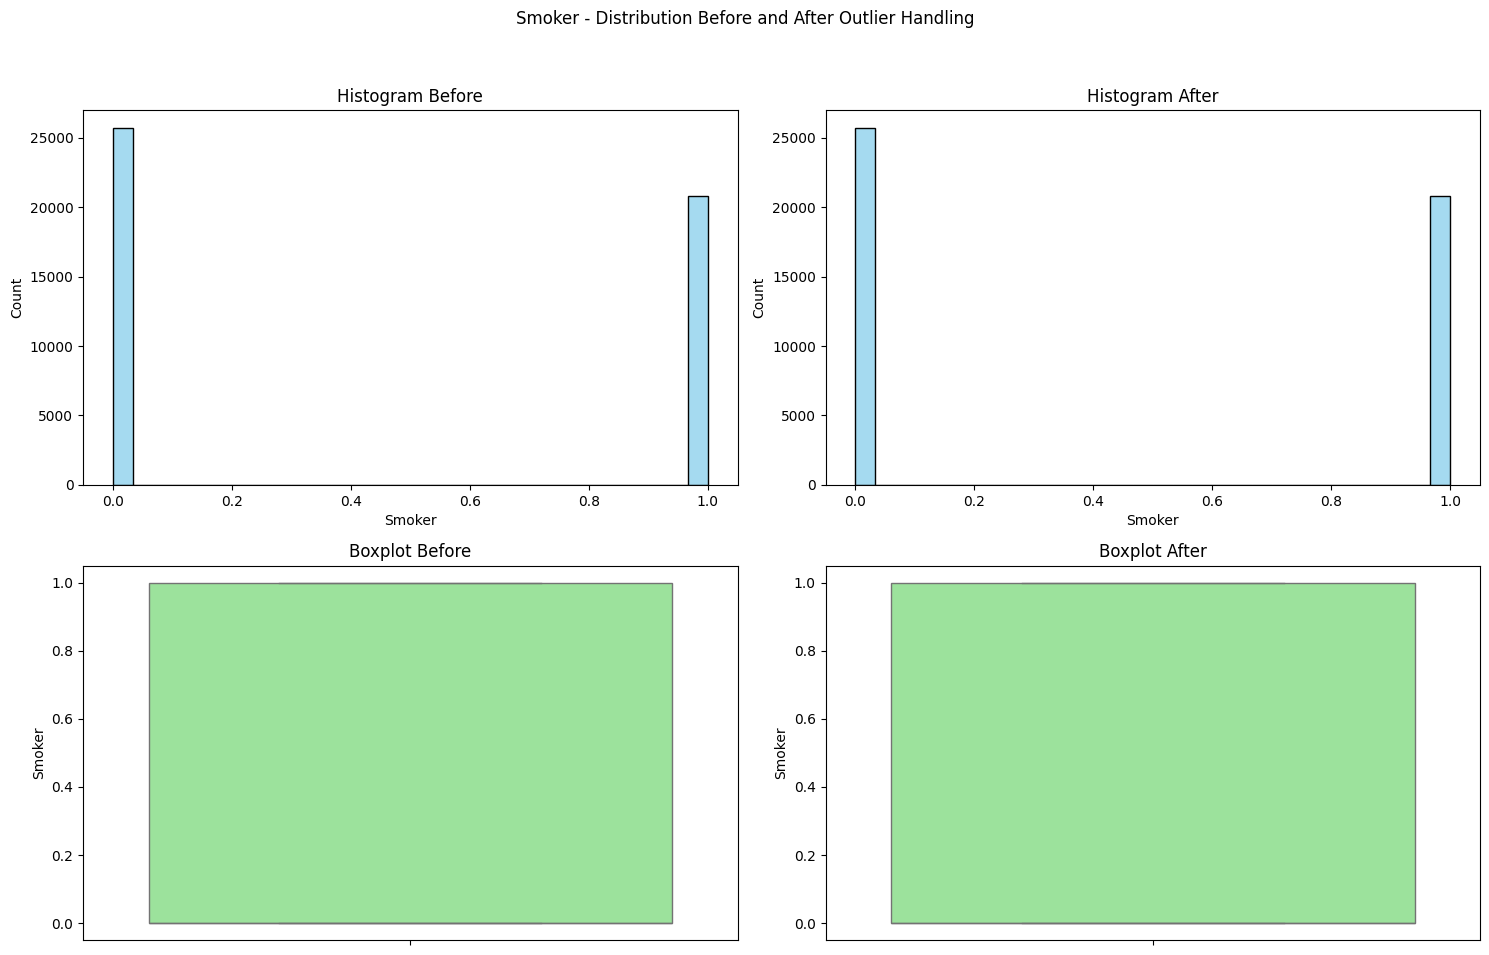

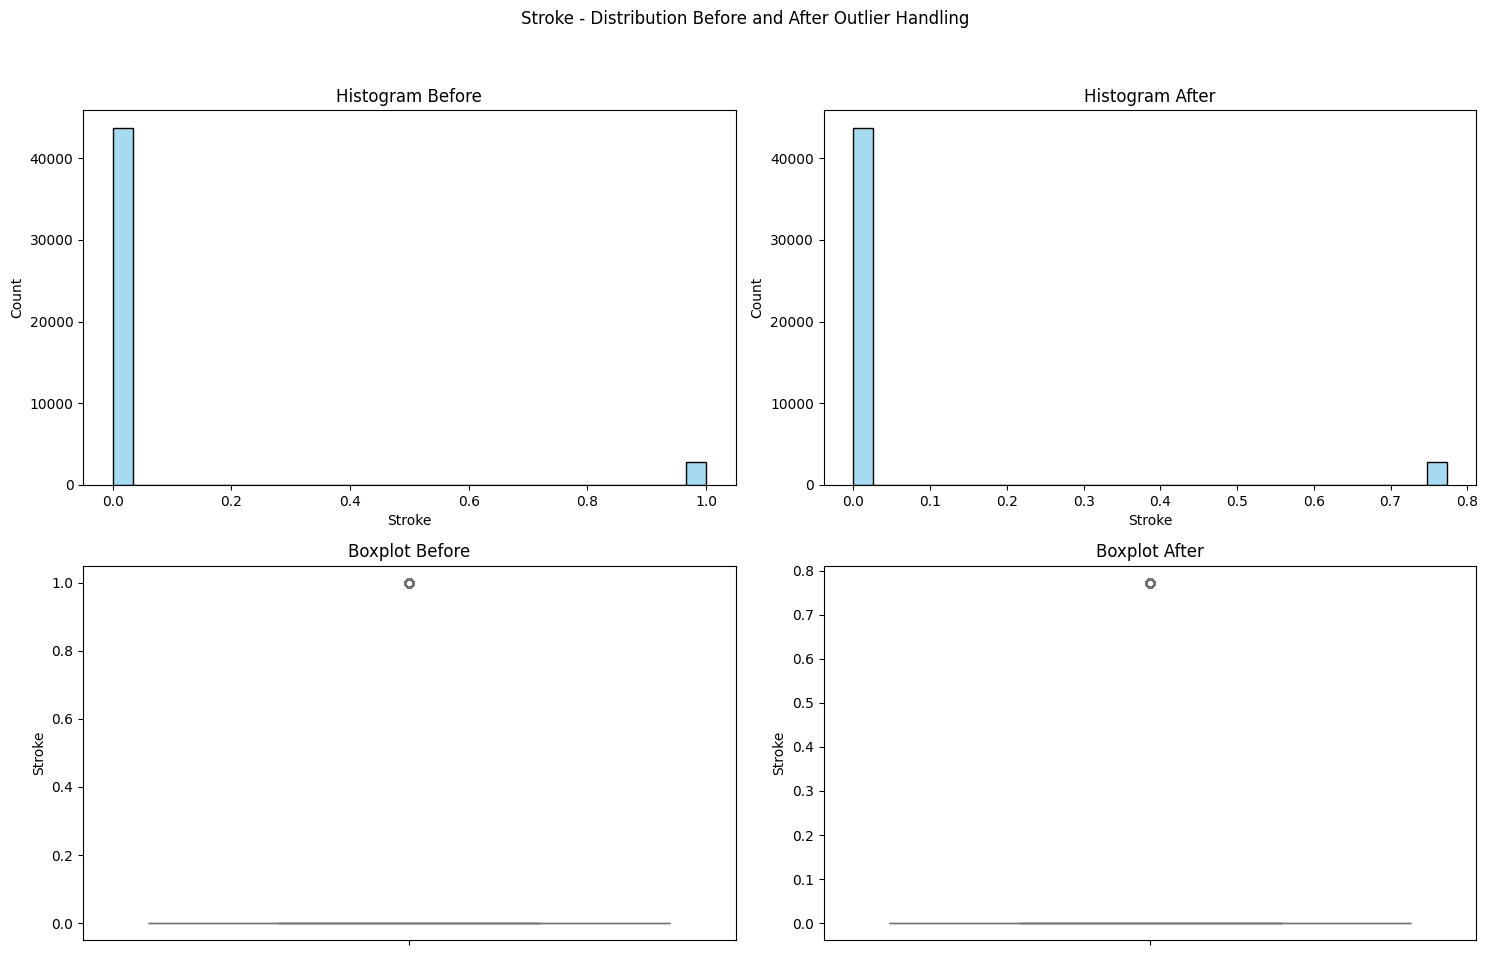

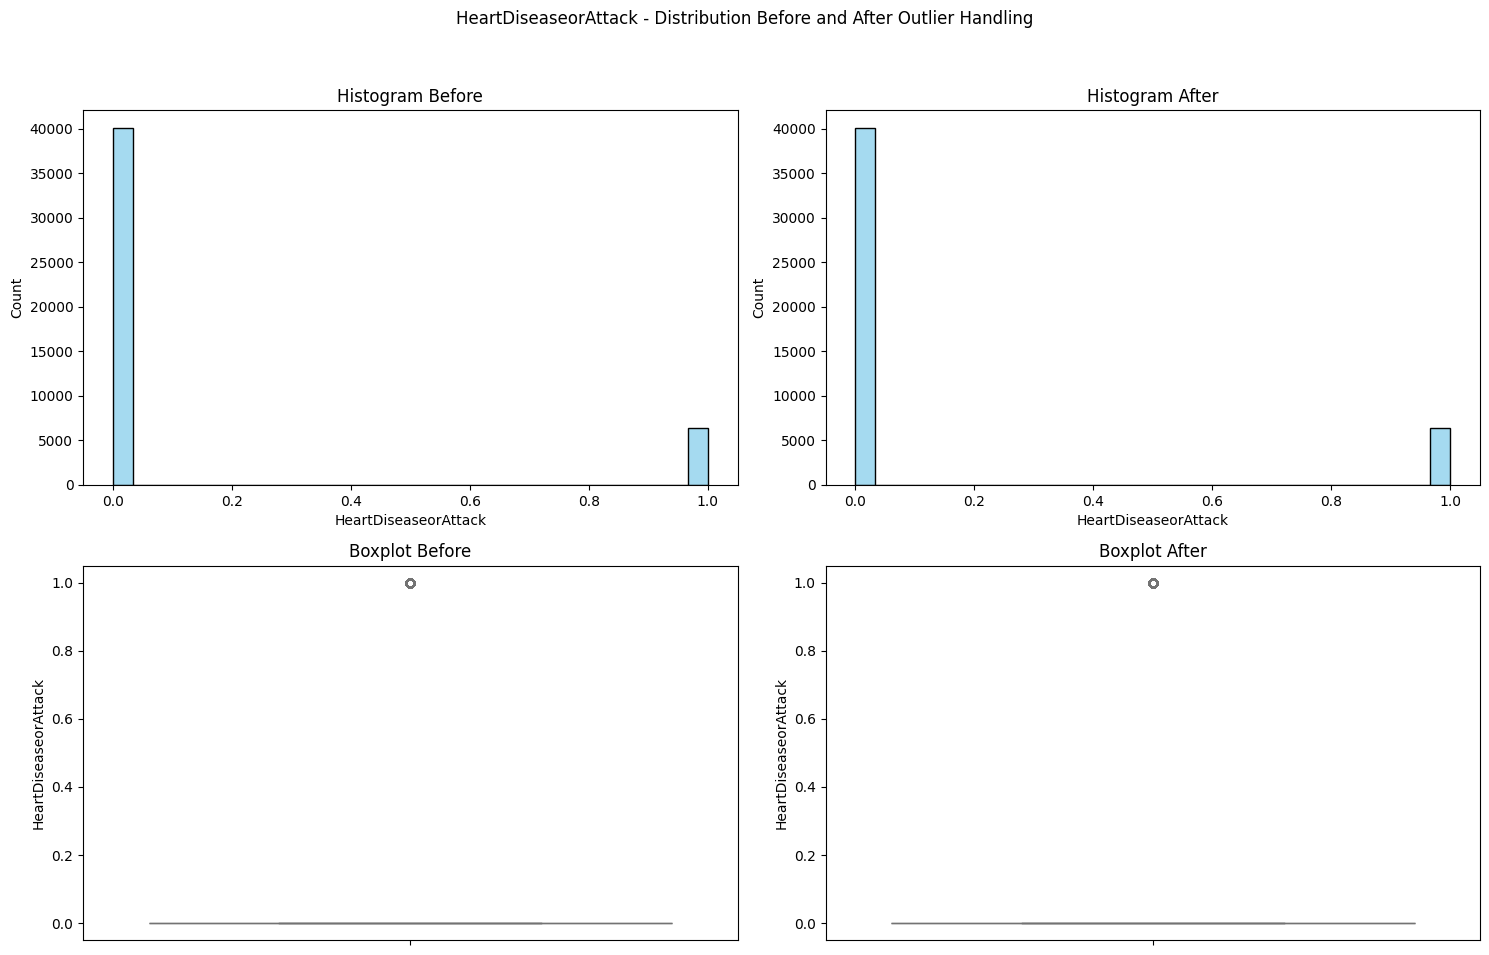

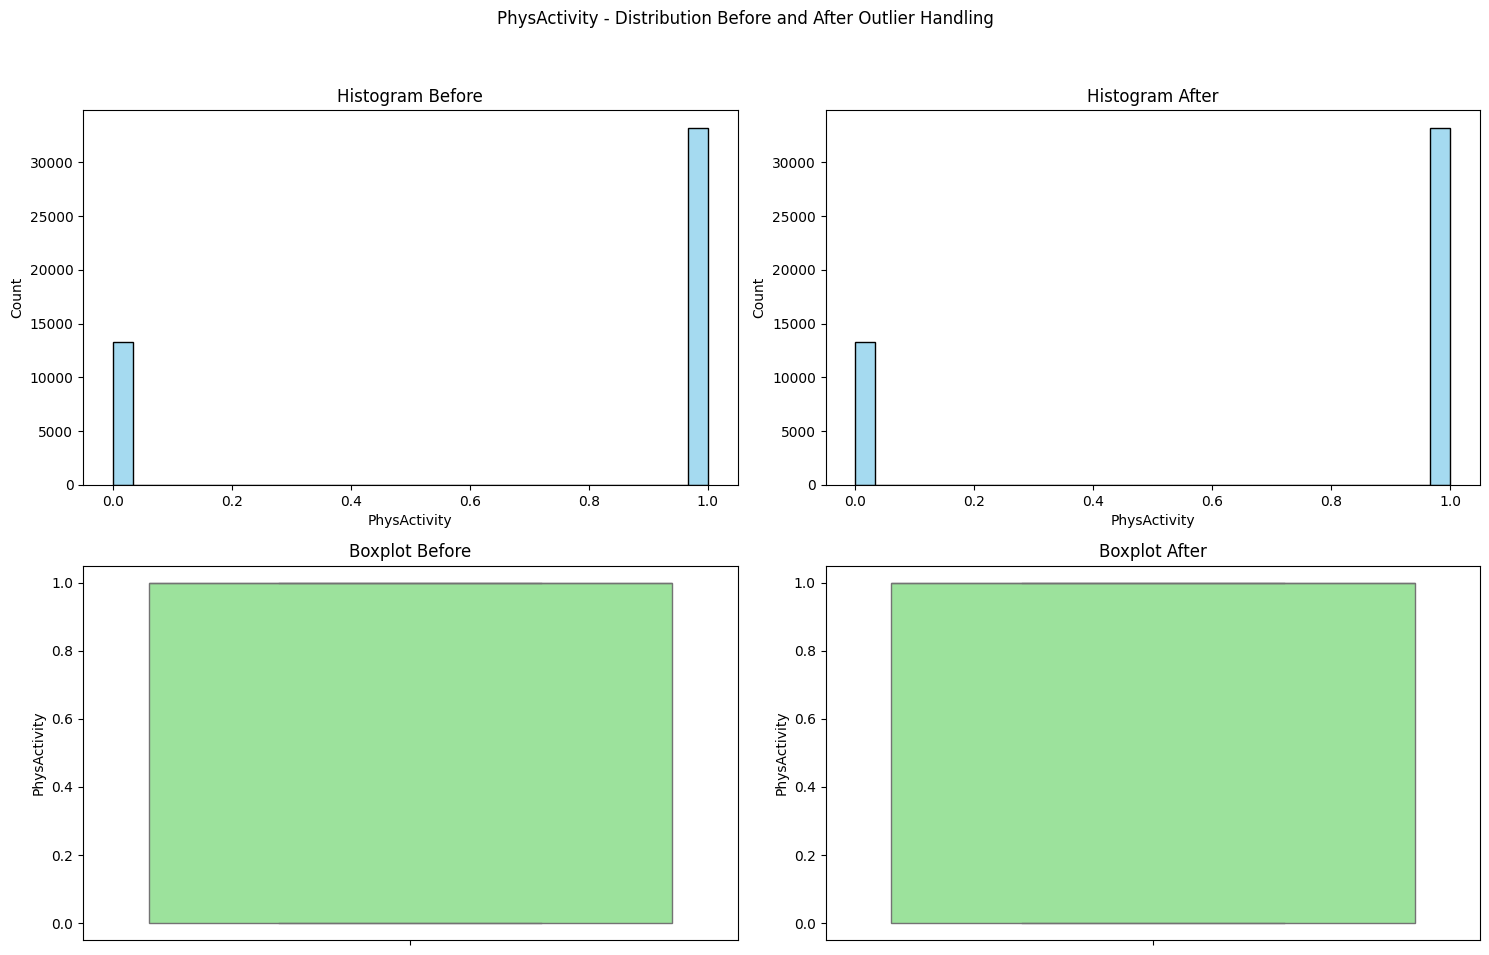

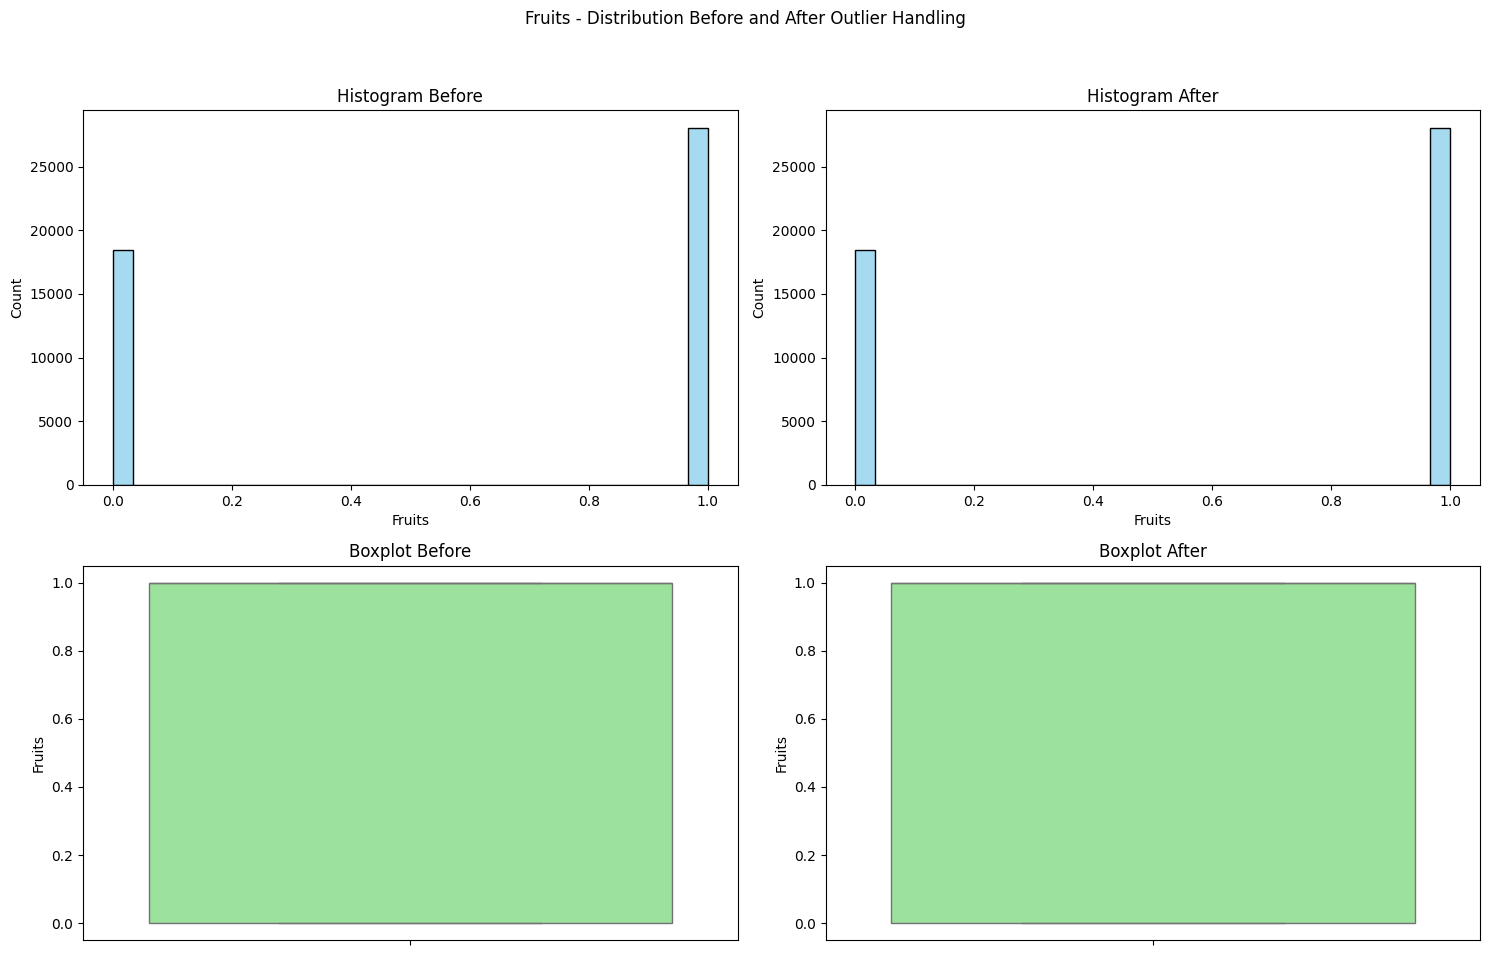

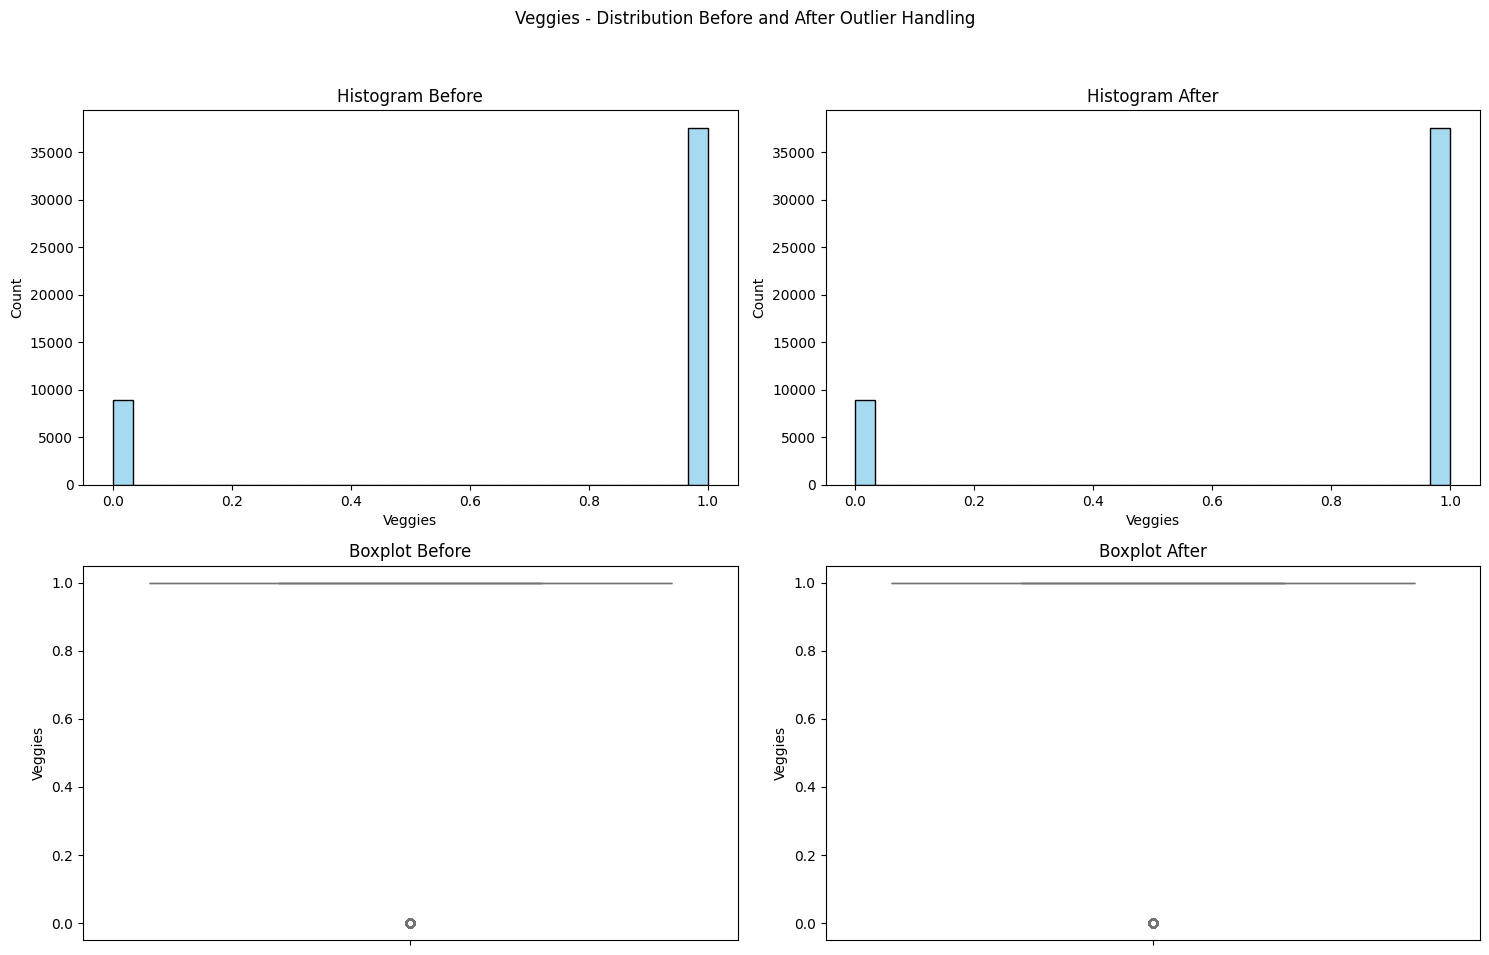

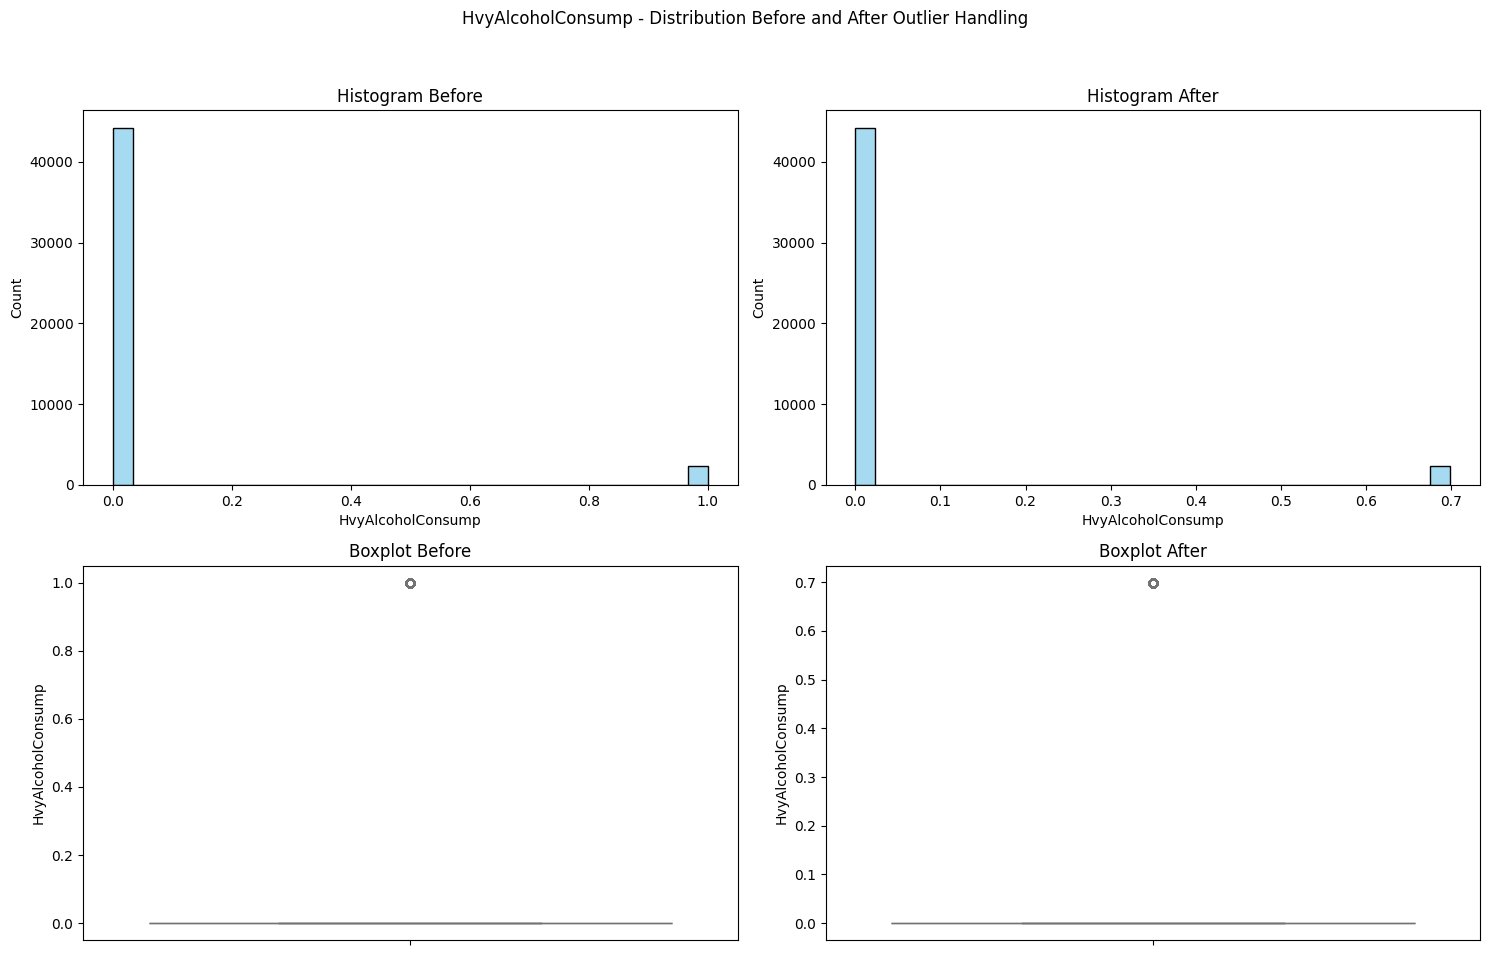

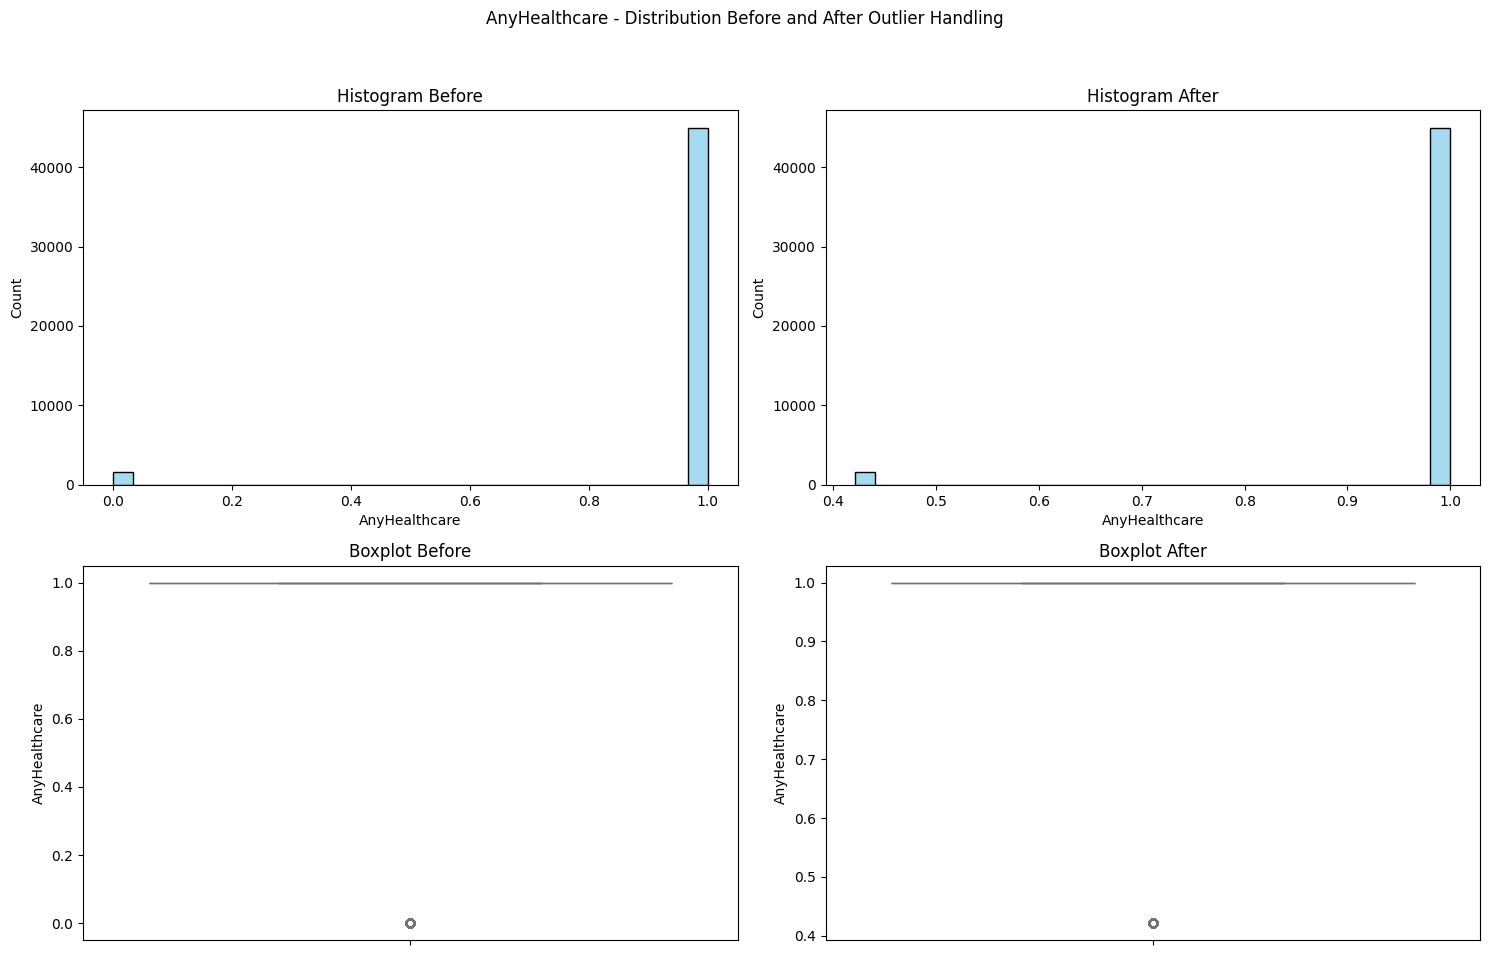

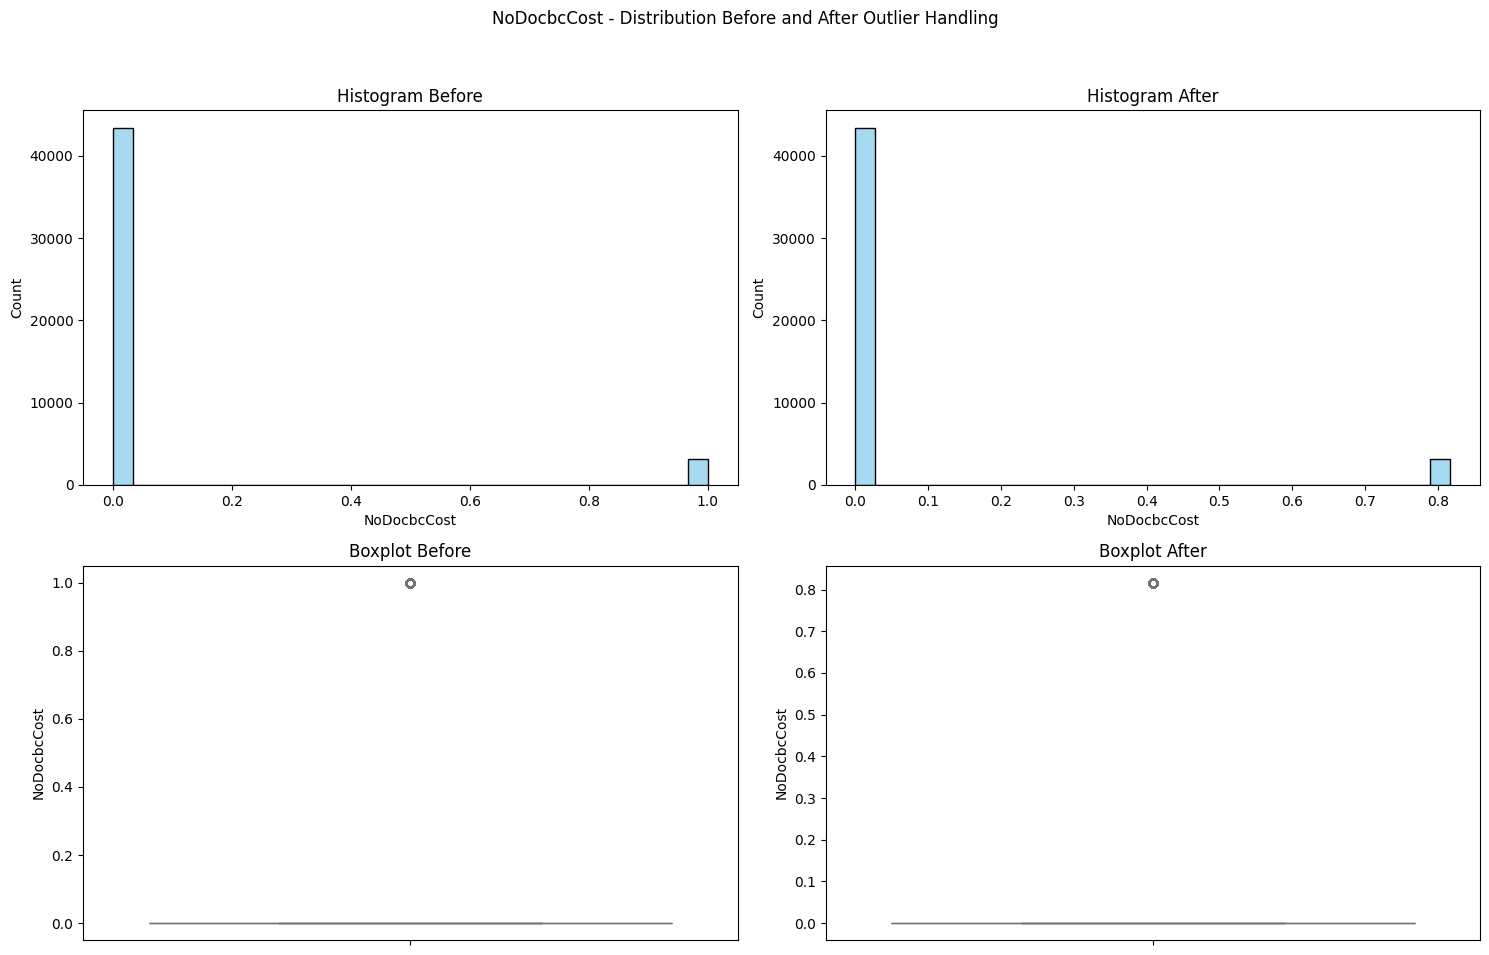

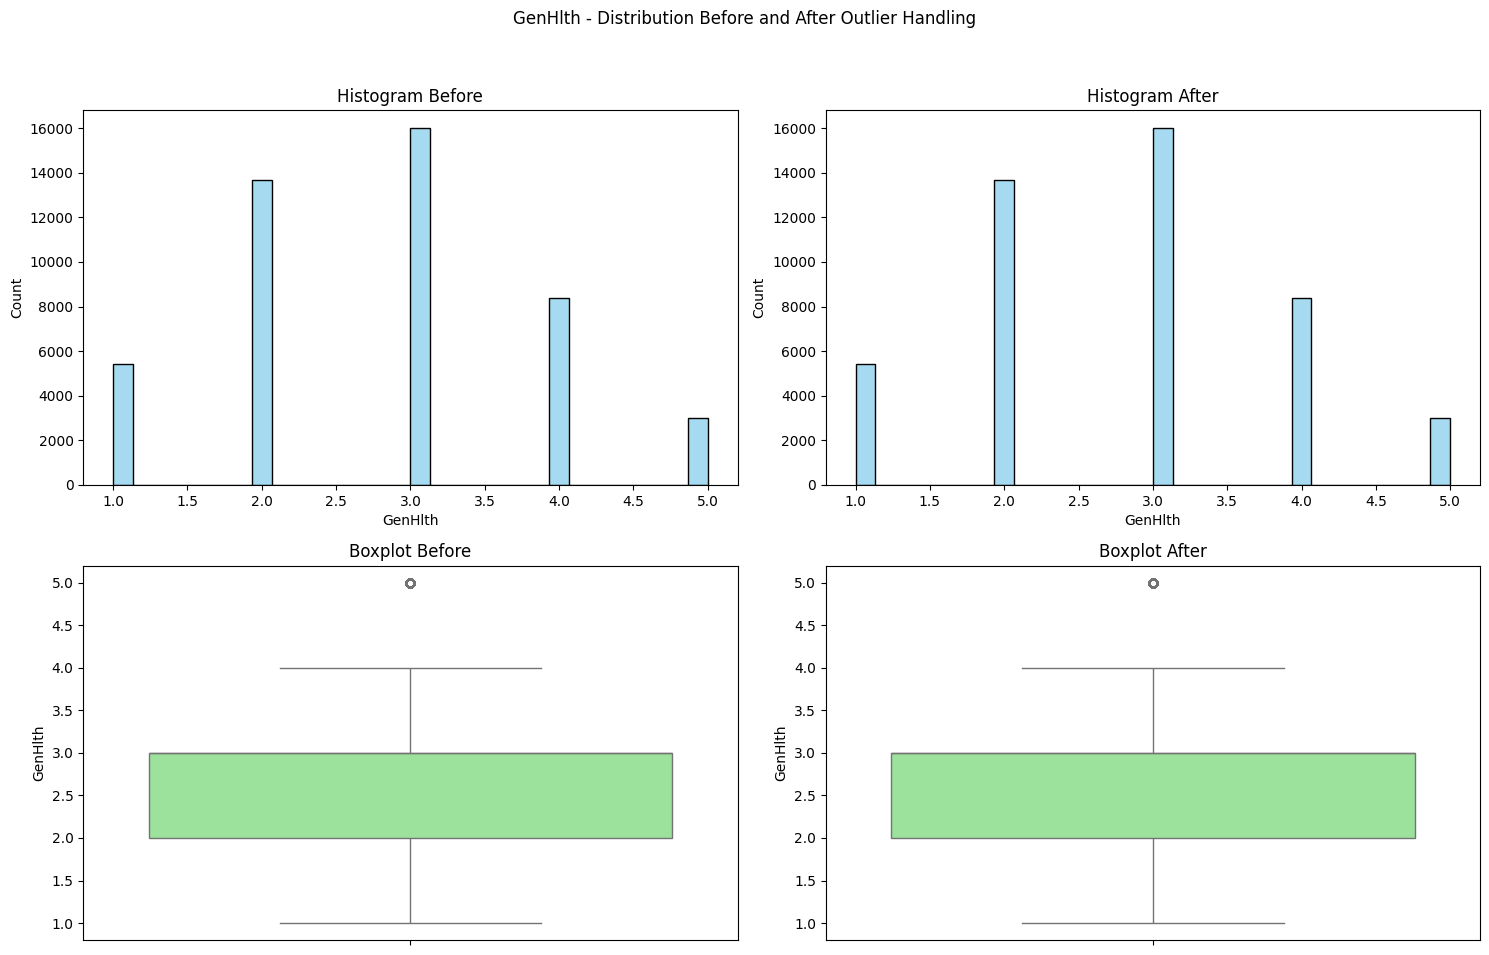

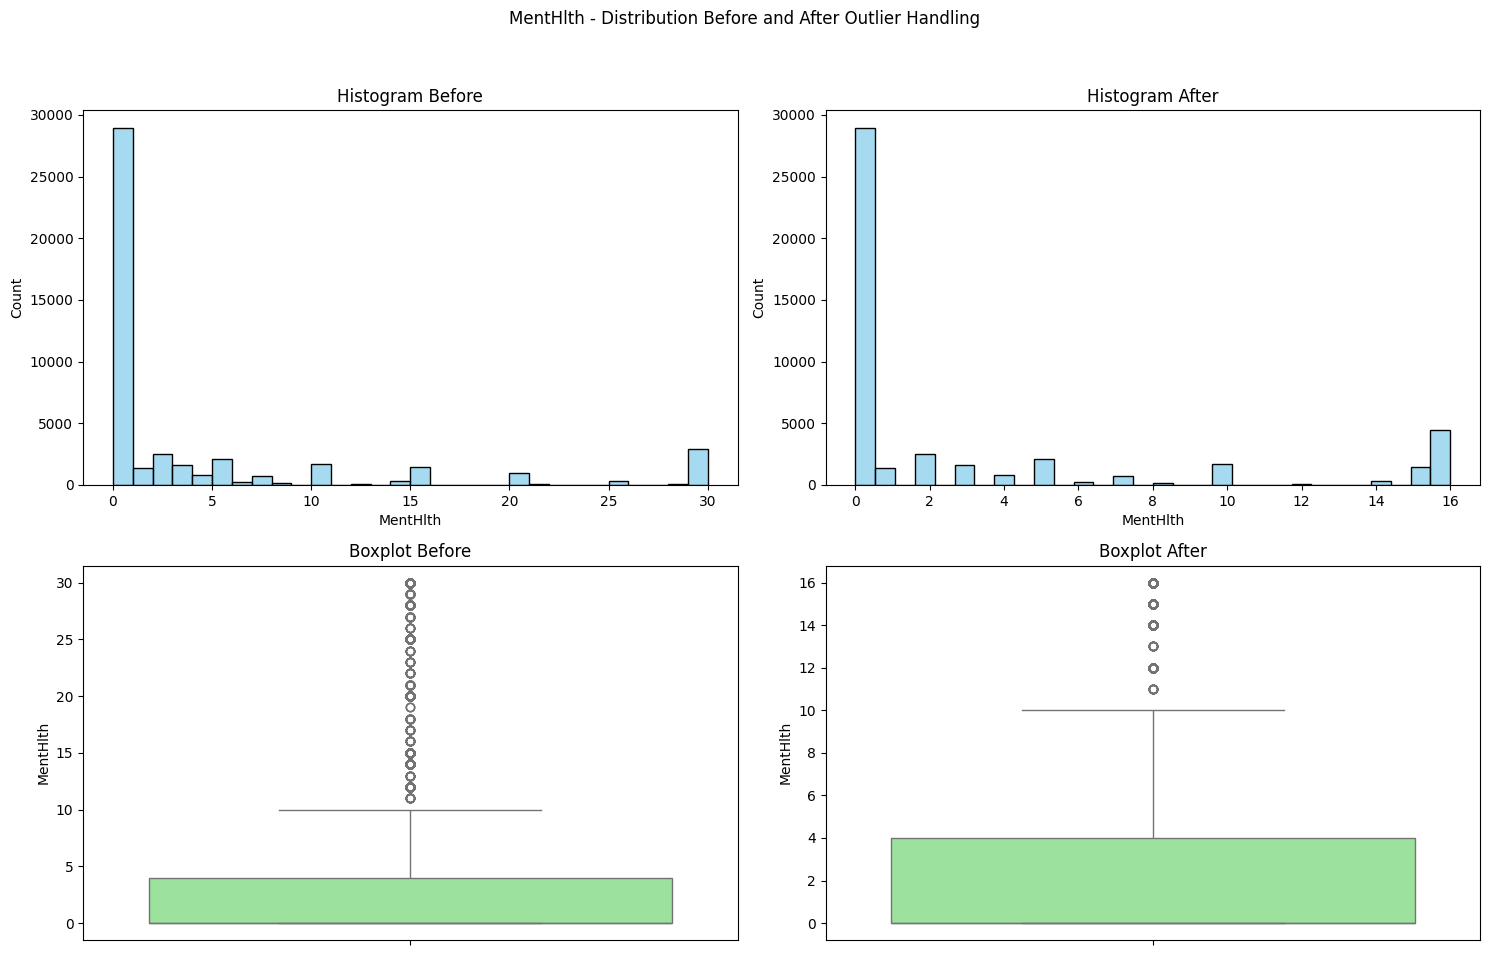

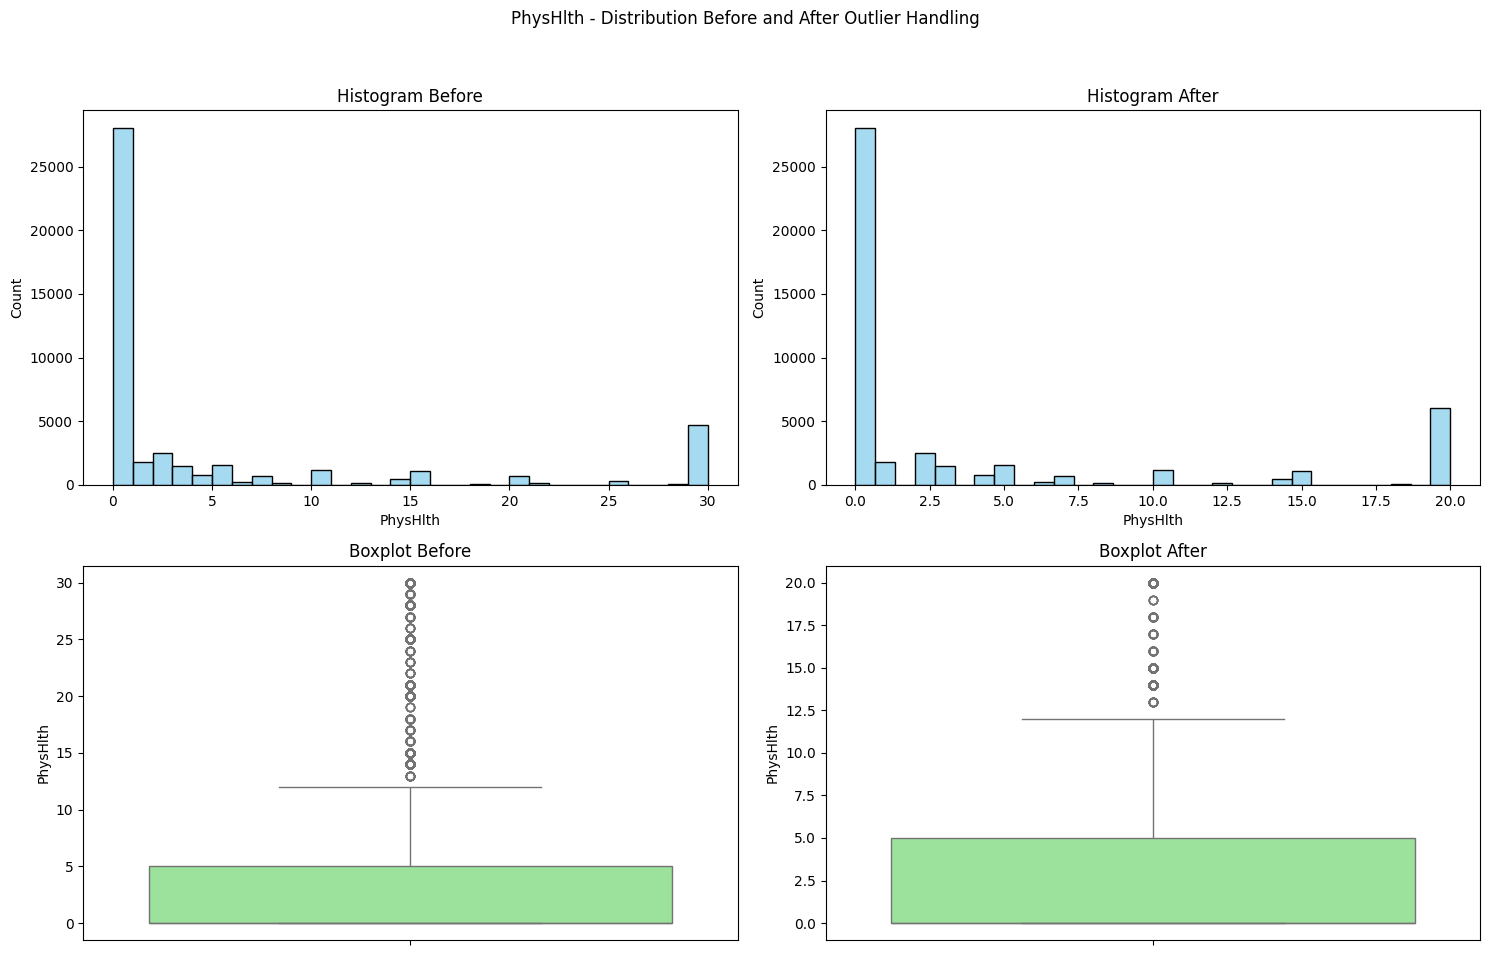

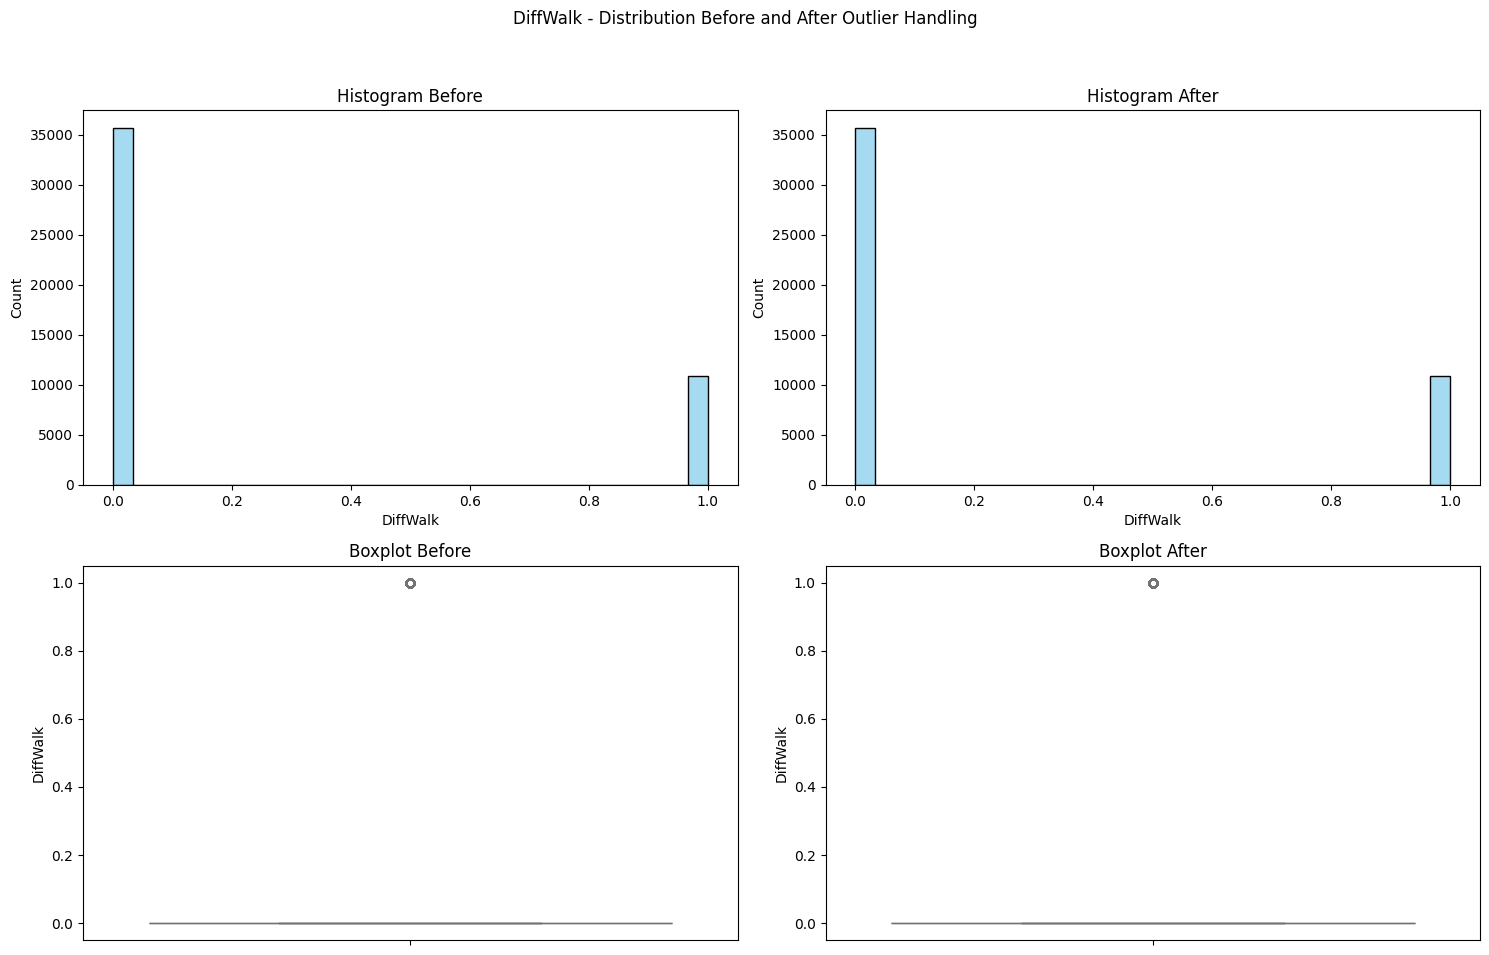

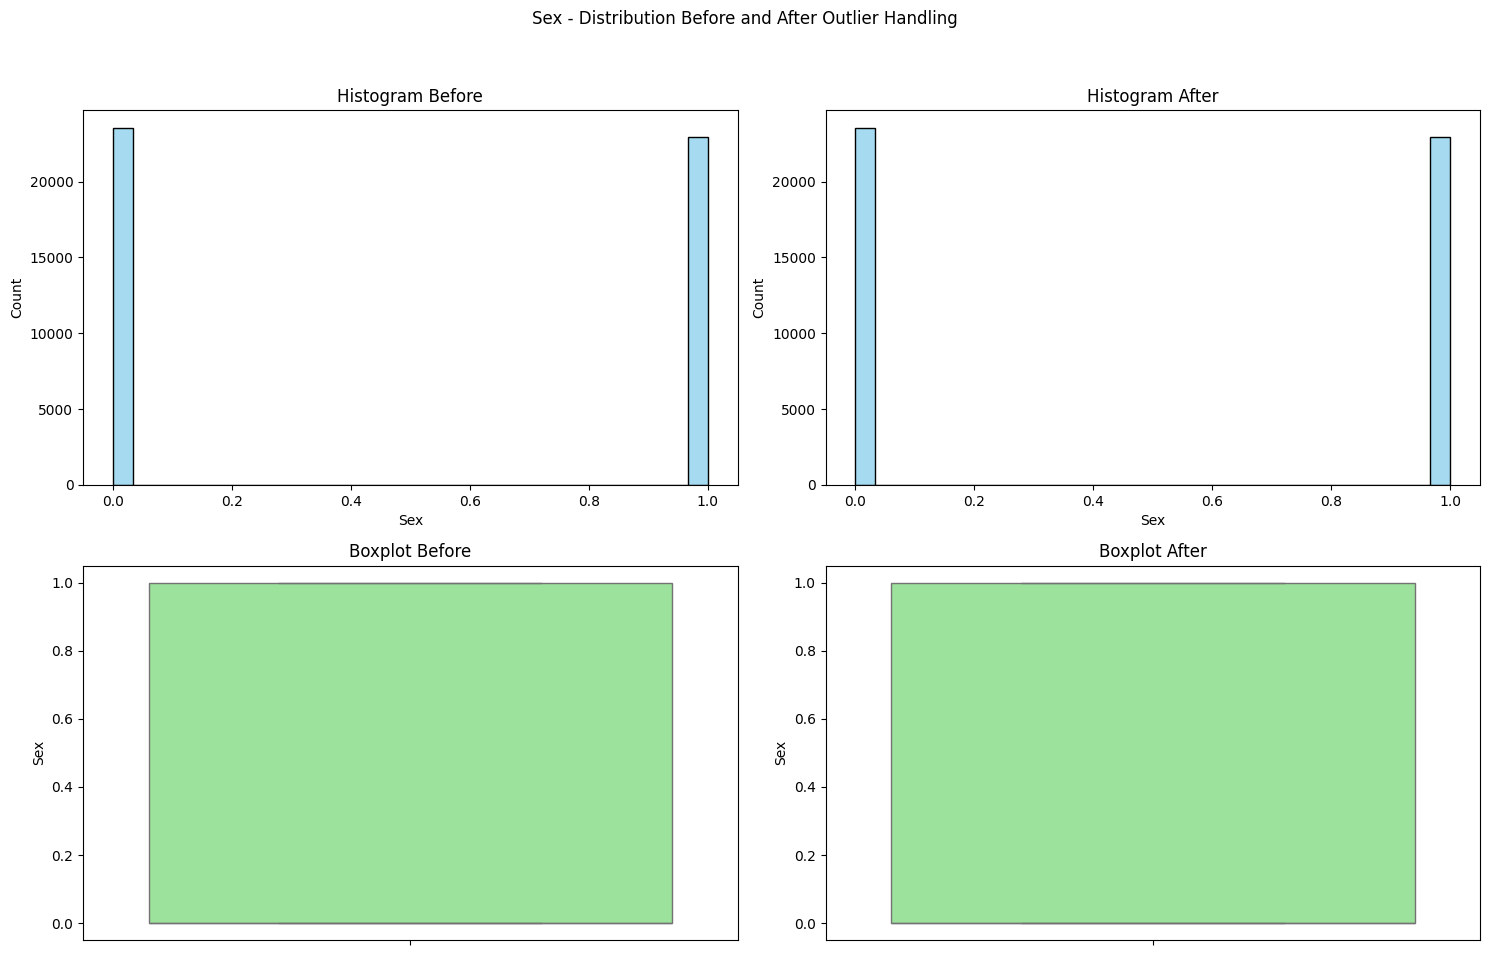

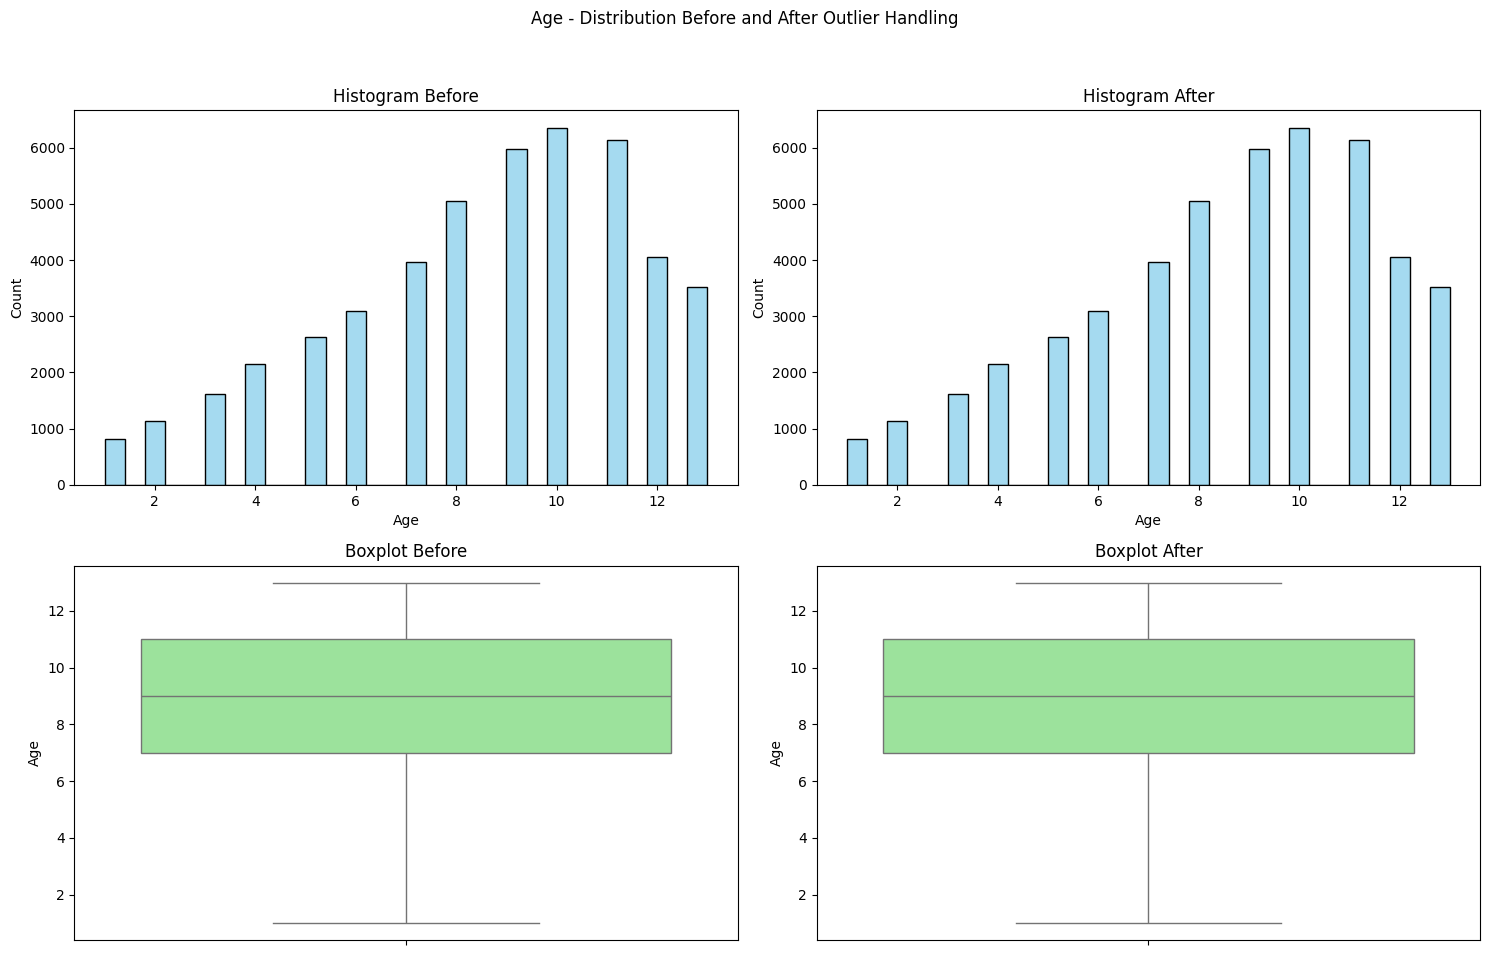

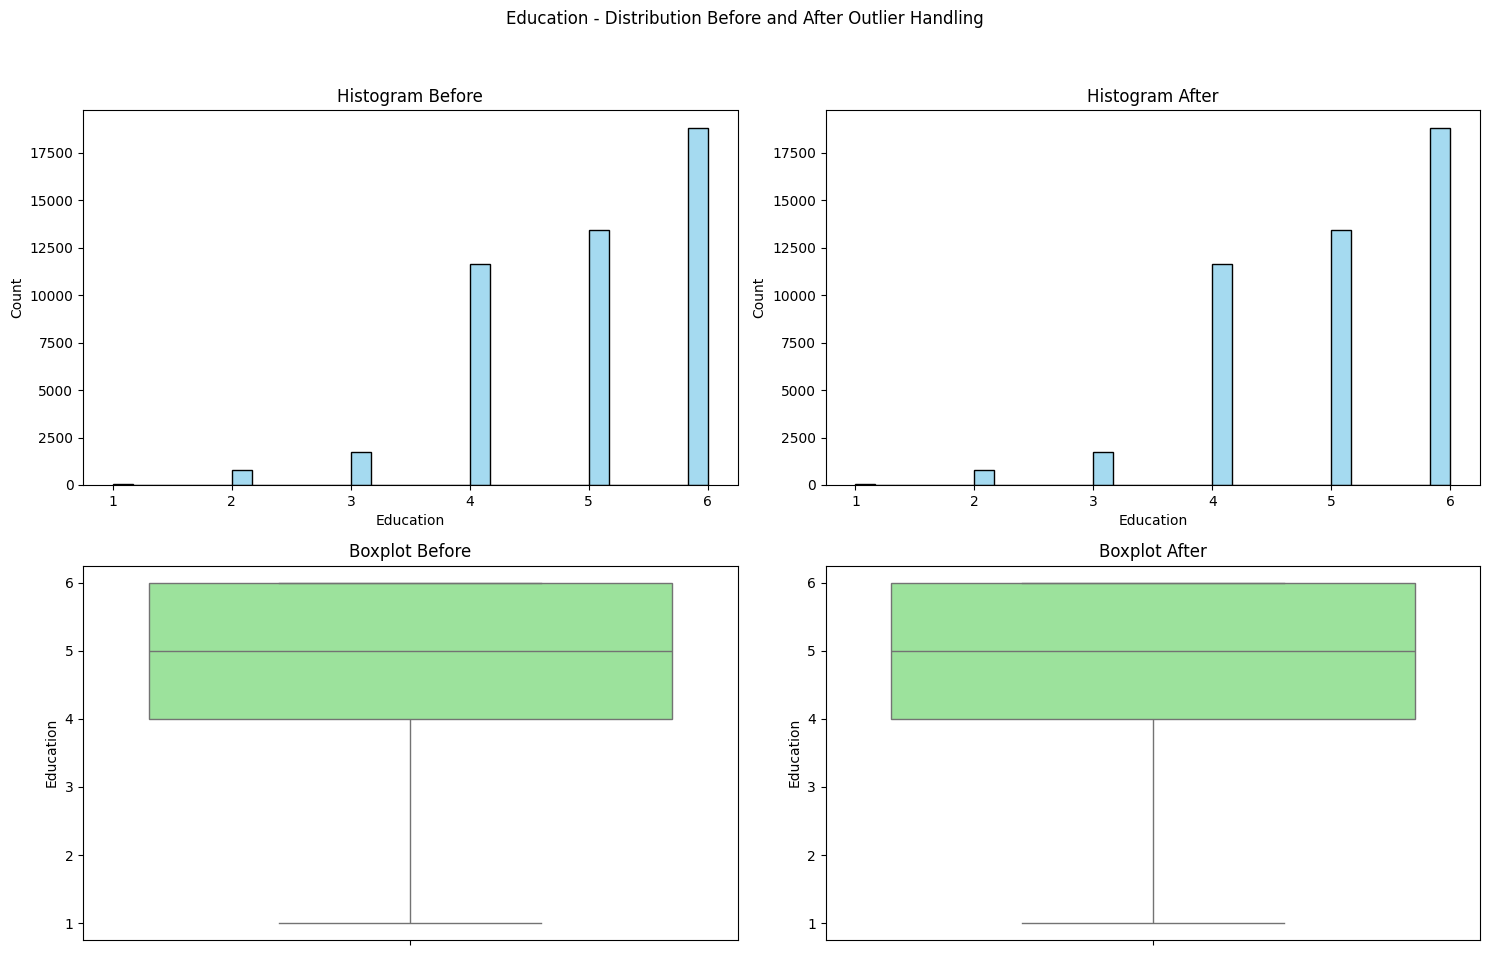

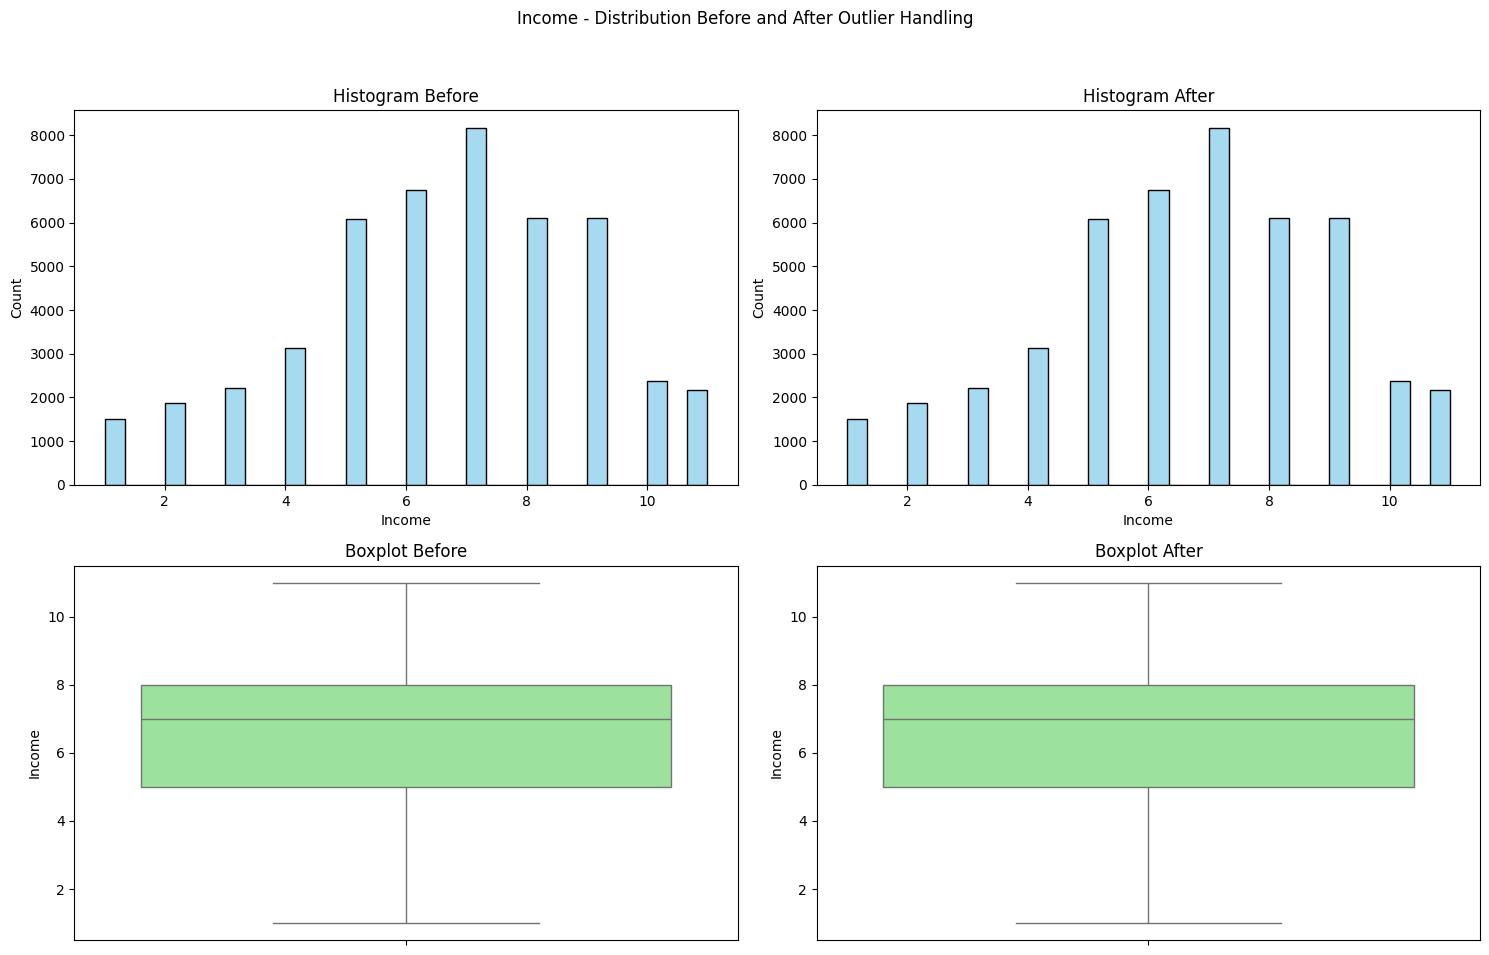

In [29]:
# Using the Function
num_cols = outlier_check
for col in num_cols:
    outlier_handling_plot_comparison(X_train, X_train_capped, col)

**Explanation**  
Visualization above are comparison before and after handling outlier. There are some features that have significant difference between before and after. The other features seems unaffected because no outlier before. However, outlier capping has been successfully.

## Feature Selection

### Correlation Continous Column

In [30]:
# Define numerical continous value columns
continous_cols = ['BMI']

# Values Container
spearman_coef = []
p_values = []
correlation = []
selected_continous = []
not_selected_continous = []

# Loop every column in numerical continous columns
for col in continous_cols:
    corr, pvalue = spearmanr(X_train[col], y_train)

    if pvalue < 0.05:
        spearman_coef.append(corr)
        p_values.append(pvalue)
        selected_continous.append(col)
        correlation.append('Correlated')
    else:
        spearman_coef.append(corr)
        p_values.append(pvalue)
        not_selected_continous.append(col)
        correlation.append('Not Correlated')

pd.DataFrame({
    'continous_columns': continous_cols,
    'spearman_coef': spearman_coef,
    'p_values': p_values,
    'correlation': correlation
})

,continous_columns,spearman_coef,p_values,correlation
0,BMI,0.285353,0.0,Correlated


**Explanation**  
From the continous coloumn there is only BMI, and the result is correlated.

### Correlation Discrete Column

In [31]:
# Define numerical discrete value columns
discrete_cols = ['HighBP', 'HighChol', 'CholCheck', 'Smoker', 'Stroke', 'HeartDiseaseorAttack', 
                 'PhysActivity', 'Fruits', 'Veggies', 'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 
                 'GenHlth', 'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education', 'Income']

# Values Container
kendall_coef = []
p_values = []
correlation = []
selected_discrete = []
not_selected_discrete = []

# Loop every column in numerical discrete columns
for col in discrete_cols:
    corr, pvalue = kendalltau(X_train[col], y_train)

    if pvalue < 0.05:
        kendall_coef.append(corr)
        p_values.append(round(pvalue, 3))  # Rounded p-value to three decimal places
        selected_discrete.append(col)
        correlation.append('Correlated')
    else:
        kendall_coef.append(corr)
        p_values.append(round(pvalue, 3))  # Rounded p-value to three decimal places
        not_selected_discrete.append(col)
        correlation.append('Not Correlated')

pd.DataFrame({
    'discrete_columns': discrete_cols,
    'kendall_coef': kendall_coef,
    'p_values': p_values,
    'correlation': correlation
})


,discrete_columns,kendall_coef,p_values,correlation
0,HighBP,0.368200,0.000,Correlated
1,HighChol,0.274035,0.000,Correlated
2,CholCheck,0.123465,0.000,Correlated
3,Smoker,0.078034,0.000,Correlated
4,Stroke,0.121961,0.000,Correlated
5,HeartDiseaseorAttack,0.208560,0.000,Correlated
6,PhysActivity,-0.196125,0.000,Correlated
7,Fruits,-0.035771,0.000,Correlated
8,Veggies,-0.061305,0.000,Correlated
9,HvyAlcoholConsump,-0.095037,0.000,Correlated


**Explanation**  
From the descrete column, there are all of descrete column is correlated except MentHlth. So, we will drop uncorrelated column for next.

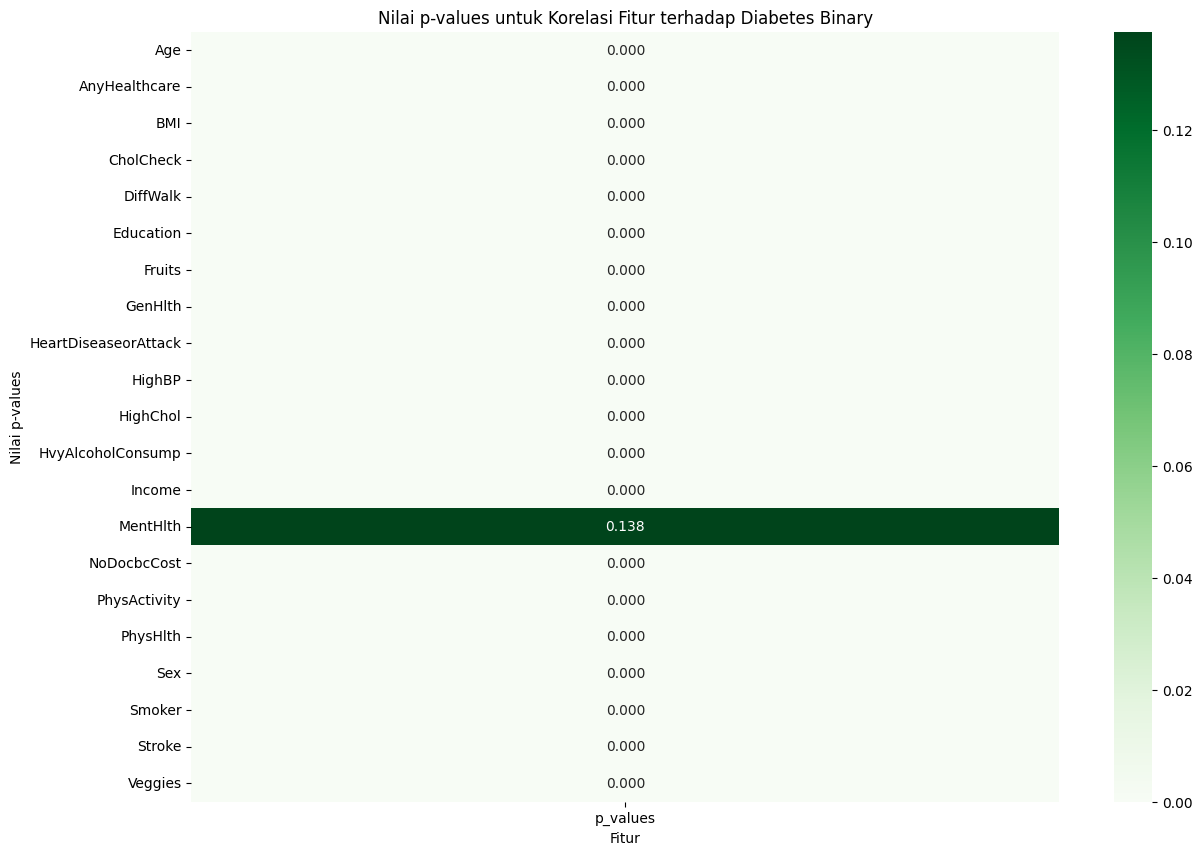

In [45]:
# Define numerical continuous value columns
continuous_cols = ['BMI']

# Values Container for Spearman correlation
spearman_coef = []
spearman_p_values = []
spearman_correlation = []

# Loop over each column in numerical continuous columns
for col in continuous_cols:
    corr, pvalue = spearmanr(X_train[col], y_train)

    spearman_coef.append(corr)
    spearman_p_values.append(pvalue)
    spearman_correlation.append('Correlated' if pvalue < 0.05 else 'Not Correlated')

# DataFrame for Spearman correlation
spearman_df = pd.DataFrame({
    'columns': continuous_cols,
    'spearman_coef': spearman_coef,
    'p_values': spearman_p_values,
    'correlation': spearman_correlation
})

# Define numerical discrete value columns
discrete_cols = ['HighBP', 'HighChol', 'CholCheck', 'Smoker', 'Stroke', 'HeartDiseaseorAttack', 
                 'PhysActivity', 'Fruits', 'Veggies', 'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 
                 'GenHlth', 'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education', 'Income']

# Values Container for Kendall correlation
kendall_coef = []
kendall_p_values = []
kendall_correlation = []

# Loop over each column in numerical discrete columns
for col in discrete_cols:
    corr, pvalue = kendalltau(X_train[col], y_train)

    kendall_coef.append(corr)
    kendall_p_values.append(pvalue)
    kendall_correlation.append('Correlated' if pvalue < 0.05 else 'Not Correlated')

# DataFrame for Kendall correlation
kendall_df = pd.DataFrame({
    'columns': discrete_cols,
    'kendall_coef': kendall_coef,
    'p_values': kendall_p_values,
    'correlation': kendall_correlation
})

# Combine both dataframes
combined_df = pd.concat([spearman_df, kendall_df], ignore_index=True)

# Create pivot table for heatmap with p-values
heatmap_df = combined_df.pivot_table(index='columns', values='p_values')

# Create heatmap with colormap 'Greens'
plt.figure(figsize=(14, 10))
sns.heatmap(heatmap_df, annot=True, cmap='Greens', fmt=".3f")
plt.title('Nilai p-values untuk Korelasi Fitur terhadap Diabetes Binary')
plt.xlabel('Fitur')
plt.ylabel('Nilai p-values')
plt.show()


### Drop Unselected Columns

In [ ]:
# Define Not Selected Columns
not_selected_final = not_selected_continous + not_selected_discrete

# Drop not selected columns
X_train_final = X_train.drop(not_selected_final, axis=1)
X_test_final = X_test.drop(not_selected_final, axis=1)

# Show selected columns
print(f'Drop columns: {not_selected_final}')
display(X_train_final.head())

Drop columns: ['MentHlth']


,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
5259,1,1.0,1,25.0,0.0,0.0,0.0,0,0,1,0,1,0.0,4.0,15.0,1.0,0,12,4.0,7.0
14420,1,0.0,0,32.0,0.0,0.0,0.0,1,0,0,1,0,1.0,1.0,0.0,1.0,1,9,6.0,6.0
13539,1,1.0,1,29.0,0.0,0.0,0.0,1,0,1,0,1,0.0,3.0,0.0,0.0,1,11,6.0,6.0
5649,0,1.0,1,17.0,1.0,0.0,0.0,0,0,1,0,1,0.0,4.0,0.0,1.0,0,12,4.0,7.0
21894,0,1.0,1,30.0,0.0,0.0,0.0,1,0,1,0,1,0.0,1.0,0.0,0.0,1,6,6.0,11.0


**Explanation**  
Drop unselected column which is `MentHlth`. Then, create the final features of train data and test data with only correlated column.

### Check Skew Column

In [ ]:
# Checking the skew values in each column
X_train_final.skew()

HighBP                 -0.204908
HighChol               -0.002625
CholCheck              -6.215922
BMI                     1.264643
Smoker                  0.212168
Stroke                  3.701369
HeartDiseaseorAttack    2.103719
PhysActivity           -0.945649
Fruits                 -0.420508
Veggies                -1.563824
HvyAlcoholConsump       4.159970
AnyHealthcare          -5.134325
NoDocbcCost             3.464560
GenHlth                 0.189708
PhysHlth                1.841604
DiffWalk                1.262169
Sex                     0.023970
Age                    -0.544028
Education              -0.760039
Income                 -0.304225
dtype: float64

**Explanation**  
Check skewness of features for the recommendation of scaler method.

## Scaling

In [ ]:
# Define the scaler
scaler = MinMaxScaler()

**Explanation**  
I choose MinMaxScaler because based on skew column previously that almost have skew > 0.5. So, it's mean the distribution not gaussian. Then, MinMax Scaler is fit for our dataset.

## Column Transformer

In [ ]:
# Define selected columns 
selected = selected_continous + selected_discrete

# Define column transformer with selected columns
transformer = ColumnTransformer([
    ('scaler', scaler, selected)
], remainder="passthrough"
)

transformer

ColumnTransformer(remainder='passthrough',
                  transformers=[('scaler', MinMaxScaler(),
                                 ['BMI', 'HighBP', 'HighChol', 'CholCheck',
                                  'Smoker', 'Stroke', 'HeartDiseaseorAttack',
                                  'PhysActivity', 'Fruits', 'Veggies',
                                  'HvyAlcoholConsump', 'AnyHealthcare',
                                  'NoDocbcCost', 'GenHlth', 'PhysHlth',
                                  'DiffWalk', 'Sex', 'Age', 'Education',
                                  'Income'])])

**Explanation**  
The Column Transformer is defined, which is a preprocessing step commonly used in machine learning pipelines to apply different transformations to different columns of the dataset. My column transformer only composed MinMaxScaler because the data is only numerical. Then, the remainder parameter is set to 'passthrough', which means that any columns not explicitly mentioned will be passed through without any transformations.

# **6. Model Definition**

## Five Classification Base Model

The model will be try with 5 model, such as:
1. K-Nearest Neighbor (KNN) Classifier
2. Support Vector Classification (SVC)
3. Decision Tree Classifier
4. Random Forest Classifier
5. XGB Classifier

### KNN-Classifier Pipeline

In [ ]:
# Define KNN-Classifier Base Model
knn_class = KNeighborsClassifier()

# Defining the pipeline model
knn_class_pipe = Pipeline([
    ('transformer', transformer),
    ('knn_class', knn_class)
])

knn_class_pipe

Pipeline(steps=[('transformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('scaler', MinMaxScaler(),
                                                  ['BMI', 'HighBP', 'HighChol',
                                                   'CholCheck', 'Smoker',
                                                   'Stroke',
                                                   'HeartDiseaseorAttack',
                                                   'PhysActivity', 'Fruits',
                                                   'Veggies',
                                                   'HvyAlcoholConsump',
                                                   'AnyHealthcare',
                                                   'NoDocbcCost', 'GenHlth',
                                                   'PhysHlth', 'DiffWalk',
                                                   'Sex', 'Age', 'Education',
                                                   'Income'])])),
                ('knn_class', KNeighborsClassifier())])

**Explanation**  
The code defines KNN with a pipeline with column transformer. The k-Nearest Neighbors (KNN) classifier is a type of instance-based learning, or lazy learning, where the function is only approximated locally and all computation is deferred until function evaluation.

### Support Vector Classification (SVC) Pipeline

In [ ]:
# Defining SVC Base Model
svc = SVC()

# Defining the pipeline model
svc_pipe = Pipeline([
    ('transformer', transformer),
    ('svc', svc)
])

svc_pipe

Pipeline(steps=[('transformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('scaler', MinMaxScaler(),
                                                  ['BMI', 'HighBP', 'HighChol',
                                                   'CholCheck', 'Smoker',
                                                   'Stroke',
                                                   'HeartDiseaseorAttack',
                                                   'PhysActivity', 'Fruits',
                                                   'Veggies',
                                                   'HvyAlcoholConsump',
                                                   'AnyHealthcare',
                                                   'NoDocbcCost', 'GenHlth',
                                                   'PhysHlth', 'DiffWalk',
                                                   'Sex', 'Age', 'Education',
                                                   'Income'])])),
                ('svc', SVC())])

**Explanation**  
The code defines SVC with a pipeline with column transformer. Support Vector Classifier (SVC) is a type of machine learning algorithm used for classification tasks. It works by finding the best boundary that separates different classes of data points. This boundary is chosen to have the widest possible margin between the classes, which often results in better performance for new data points. SVC can handle both linear and nonlinear data by using a technique called the kernel trick to transform the data into a form where a linear boundary can be applied.

###  Decision Tree Classifier Pipeline

In [ ]:
# Defining Decision Tree Classifier Base Model
dt_class = DecisionTreeClassifier()

# Defining the pipeline model
dt_class_pipe = Pipeline([
    ('transformer', transformer),
    ('dt_class', dt_class)
])

dt_class_pipe

Pipeline(steps=[('transformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('scaler', MinMaxScaler(),
                                                  ['BMI', 'HighBP', 'HighChol',
                                                   'CholCheck', 'Smoker',
                                                   'Stroke',
                                                   'HeartDiseaseorAttack',
                                                   'PhysActivity', 'Fruits',
                                                   'Veggies',
                                                   'HvyAlcoholConsump',
                                                   'AnyHealthcare',
                                                   'NoDocbcCost', 'GenHlth',
                                                   'PhysHlth', 'DiffWalk',
                                                   'Sex', 'Age', 'Education',
                                                   'Income'])])),
                ('dt_class', DecisionTreeClassifier())])

**Explanation**  
The code defines Decision Tree with a pipeline with column transformer. A Decision Tree is a flowchart-like tree structure where each internal node represents a "test" on an attribute, each branch represents the outcome of the test, and each leaf node represents a class label (a decision taken after computing all attributes). The paths from root to leaf represent classification rules.

### Random Forest Classifier Pipeline

In [ ]:
# Defining the model
rf_class = RandomForestClassifier()

# Defining the pipeline model
rf_class_pipe = Pipeline([
    ('transformer', transformer),
    ('rf_class', rf_class)
])

rf_class_pipe

Pipeline(steps=[('transformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('scaler', MinMaxScaler(),
                                                  ['BMI', 'HighBP', 'HighChol',
                                                   'CholCheck', 'Smoker',
                                                   'Stroke',
                                                   'HeartDiseaseorAttack',
                                                   'PhysActivity', 'Fruits',
                                                   'Veggies',
                                                   'HvyAlcoholConsump',
                                                   'AnyHealthcare',
                                                   'NoDocbcCost', 'GenHlth',
                                                   'PhysHlth', 'DiffWalk',
                                                   'Sex', 'Age', 'Education',
                                                   'Income'])])),
                ('rf_class', RandomForestClassifier())])

**Explanation**  
The code defines Random Forest with a pipeline with column transformer. A Random Forest is an ensemble learning method that operates by constructing multiple decision trees during training and outputting the class that is the mode of the classes (classification) or mean prediction (regression) of the individual trees. It introduces randomness by building each tree on a different sample of the data and splitting nodes using a random subset of the features, aiming to decrease the variance and prevent overfitting.

### Boosting Algorithm (XGB Classifier) Pipeline

In [ ]:
# Defining the model
xgb_class = XGBClassifier()

# Defining the pipeline model
xgb_class_pipe = Pipeline([
    ('transformer', transformer),
    ('xgb_class', xgb_class)
])

xgb_class_pipe

Pipeline(steps=[('transformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('scaler', MinMaxScaler(),
                                                  ['BMI', 'HighBP', 'HighChol',
                                                   'CholCheck', 'Smoker',
                                                   'Stroke',
                                                   'HeartDiseaseorAttack',
                                                   'PhysActivity', 'Fruits',
                                                   'Veggies',
                                                   'HvyAlcoholConsump',
                                                   'AnyHealthcare',
                                                   'NoDocbcCost', 'GenHlth',
                                                   'PhysHlth', 'DiffWalk',
                                                   'Sex', 'Age', 'Education',
                                                   'Income'])])),
                ('xg...
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=None, n_jobs=None,
                               num_parallel_tree=None, random_state=None, ...))])

**Explanation**  
The code defines XGB with a pipeline with column transformer. XGBoost is an optimized distributed gradient boosting library designed to be highly efficient, flexible, and portable. It implements machine learning algorithms under the Gradient Boosting framework, providing a parallel tree boosting (also known as GBDT, GBM) that solves many data science problems in a fast and accurate way. XGBoost emphasizes performance and speed, and it includes regularization to prevent overfitting.

# **7. Model Training**

## KNN Classifier

In [ ]:
# Fitting KNN Classifier to training data
knn_class_pipe.fit(X_train_final, y_train)

Pipeline(steps=[('transformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('scaler', MinMaxScaler(),
                                                  ['BMI', 'HighBP', 'HighChol',
                                                   'CholCheck', 'Smoker',
                                                   'Stroke',
                                                   'HeartDiseaseorAttack',
                                                   'PhysActivity', 'Fruits',
                                                   'Veggies',
                                                   'HvyAlcoholConsump',
                                                   'AnyHealthcare',
                                                   'NoDocbcCost', 'GenHlth',
                                                   'PhysHlth', 'DiffWalk',
                                                   'Sex', 'Age', 'Education',
                                                   'Income'])])),
                ('knn_class', KNeighborsClassifier())])

## Support Vector Classification (SVC)

In [ ]:
# Fitting SVC to training data
svc_pipe.fit(X_train_final, y_train)

Pipeline(steps=[('transformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('scaler', MinMaxScaler(),
                                                  ['BMI', 'HighBP', 'HighChol',
                                                   'CholCheck', 'Smoker',
                                                   'Stroke',
                                                   'HeartDiseaseorAttack',
                                                   'PhysActivity', 'Fruits',
                                                   'Veggies',
                                                   'HvyAlcoholConsump',
                                                   'AnyHealthcare',
                                                   'NoDocbcCost', 'GenHlth',
                                                   'PhysHlth', 'DiffWalk',
                                                   'Sex', 'Age', 'Education',
                                                   'Income'])])),
                ('svc', SVC())])

## Decision Tree Classifier

In [ ]:
# Fitting Decision Tree Classifier to training data
dt_class_pipe.fit(X_train_final, y_train)

Pipeline(steps=[('transformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('scaler', MinMaxScaler(),
                                                  ['BMI', 'HighBP', 'HighChol',
                                                   'CholCheck', 'Smoker',
                                                   'Stroke',
                                                   'HeartDiseaseorAttack',
                                                   'PhysActivity', 'Fruits',
                                                   'Veggies',
                                                   'HvyAlcoholConsump',
                                                   'AnyHealthcare',
                                                   'NoDocbcCost', 'GenHlth',
                                                   'PhysHlth', 'DiffWalk',
                                                   'Sex', 'Age', 'Education',
                                                   'Income'])])),
                ('dt_class', DecisionTreeClassifier())])

## Random Forest Classifier

In [ ]:
# Fitting Random Forest Classifier to training data
rf_class_pipe.fit(X_train_final, y_train)

Pipeline(steps=[('transformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('scaler', MinMaxScaler(),
                                                  ['BMI', 'HighBP', 'HighChol',
                                                   'CholCheck', 'Smoker',
                                                   'Stroke',
                                                   'HeartDiseaseorAttack',
                                                   'PhysActivity', 'Fruits',
                                                   'Veggies',
                                                   'HvyAlcoholConsump',
                                                   'AnyHealthcare',
                                                   'NoDocbcCost', 'GenHlth',
                                                   'PhysHlth', 'DiffWalk',
                                                   'Sex', 'Age', 'Education',
                                                   'Income'])])),
                ('rf_class', RandomForestClassifier())])

## Boosting (XGB) Classifier

In [ ]:
# Fitting XGBClassifier to training data
xgb_class_pipe.fit(X_train_final, y_train)

Pipeline(steps=[('transformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('scaler', MinMaxScaler(),
                                                  ['BMI', 'HighBP', 'HighChol',
                                                   'CholCheck', 'Smoker',
                                                   'Stroke',
                                                   'HeartDiseaseorAttack',
                                                   'PhysActivity', 'Fruits',
                                                   'Veggies',
                                                   'HvyAlcoholConsump',
                                                   'AnyHealthcare',
                                                   'NoDocbcCost', 'GenHlth',
                                                   'PhysHlth', 'DiffWalk',
                                                   'Sex', 'Age', 'Education',
                                                   'Income'])])),
                ('xg...
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=None, n_jobs=None,
                               num_parallel_tree=None, random_state=None, ...))])

# **8. Model Evaluation**

Metric Used : Recall

This project aim to predct Diabetes status from individuals, where 0 is non diabetes and 1 is diabetes. I have chosen to use Recall for metric of evaluation. By using Recall, I will to make sure the False Negative which is people who were predicted non diabetes but were in fact diabetes. A recall of 1.0 represents perfect recall, meaning the model correctly identified all actual positives.

## KNN Classifier Base Model

In [ ]:
# Model Prediction
y_pred_train_knn = knn_class_pipe.predict(X_train_final)
y_pred_test_knn = knn_class_pipe.predict(X_test_final)

**Explanation**  
Predict with knn base model.

### Classification Report KNN Classifier Base Model

In [ ]:
# Model Evaluation - Train Set & Test Set
print(classification_report(y_train, y_pred_train_knn))
print(classification_report(y_test, y_pred_test_knn))

              precision    recall  f1-score   support

         0.0       0.80      0.76      0.78     23118
         1.0       0.78      0.81      0.79     23361

    accuracy                           0.79     46479
   macro avg       0.79      0.79      0.79     46479
weighted avg       0.79      0.79      0.79     46479

              precision    recall  f1-score   support

         0.0       0.71      0.67      0.69      9886
         1.0       0.69      0.73      0.71     10034

    accuracy                           0.70     19920
   macro avg       0.70      0.70      0.70     19920
weighted avg       0.70      0.70      0.70     19920



**Explanation**  
Focused on recall with 1.0 (positive diabetes).  
On the train set we seems 0.81 This indicates that the model is quite effective at identifying true positives for class 1.0 in the training data. But on the test set is decreases to 0.73. While still relatively high, this drop from the training recall suggests that the model's ability to generalize its identification of class 1.0 instances to unseen data is somewhat reduced. The decrease in recall from the training to the testing dataset indicates a drop in performance when the model is exposed to new, unseen data. This could point to overfitting during training or indicate that the model’s ability to generalize needs improvement.

### Confusion Matrix KNN Classifier Base Model

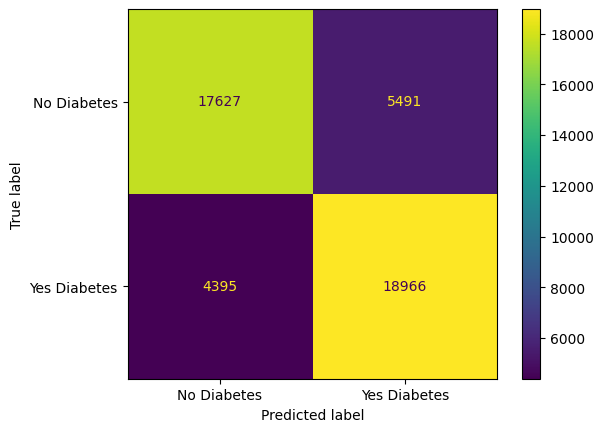

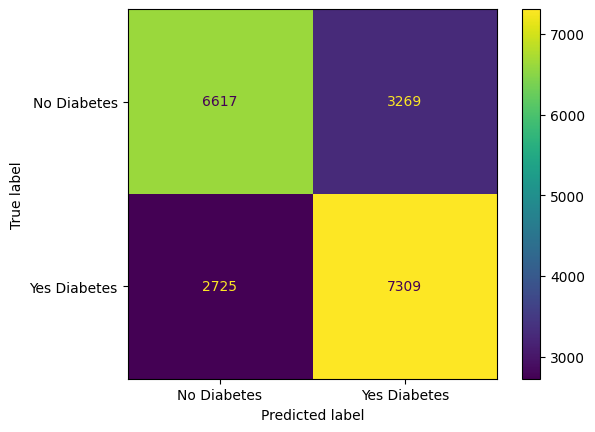

In [ ]:
target = ['No Diabetes', 'Yes Diabetes']
# Confusion matrix for base model
ConfusionMatrixDisplay.from_estimator(knn_class_pipe, X_train_final, y_train, display_labels=target)
ConfusionMatrixDisplay.from_estimator(knn_class_pipe, X_test_final, y_test, display_labels=target)

**Explanation**  
Only focused on False Negative which are cases that actually Diabetes but predicted non diabetes.
From the train set is 5491 and test set is 3269. The comparison of percentage between train 11.8% and test 16.4% which are mean the model predict errors for test set larger than train set. This suggests the model are overfitting.

### Cross Validation KNN Classifier Base Model

In [ ]:
# Cross Validation using `cross_val_score`
recall_train_cross_val = cross_val_score(knn_class_pipe,
                                     X_train_final,
                                     y_train,
                                     cv=3,
                                     scoring="recall")

print('Recall - All - Cross Validation  : ', recall_train_cross_val)
print('Recall - Mean - Cross Validation : ', recall_train_cross_val.mean())
print('Recall - Std - Cross Validation  : ', recall_train_cross_val.std())
print('Recall - Range of Test-Set       : ', (recall_train_cross_val.mean()-recall_train_cross_val.std()) , '-', (recall_train_cross_val.mean()+recall_train_cross_val.std()))

Recall - All - Cross Validation  :  [0.7118274  0.71478105 0.73224605]
Recall - Mean - Cross Validation :  0.719618167030521
Recall - Std - Cross Validation  :  0.009010312261720277
Recall - Range of Test-Set       :  0.7106078547688006 - 0.7286284792922413


**Expalanation**  
Cross validation is to check performance of model with cv= 3 which are the train data will be divides 3 different combination. I used recall for the scoring of metric. The result are Mean of recall 0.72, range 0.71 - 0.73.

Recall - Test Set   :  0.7284233605740482 

Classification Report : 
               precision    recall  f1-score   support

         0.0       0.71      0.67      0.69      9886
         1.0       0.69      0.73      0.71     10034

    accuracy                           0.70     19920
   macro avg       0.70      0.70      0.70     19920
weighted avg       0.70      0.70      0.70     19920
 

Confusion Matrix      : 


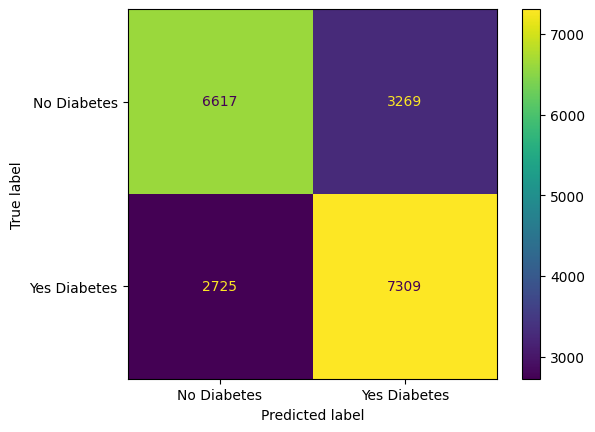

In [ ]:
# Check Performance Model against Test-Set

y_pred_test_knn_2 = knn_class_pipe.predict(X_test_final)

print('Recall - Test Set   : ', recall_score(y_test, y_pred_test_knn_2), '\n')
print('Classification Report : \n', classification_report(y_test, y_pred_test_knn_2), '\n')
print('Confusion Matrix      : \n', ConfusionMatrixDisplay.from_estimator(knn_class_pipe, X_test_final, y_test, display_labels=target))

**Explanation**  
The result after cross validation is the test set are simillar which is the model performance with divided 3 different data are still good.

## Support Vector Classification (SVC) Base Model

In [ ]:
# Model Prediction
y_pred_train_svc = svc_pipe.predict(X_train_final)
y_pred_test_svc = svc_pipe.predict(X_test_final)

### Classification Report SVC Base Model

In [ ]:
# Model Evaluation - Train Set & Test Set
print(classification_report(y_train, y_pred_train_svc))
print(classification_report(y_test, y_pred_test_svc))

              precision    recall  f1-score   support

         0.0       0.77      0.69      0.73     23118
         1.0       0.72      0.79      0.76     23361

    accuracy                           0.74     46479
   macro avg       0.75      0.74      0.74     46479
weighted avg       0.75      0.74      0.74     46479

              precision    recall  f1-score   support

         0.0       0.77      0.68      0.72      9886
         1.0       0.72      0.80      0.75     10034

    accuracy                           0.74     19920
   macro avg       0.74      0.74      0.74     19920
weighted avg       0.74      0.74      0.74     19920



**Explanation**  
Focused on recall with 1.0 (positive diabetes). 
The recall for class 1.0 in the training set is 0.79. This high recall rate indicates that the SVC model is effective at identifying true positives for class 1.0, capturing 79% of all actual class 1.0 instances. In the testing set, the recall for class 1.0 increases slightly to 0.80. This is an interesting result, as it's common to see a decrease in performance from training to testing due to overfitting.

### Confusion Matrix SVC Base Model

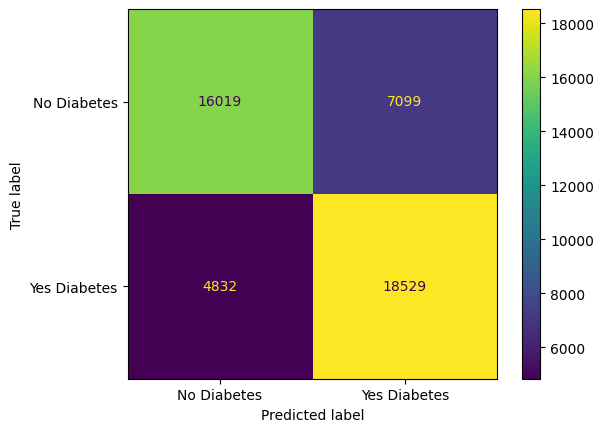

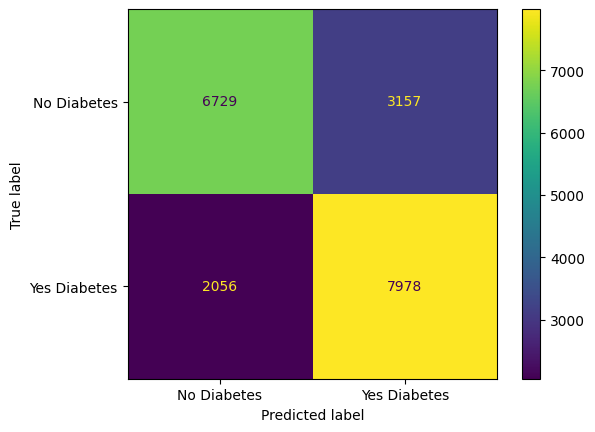

In [ ]:
target = ['No Diabetes', 'Yes Diabetes']
# Confusion matrix for base model
ConfusionMatrixDisplay.from_estimator(svc_pipe, X_train_final, y_train, display_labels=target)
ConfusionMatrixDisplay.from_estimator(svc_pipe, X_test_final, y_test, display_labels=target)

**Explanation**  
Only focused on False Negative which are cases that actually Diabetes but predicted non diabetes.
From the train set is 7099 and test set is 3157. The comparison of percentage between train 15.3% and test 15.8% which are mean the model predict errors for test set slightly larger than train set. This suggests the model are good and concistent.

### Cross Validation SVC Base Model

In [ ]:
# Cross Validation using `cross_val_score`
svc_recall_train_cross_val = cross_val_score(svc_pipe,
                                     X_train_final,
                                     y_train,
                                     cv=3,
                                     scoring="recall")

print('Recall - All - Cross Validation  : ', svc_recall_train_cross_val)
print('Recall - Mean - Cross Validation : ', svc_recall_train_cross_val.mean())
print('Recall - Std - Cross Validation  : ', svc_recall_train_cross_val.std())
print('Recall - Range of Test-Set       : ', (svc_recall_train_cross_val.mean()-svc_recall_train_cross_val.std()) , '-', (svc_recall_train_cross_val.mean()+svc_recall_train_cross_val.std()))

Recall - All - Cross Validation  :  [0.78438423 0.78374213 0.79452934]
Recall - Mean - Cross Validation :  0.7875519027438894
Recall - Std - Cross Validation  :  0.004940754618048057
Recall - Range of Test-Set       :  0.7826111481258413 - 0.7924926573619375


**Expalanation**  
Cross validation is to check performance of model with cv= 3 which are the train data will be divides 3 different combination. I used recall for the scoring of metric. The result are Mean of recall 0.79, range 0.78 - 0.79.

Recall - Test Set   :  0.7950966713175204 

Classification Report : 
               precision    recall  f1-score   support

         0.0       0.77      0.68      0.72      9886
         1.0       0.72      0.80      0.75     10034

    accuracy                           0.74     19920
   macro avg       0.74      0.74      0.74     19920
weighted avg       0.74      0.74      0.74     19920
 

Confusion Matrix      : 


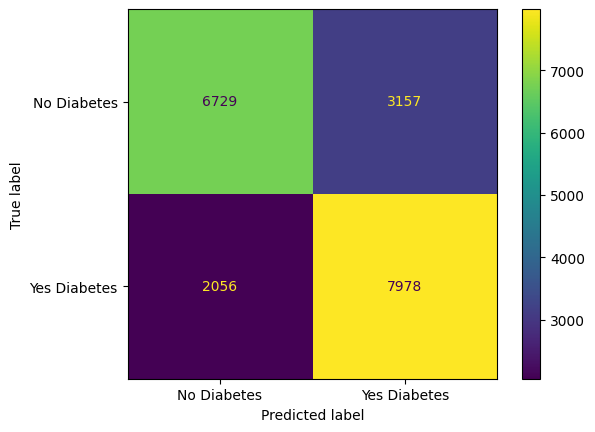

In [ ]:
# Check Performance Model against Test-Set

y_pred_test_svc_2 = svc_pipe.predict(X_test_final)

print('Recall - Test Set   : ', recall_score(y_test, y_pred_test_svc_2), '\n')
print('Classification Report : \n', classification_report(y_test, y_pred_test_svc_2), '\n')
print('Confusion Matrix      : \n', ConfusionMatrixDisplay.from_estimator(svc_pipe, X_test_final, y_test, display_labels=target))

**Explanation**  
The result after cross validation is the test set are simillar which is the model performance with divided 3 different data are still good.

## Decision Tree Classifier Base Model

In [ ]:
# Model Prediction
y_pred_train_dt= dt_class_pipe.predict(X_train_final)
y_pred_test_dt= dt_class_pipe.predict(X_test_final)

### Classification Report Decision Tree Base Model

In [ ]:
# Model Evaluation - Train Set & Test Set
print(classification_report(y_train, y_pred_train_dt))
print(classification_report(y_test, y_pred_test_dt))

              precision    recall  f1-score   support

         0.0       0.99      1.00      1.00     23118
         1.0       1.00      0.99      1.00     23361

    accuracy                           1.00     46479
   macro avg       1.00      1.00      1.00     46479
weighted avg       1.00      1.00      1.00     46479

              precision    recall  f1-score   support

         0.0       0.64      0.64      0.64      9886
         1.0       0.65      0.64      0.65     10034

    accuracy                           0.64     19920
   macro avg       0.64      0.64      0.64     19920
weighted avg       0.64      0.64      0.64     19920



**Explanation**  
Focused on recall with 1.0 (positive diabetes).  
The recall for class 1.0 is 0.99 in the training dataset, indicating an exceptional ability of the Decision Tree to identify true positives for class 1.0. The recall drops significantly to 0.65 in the testing dataset. This means the model correctly identifies 65% of the actual class 1.0.  The stark difference between training and testing performance, particularly in recall, highlights a classic case of overfitting. 

### Confusion Matrix Decision Tree Base Model

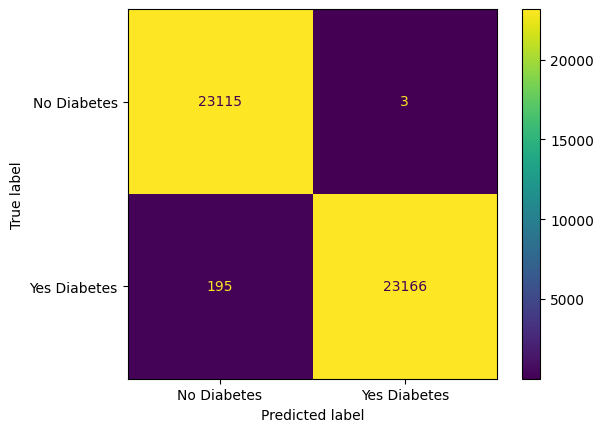

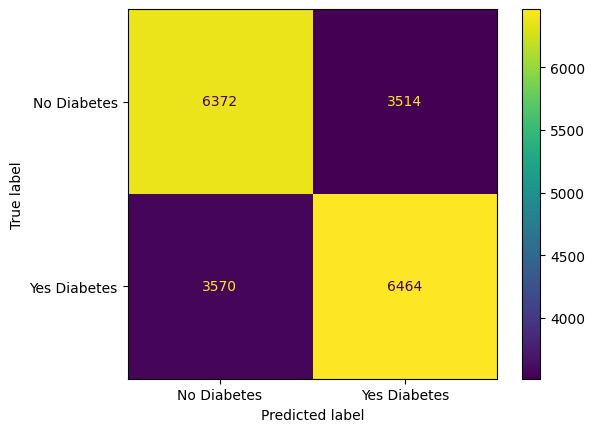

In [ ]:
target = ['No Diabetes', 'Yes Diabetes']
# Confusion matrix for base model
ConfusionMatrixDisplay.from_estimator(dt_class_pipe, X_train_final, y_train, display_labels=target)
ConfusionMatrixDisplay.from_estimator(dt_class_pipe, X_test_final, y_test, display_labels=target)

**Explanation**  
Only focused on False Negative which are cases that actually Diabetes but predicted non diabetes.
From the train set is 3 and test set is 3489. The comparison of percentage between train 0.001% and test 17.8% which are mean the model predict errors for test set larger than train set. This suggests the model are overfitting and also the model aren't fit with recall metric.

### Cross Validation Decision Tree Base Model

In [ ]:
# Cross Validation using `cross_val_score`
dt_recall_train_cross_val = cross_val_score(dt_class_pipe,
                                     X_train_final,
                                     y_train,
                                     cv=3,
                                     scoring="recall")

print('Recall - All - Cross Validation  : ', dt_recall_train_cross_val)
print('Recall - Mean - Cross Validation : ', dt_recall_train_cross_val.mean())
print('Recall - Std - Cross Validation  : ', dt_recall_train_cross_val.std())
print('Recall - Range of Test-Set       : ', (dt_recall_train_cross_val.mean()-dt_recall_train_cross_val.std()) , '-', (dt_recall_train_cross_val.mean()+dt_recall_train_cross_val.std()))

Recall - All - Cross Validation  :  [0.63387697 0.63811481 0.64196738]
Recall - Mean - Cross Validation :  0.6379863875690254
Recall - Std - Cross Validation  :  0.0033041428869317125
Recall - Range of Test-Set       :  0.6346822446820937 - 0.6412905304559571


**Expalanation**  
Cross validation is to check performance of model with cv= 3 which are the train data will be divides 3 different combination. I used recall for the scoring of metric. The result are Mean of recall 0.64, range 0.63 - 0.64.

Recall - Test Set   :  0.6442096870639824 

Classification Report : 
               precision    recall  f1-score   support

         0.0       0.64      0.64      0.64      9886
         1.0       0.65      0.64      0.65     10034

    accuracy                           0.64     19920
   macro avg       0.64      0.64      0.64     19920
weighted avg       0.64      0.64      0.64     19920
 

Confusion Matrix      : 


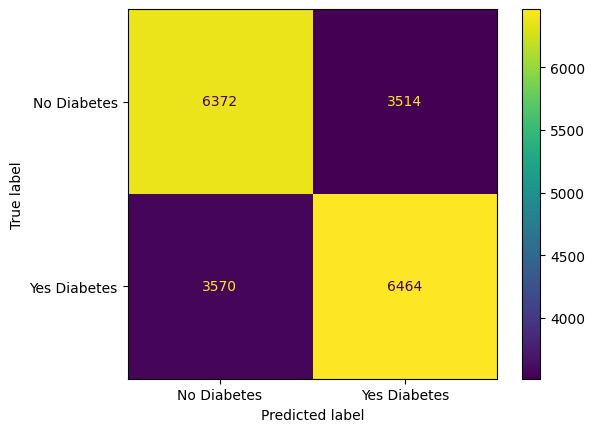

In [ ]:
# Check Performance Model against Test-Set

y_pred_test_dt_2 = dt_class_pipe.predict(X_test_final)

print('Recall - Test Set   : ', recall_score(y_test, y_pred_test_dt_2), '\n')
print('Classification Report : \n', classification_report(y_test, y_pred_test_dt_2), '\n')
print('Confusion Matrix      : \n', ConfusionMatrixDisplay.from_estimator(dt_class_pipe, X_test_final, y_test, display_labels=target))

**Explanation**  
The result after cross validation is the test set are simillar which is the model performance with divided 3 different data are still good.

## Random Forest Classifier Base Model

In [ ]:
# Model Prediction
y_pred_train_rf= rf_class_pipe.predict(X_train_final)
y_pred_test_rf= rf_class_pipe.predict(X_test_final)

### Classification Report Random Forest Base Model

In [ ]:
# Model Evaluation - Train Set & Test Set
print(classification_report(y_train, y_pred_train_rf))
print(classification_report(y_test, y_pred_test_rf))

              precision    recall  f1-score   support

         0.0       0.99      1.00      1.00     23118
         1.0       1.00      0.99      1.00     23361

    accuracy                           1.00     46479
   macro avg       1.00      1.00      1.00     46479
weighted avg       1.00      1.00      1.00     46479

              precision    recall  f1-score   support

         0.0       0.74      0.68      0.71      9886
         1.0       0.71      0.76      0.74     10034

    accuracy                           0.72     19920
   macro avg       0.73      0.72      0.72     19920
weighted avg       0.73      0.72      0.72     19920



**Explanation**  
Focused on recall with 1.0 (positive diabetes).  
The recall for class 1.0 is 0.99 in the training dataset. This exceptional recall rate suggests that the Random Forest model is extremely proficient at identifying class 1.0 instances within the training data. In the testing dataset, the recall for class 1.0 decreases to 0.77. Despite the high performance on the training set, the Random Forest model shows a drop in performance on the testing set, which is typical due to overfitting.

### Confusion Matrix Random Forest Base Model

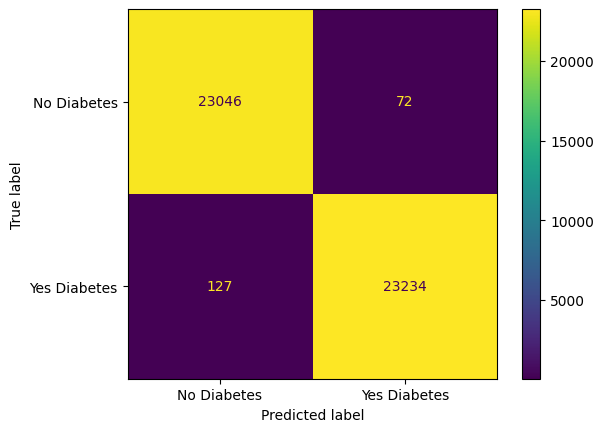

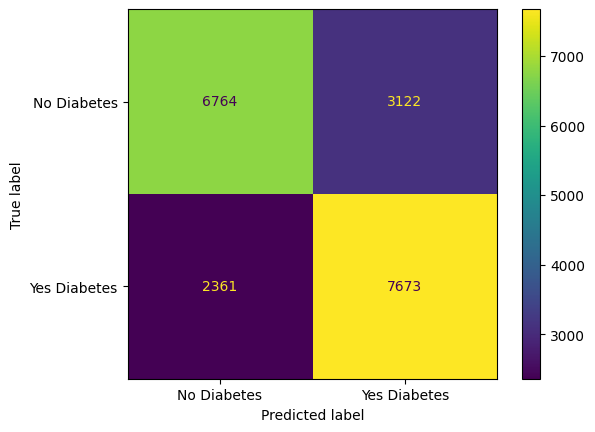

In [ ]:
target = ['No Diabetes', 'Yes Diabetes']
# Confusion matrix for base model
ConfusionMatrixDisplay.from_estimator(rf_class_pipe, X_train_final, y_train, display_labels=target)
ConfusionMatrixDisplay.from_estimator(rf_class_pipe, X_test_final, y_test, display_labels=target)

**Explanation**  
Only focused on False Negative which are cases that actually Diabetes but predicted non diabetes.
From the train set is 72 and test set is 3141. The comparison of percentage between train 0.15% and test 15.6% which are mean the model predict errors for test set larger than train set. It's similiraty with decision tree the model are overfitting and also can't fit with recall metric.

### Cross Validation Random Forest Base Model

In [ ]:
# Cross Validation using `cross_val_score`
rf_recall_train_cross_val = cross_val_score(rf_class_pipe,
                                     X_train_final,
                                     y_train,
                                     cv=3,
                                     scoring="recall")

print('Recall - All - Cross Validation  : ', rf_recall_train_cross_val)
print('Recall - Mean - Cross Validation : ', rf_recall_train_cross_val.mean())
print('Recall - Std - Cross Validation  : ', rf_recall_train_cross_val.std())
print('Recall - Range of Test-Set       : ', (rf_recall_train_cross_val.mean()-rf_recall_train_cross_val.std()) , '-', (rf_recall_train_cross_val.mean()+rf_recall_train_cross_val.std()))

Recall - All - Cross Validation  :  [0.75227944 0.75651727 0.76794658]
Recall - Mean - Cross Validation :  0.758914430032961
Recall - Std - Cross Validation  :  0.006616876064060539
Recall - Range of Test-Set       :  0.7522975539689004 - 0.7655313060970216


**Expalanation**  
Cross validation is to check performance of model with cv= 3 which are the train data will be divides 3 different combination. I used recall for the scoring of metric. The result are Mean of recall 0.76, range 0.75 - 0.76.

Recall - Test Set   :  0.7647000199322305 

Classification Report : 
               precision    recall  f1-score   support

         0.0       0.74      0.68      0.71      9886
         1.0       0.71      0.76      0.74     10034

    accuracy                           0.72     19920
   macro avg       0.73      0.72      0.72     19920
weighted avg       0.73      0.72      0.72     19920
 

Confusion Matrix      : 


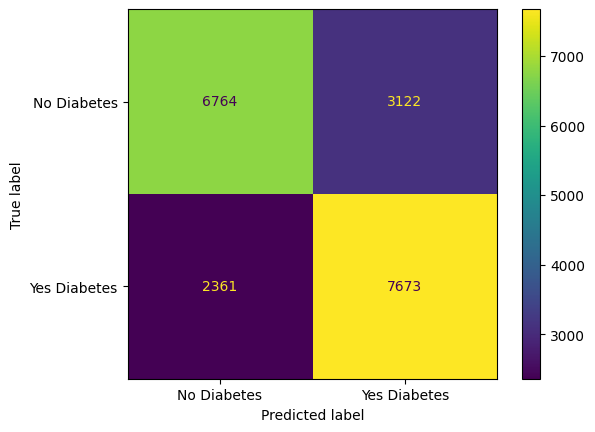

In [ ]:
# Check Performance Model against Test-Set

y_pred_test_rf_2 = rf_class_pipe.predict(X_test_final)

print('Recall - Test Set   : ', recall_score(y_test, y_pred_test_rf_2), '\n')
print('Classification Report : \n', classification_report(y_test, y_pred_test_rf_2), '\n')
print('Confusion Matrix      : \n', ConfusionMatrixDisplay.from_estimator(rf_class_pipe, X_test_final, y_test, display_labels=target))

**Explanation**  
The result after cross validation is the test set are simillar which is the model performance with divided 3 different data are still good.

## Boosting (XGB) Classifier Base Model

In [ ]:
# Model Prediction
y_pred_train_xgb= xgb_class_pipe.predict(X_train_final)
y_pred_test_xgb= xgb_class_pipe.predict(X_test_final)

### Classification Report XGB Base Model

In [ ]:
# Model Evaluation - Train Set & Test Set
print(classification_report(y_train, y_pred_train_xgb))
print(classification_report(y_test, y_pred_test_xgb))

              precision    recall  f1-score   support

         0.0       0.81      0.75      0.77     23118
         1.0       0.77      0.82      0.79     23361

    accuracy                           0.78     46479
   macro avg       0.79      0.78      0.78     46479
weighted avg       0.79      0.78      0.78     46479

              precision    recall  f1-score   support

         0.0       0.76      0.69      0.73      9886
         1.0       0.72      0.78      0.75     10034

    accuracy                           0.74     19920
   macro avg       0.74      0.74      0.74     19920
weighted avg       0.74      0.74      0.74     19920



**Explanation**  
Focused on recall with 1.0 (positive diabetes).  
The recall for class 1.0 is 0.82 in the training data, indicating a strong capability of the XGB model to correctly identify 82% of the true class 1.0 instances. In the testing set, the recall for class 1.0 slightly decreases to 0.78. The XGB model demonstrates a robust performance from training to testing, with a slight decrease in recall for class 1.0 in the testing dataset. The model's ability to generalize well to unseen data is indicated by the relatively minor drop in performance metrics.

### Confusion Matrix XGB Base Model

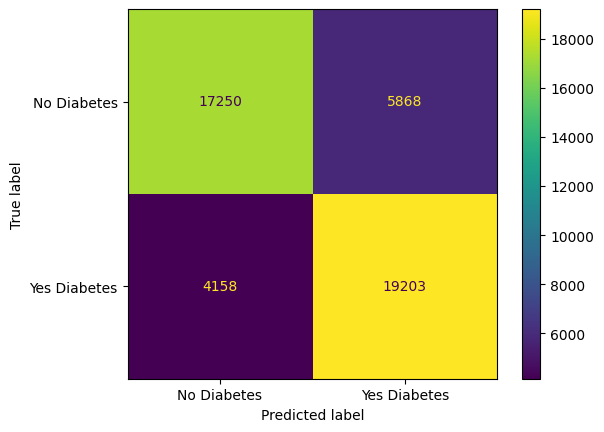

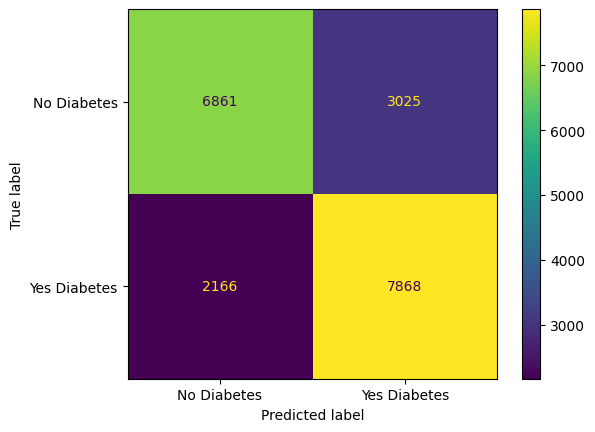

In [ ]:
target = ['No Diabetes', 'Yes Diabetes']
# Confusion matrix for base model
ConfusionMatrixDisplay.from_estimator(xgb_class_pipe, X_train_final, y_train, display_labels=target)
ConfusionMatrixDisplay.from_estimator(xgb_class_pipe, X_test_final, y_test, display_labels=target)

**Explanation**  
Only focused on False Negative which are cases that actually Diabetes but predicted non diabetes.
From the train set is 5868 and test set is 3025. The comparison of percentage between train 12.6 and test 15.2% which are mean the model predict errors for test set larger than train set. This suggests the model are overfitting. This percentage of test are the lowest of other model.

### Cross Validation XGB Base Model

In [ ]:
# Cross Validation using `cross_val_score`
xgb_recall_train_cross_val = cross_val_score(xgb_class_pipe,
                                     X_train_final,
                                     y_train,
                                     cv=3,
                                     scoring="recall")

print('Recall - All - Cross Validation  : ', xgb_recall_train_cross_val)
print('Recall - Mean - Cross Validation : ', xgb_recall_train_cross_val.mean())
print('Recall - Std - Cross Validation  : ', xgb_recall_train_cross_val.std())
print('Recall - Range of Test-Set       : ', (xgb_recall_train_cross_val.mean()-xgb_recall_train_cross_val.std()) , '-', (xgb_recall_train_cross_val.mean()+xgb_recall_train_cross_val.std()))

Recall - All - Cross Validation  :  [0.77051496 0.77205599 0.78130217]
Recall - Mean - Cross Validation :  0.7746243739565943
Recall - Std - Cross Validation  :  0.0047636411945528
Recall - Range of Test-Set       :  0.7698607327620416 - 0.7793880151511471


**Expalanation**  
Cross validation is to check performance of model with cv= 3 which are the train data will be divides 3 different combination. I used recall for the scoring of metric. The result are Mean of recall 0.77, range 0.77 - 0.78.

Recall - Test Set   :  0.7841339445883995 

Classification Report : 
               precision    recall  f1-score   support

         0.0       0.76      0.69      0.73      9886
         1.0       0.72      0.78      0.75     10034

    accuracy                           0.74     19920
   macro avg       0.74      0.74      0.74     19920
weighted avg       0.74      0.74      0.74     19920
 

Confusion Matrix      : 


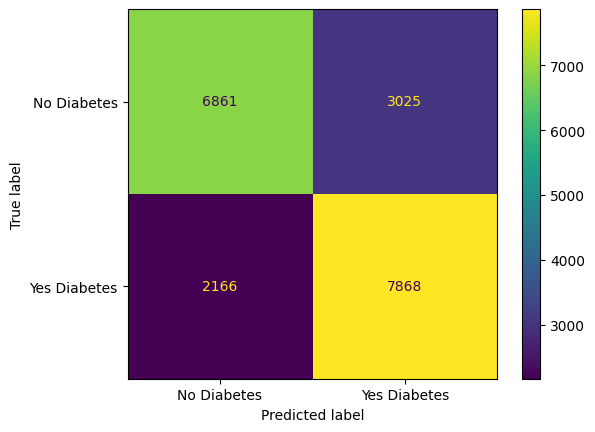

In [ ]:
# Check Performance Model against Test-Set

y_pred_test_xgb_2 = xgb_class_pipe.predict(X_test_final)

print('Recall - Test Set   : ', recall_score(y_test, y_pred_test_xgb_2), '\n')
print('Classification Report : \n', classification_report(y_test, y_pred_test_xgb_2), '\n')
print('Confusion Matrix      : \n', ConfusionMatrixDisplay.from_estimator(xgb_class_pipe, X_test_final, y_test, display_labels=target))

**Explanation**  
The result after cross validation is the test set are simillar which is the model performance with divided 3 different data are still good.

## Summary Model Evaluation result from each base model

| Model | Recall |
|---|---|
| KNN - Train | 0.81 |
| KNN - Test | 0.73 |
| SVC - Train | 0.79 |
| SVC - Test | 0.80 |
| Decision Tree - Train | 0.99 |
| Decision Tree - Test | 0.65 |
| Random Forest - Train | 0.99 |
| Random Forest - Test | 0.77 |
| XGB - Train | 0.82 |
| XGB - Test | 0.78 |

There are summary of model evaluation table. From the table we have some insight:  
KNN, Decision Tree, and Random Forest models have train and test values that are quite far away, this indicates inconsistency and the model is also overfit. while the svc and xgb models are the 2 best models. SVC has fairly consistent train and test values. XGB also has fairly consistent train and test values, but slightly overfit. So, I have 2 best model from the base model evaluation. Let's see the advantages and disadvantages between SVC and XGB to decide the model that I used.

**SVC**  
Advantages:
- Effective in High-Dimensional Spaces: Works well with a large number of features.
- Kernel Trick: Can solve nonlinear problems by using kernel functions to transform data into higher-dimensional space.
- Robustness: Less prone to overfitting when the correct kernel is used.

Disadvantages:
- Computationally Intensive: Not suitable for large datasets as the training time complexity is high.
- Parameter Sensitivity: Choosing the correct kernel and tuning parameters can be challenging and has a significant impact on the model's performance.
- No Direct Probability Estimates: Computing probabilities requires expensive five-fold cross-validation.

**XGB**  
Advantages:  
- Performance and Speed: XGB is optimized for performance and can handle large datasets efficiently.
- Regularization: Includes regularization parameters that help prevent overfitting.
- Flexibility: Allows for custom optimization objectives and evaluation criteria.  

Disadvatages:
- Parameter Tuning: Has a large number of hyperparameters that require tuning for optimal performance, which can be time-consuming.
- Complexity: More complex than simpler models, which can lead to a steep learning curve.
- Resource-Intensive: For very large datasets, XGB can require a significant amount of memory and processing power.

From the comparison of advantages and disadvantages between SVC and XGB. Also, from the performance of the model on False Negative, SVC have 3157 wrong predict at FN. Meanwhile, XGB have 3025 wrong predict at FN. So, XGB is better than SVC to predict with recall metric. I decide to `XGB` as model that I used for the predict diabetes status.  

**Note : This decision is highly subjetive to each personal perspective might not reprensent the actual best model. Additional research still needed for more conclusive result!**  

## Hyperparameter Tuning

**Intoduction**  
Hyperparameter tuning is the process of selecting the best set of parameters that are not learned directly from the data but that determine the structure and behavior of a machine learning model. The goal is to improve model performance, prevent overfitting or underfitting, ensure computational efficiency, and customize the model to match the unique characteristics of each dataset. The end result is a more accurate and effective model.

In [ ]:
# Parameter distributions for RandomizedSearchCV for XGBClassifier
random_search_params_xgb = {
    'xgb_class__max_depth': [3, 4, 5, 6, 7, 8, 9, 10],
    'xgb_class__learning_rate': [0.01, 0.05, 0.1, 0.15, 0.2],
    'xgb_class__n_estimators': [100, 200, 300, 400, 500],
    'xgb_class__min_child_weight': [1, 2, 3, 4],
    'xgb_class__gamma': [0.0, 0.1, 0.2, 0.3, 0.4],
    'xgb_class__colsample_bytree': [0.6, 0.7, 0.8, 0.9, 1.0],
    'xgb_class__reg_alpha': [0.0, 0.1, 0.5, 1.0],
    'xgb_class__reg_lambda': [0.0, 0.1, 0.5, 1.0],
    'xgb_class__random_state': [42]
}

**Explanation**  
The parameter of xgb are sets.

In [ ]:
# Train with Random Search for XGBClassifier
xgb_randomcv = RandomizedSearchCV(estimator=xgb_class_pipe,
                                 param_distributions=random_search_params_xgb,
                                 cv=5,
                                 scoring='recall')
xgb_randomcv
# xgb_randomcv.fit(X_train_final, y_train)

RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('transformer',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('scaler',
                                                                               MinMaxScaler(),
                                                                               ['BMI',
                                                                                'HighBP',
                                                                                'HighChol',
                                                                                'CholCheck',
                                                                                'Smoker',
                                                                                'Stroke',
                                                                                'HeartDiseaseorAttack',
                                                                                'PhysActivity',
                                                                                'Fruits',
                                                                                'Veggies',
                                                                                'HvyAlcoholConsump',
                                                                                'AnyHealthcare',
                                                                                'NoDocbcCost',
                                                                                'GenHlth',
                                                                                'PhysHlth',
                                                                                'DiffWalk',
                                                                                'Sex',
                                                                                'A...
                                        'xgb_class__gamma': [0.0, 0.1, 0.2, 0.3,
                                                             0.4],
                                        'xgb_class__learning_rate': [0.01, 0.05,
                                                                     0.1, 0.15,
                                                                     0.2],
                                        'xgb_class__max_depth': [3, 4, 5, 6, 7,
                                                                 8, 9, 10],
                                        'xgb_class__min_child_weight': [1, 2, 3,
                                                                        4],
                                        'xgb_class__n_estimators': [100, 200,
                                                                    300, 400,
                                                                    500],
                                        'xgb_class__random_state': [42],
                                        'xgb_class__reg_alpha': [0.0, 0.1, 0.5,
                                                                 1.0],
                                        'xgb_class__reg_lambda': [0.0, 0.1, 0.5,
                                                                  1.0]},
                   scoring='recall')

**Explanation**  
I used hyperparameter tuning with randomized because these method are randomly selects combinations of hyperparameters to find the best model, making it faster than methods that try every possible combination. It's very useful when resources are limited or quick results are needed. Then, the estimator are the pipeline xgb base model, also I used scoring for recall.

In [ ]:
xgb_randomcv.fit(X_train_final, y_train)

RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('transformer',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('scaler',
                                                                               MinMaxScaler(),
                                                                               ['BMI',
                                                                                'HighBP',
                                                                                'HighChol',
                                                                                'CholCheck',
                                                                                'Smoker',
                                                                                'Stroke',
                                                                                'HeartDiseaseorAttack',
                                                                                'PhysActivity',
                                                                                'Fruits',
                                                                                'Veggies',
                                                                                'HvyAlcoholConsump',
                                                                                'AnyHealthcare',
                                                                                'NoDocbcCost',
                                                                                'GenHlth',
                                                                                'PhysHlth',
                                                                                'DiffWalk',
                                                                                'Sex',
                                                                                'A...
                                        'xgb_class__gamma': [0.0, 0.1, 0.2, 0.3,
                                                             0.4],
                                        'xgb_class__learning_rate': [0.01, 0.05,
                                                                     0.1, 0.15,
                                                                     0.2],
                                        'xgb_class__max_depth': [3, 4, 5, 6, 7,
                                                                 8, 9, 10],
                                        'xgb_class__min_child_weight': [1, 2, 3,
                                                                        4],
                                        'xgb_class__n_estimators': [100, 200,
                                                                    300, 400,
                                                                    500],
                                        'xgb_class__random_state': [42],
                                        'xgb_class__reg_alpha': [0.0, 0.1, 0.5,
                                                                 1.0],
                                        'xgb_class__reg_lambda': [0.0, 0.1, 0.5,
                                                                  1.0]},
                   scoring='recall')

**Explanation**  
XGB_randomcv are train the model.

In [ ]:
# Get Best Hyperparameters
xgb_randomcv.best_params_

{'xgb_class__reg_lambda': 0.5,
 'xgb_class__reg_alpha': 1.0,
 'xgb_class__random_state': 42,
 'xgb_class__n_estimators': 300,
 'xgb_class__min_child_weight': 4,
 'xgb_class__max_depth': 4,
 'xgb_class__learning_rate': 0.15,
 'xgb_class__gamma': 0.2,
 'xgb_class__colsample_bytree': 0.8}

**Explanation**  
the data above is the best parameter that from randomizecv. 

In [ ]:
# Get Best Estimator
xgb_randomcv_best = xgb_randomcv.best_estimator_

**Explanation**  
defined xgb_randomcv with best parameter.

Recall Score - Test Set   :  0.7961929439904325 

Classification Report : 
               precision    recall  f1-score   support

         0.0       0.77      0.69      0.73      9886
         1.0       0.72      0.80      0.76     10034

    accuracy                           0.75     19920
   macro avg       0.75      0.74      0.74     19920
weighted avg       0.75      0.75      0.74     19920
 

Confusion Matrix      : 


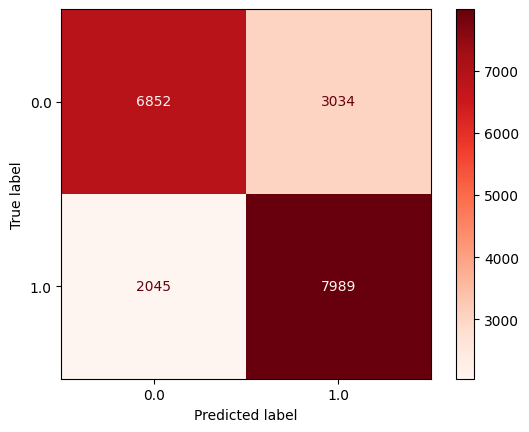

In [ ]:
# Check Performance Model against Test-Set
y_pred_test_tuned = xgb_randomcv_best.predict(X_test_final)

print('Recall Score - Test Set   : ', recall_score(y_test, y_pred_test_tuned), '\n')
print('Classification Report : \n', classification_report(y_test, y_pred_test_tuned), '\n')
print('Confusion Matrix      : \n', ConfusionMatrixDisplay.from_estimator(xgb_randomcv_best, X_test_final, y_test, cmap='Reds'))

**Explanation**  
From classification report focused on recall with 1.0 (positive diabetes). There is increase recall values from XGB base model. Here the comparison between XGB base model and XGB after hyperparameter tuning as we called XGB tuning.

| Model | Precision | Recall | f1-score |
|---|---|---|---|
| XGB base model | 0.72 | 0.78 | 0.75 | 0.74 |
| XGB tuning | 0.73 | 0.80 | 0.76 | 0.75 |

All of parameter classification report have increasing. That's Great.

Next, from the confusion matrix focused on False Negative. It's lower than XGB base model.


In [ ]:
# Cross Validation using `cross_val_score`
xgb_tuned_recall_train_cross_val = cross_val_score(xgb_randomcv_best,
                                     X_train_final,
                                     y_train,
                                     cv=3,
                                     scoring="recall")

print('Recall - All - Cross Validation  : ', xgb_tuned_recall_train_cross_val)
print('Recall - Mean - Cross Validation : ', xgb_tuned_recall_train_cross_val.mean())
print('Recall - Std - Cross Validation  : ', xgb_tuned_recall_train_cross_val.std())
print('Recall - Range of Test-Set       : ', (xgb_tuned_recall_train_cross_val.mean()-xgb_tuned_recall_train_cross_val.std()) , '-', (xgb_tuned_recall_train_cross_val.mean()+xgb_tuned_recall_train_cross_val.std()))

Recall - All - Cross Validation  :  [0.78515475 0.78412739 0.79363041]
Recall - Mean - Cross Validation :  0.7876375155173152
Recall - Std - Cross Validation  :  0.0042583211730477044
Recall - Range of Test-Set       :  0.7833791943442675 - 0.7918958366903629


**Expalanation**  
Cross validation is to check performance of model with cv= 3 which are the train data will be divides 3 different combination. I used recall for the scoring of metric. The result are Mean of recall 0.79, range 0.78 - 0.79.

Recall - Test Set   :  0.7961929439904325 

Classification Report : 
               precision    recall  f1-score   support

         0.0       0.77      0.69      0.73      9886
         1.0       0.72      0.80      0.76     10034

    accuracy                           0.75     19920
   macro avg       0.75      0.74      0.74     19920
weighted avg       0.75      0.75      0.74     19920
 

Confusion Matrix      : 


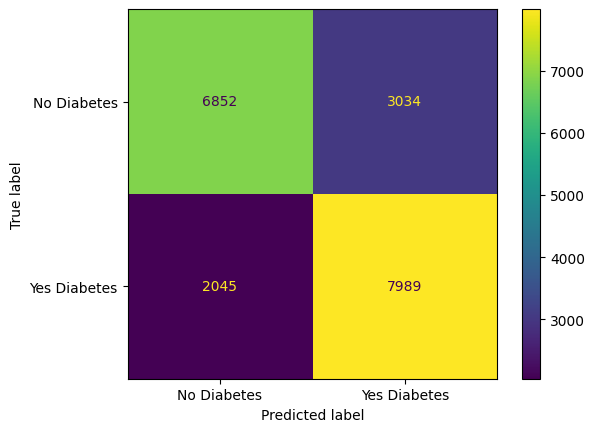

In [ ]:
# Check Performance Model against Test-Set

y_pred_test_xgb_tuned = xgb_randomcv_best.predict(X_test_final)

print('Recall - Test Set   : ', recall_score(y_test, y_pred_test_xgb_tuned), '\n')
print('Classification Report : \n', classification_report(y_test, y_pred_test_xgb_tuned), '\n')
print('Confusion Matrix      : \n', ConfusionMatrixDisplay.from_estimator(xgb_randomcv_best, X_test_final, y_test, display_labels=target))

**Explanation**  
The result after cross validation is the test set are simillar which is the model performance with divided 3 different data are still good.

# **9. Model Saving**

In [ ]:
# Saving the model
with open('model.pkl', 'wb') as file_1:
    pickle.dump(xgb_randomcv_best, file_1)

**Explanation**  
The code above saves the best model overall, which is Hyperparameter Tuned XGB model into a file named 'model.pkl' using Python's pickle module.

# **10. Model Inference**

**Note**   
The model inference process move to file fazrinmuh_inf.ipynb

# **11. Conclusions**  

## Model Analysis

| Model | Precision | Recall | f1-score | Accuracy |
|---|---|---|---|---|
| KNN - Train | 0.78 | 0.81 | 0.79 | 0.79 |
| KNN - Test | 0.69 | 0.73 | 0.71 | 0.71 |
| SVC - Train | 0.72 | 0.79 | 0.76 | 0.74 |
| SVC - Test | 0.72 | 0.80 | 0.75 | 0.74 |
| Decision Tree - Train | 1.00 | 0.99 | 1.00 | 1.00 |
| Decision Tree - Test | 0.65 | 0.65 | 0.65 | 0.64 |
| Random Forest - Train | 1.00 | 0.99 | 1.00 | 1.00 |
| Random Forest - Test | 0.71 | 0.77 | 0.74 | 0.73 |
| XGB - Train | 0.72 | 0.82 | 0.79 | 0.78 |
| XGB - Test | 0.72 | 0.78 | 0.75 | 0.74 |

**Model Performance**  
Recall as metric used. By using Recall to make sure the False Negative which is people who were predicted non diabetes but were in fact diabetes.
- KNN  
Training: Recall 0.81 shows that KNN is quite effective in identifying positive cases in the training data.
Testing: There was a decrease in recall to 0.73 in the testing data, indicating a decrease in the model's ability to recognize positive cases in new data. Despite the decrease, KNN still shows reasonable generalization ability.
- SVC  
Training: Recall of 0.79 indicates that SVC is quite good at identifying positive cases during training.
Testing: Increased slightly to 0.80 on the testing data, showing the ability of SVC to maintain or even improve the ability to recognize positive cases on unknown data.
- Decision Tree  
Training: Almost perfect recall (0.99) indicates the model is excellent in training but is concerned about overfitting.
Testing: Recall dropped dramatically to 0.65, confirming overfitting concerns and indicating the model failed to maintain its ability to recognize positive cases on new data.
- Random Forest  
Training: Similar to Decision Tree, perfect recall (0.99) in training indicates potential overfitting.
Testing: Recall in testing is 0.77, which is better than Decision Tree, indicating that Random Forest has better generalization ability, possibly due to the effect of variance reduction through bagging.
- XGB  
Training: Recall of 0.82 indicates that XGBoost is very effective in identifying positive cases in training and has little advantage over other models in this regard.
Testing: Recall 0.78 on testing data shows a small decrease from training, indicating that XGBoost has good generalization ability and is consistent in recognizing positive cases in new data.

From the comparison of advantages and disadvantages between SVC and XGB. Also, from the performance of the model on False Negative, SVC have 3157 wrong predict at FN. Meanwhile, XGB have 3025 wrong predict at FN. So, XGB is better than SVC to predict with recall metric. This project decide to `XGB` as model that used for the predict diabetes status.

Comparison XGB Base Model and XGB Tuning.
| Model | Precision | Recall | f1-score |
|---|---|---|---|
| XGB base model | 0.72 | 0.78 | 0.75 | 0.74 |
| XGB tuning | 0.73 | 0.80 | 0.76 | 0.75 |

## EDA

1. Comparison Diabetes Status  
From the overall comparison diabetes status of dataset, we have 50.3% that negative diabetes and 49.7% that positive diabetes.
2. Distribution of `BMI` and `Age` by Diabetes Status  
    - BMI distribution for both of diabetes status have a roughly normal distribution, but the distribution for individuals with diabetes is shifted to the right. This indicates, on average of diabetes have higher BMI than those without diabetes.
    - The age distribution for diabetes is generally skewed to the right, showing that older age groups have higher frequencies of diabetes. Then, for non diabetes the age distribution seems relatively uniform, but with a slight increase in frequency in the middle age ranges. Anyway, the diabetes is more prevalent in older population.
3. Diabetes status by Health Risk Factor
    - A larger number of individuals with high blood pressure also have diabetes compared to those who don't have high blood pressure. This suggest, a strong association between high blood pressure and diabetes.
    - Similar to high blood pressure, high cholesterol levels are also more common in individuals with diabetes than in those without. This could indicate that high cholesterol is another condition that is commonly associated with diabetes.
    - The difference between smokers and non-smokers in terms of diabetes prevalence is less pronounced than in the cases of high blood pressure or cholesterol. Smoking does not appear to show a clear pattern of association with diabetes in this data.
    - Individuals that have history of stroke also tend to have higher rates of diabetes. There appears to be an association between the incidence of stroke and diabetes.
    - There are more individuals with diabetes who have had a heart disease or attack than those without diabetes. This suggests that there is significant assocation between diabetes and heart-related health issues.
    - There is difference in the consumption of fruits between diabetes and non-diabetes individuals, with non-diabetics more likely to consume fruits. This suggests that a potential assocation between fruits consumption and diabetes rates
    - Like with fruits, a greater proportion of non-diabetics consume vegetables. This also suggests a potential assocation between vegetable consumption and lower diabetes rates
    - The heavy alcohol consumption have fewer individuals with diabetes compared to those without. Then, Iindividuals who do not consume alcohol heavily, there are more individuals with diabetes than without.
4. Diabetes Status by `Education` and `Sex`
    - Education is ordinal categorical, for both diabetes status have majority of population a higher level education. However, the education level might indicate have relationship with diabetes status, possibly due to factors like better health awareness and lifestyle choices associated with higher education levels.
    - The bar chart compares the count of individuals with and without diabetes between two sex categories, typically '0' represent females and '1' represent males. Males has a slightly higher count of individuals with diabetes compared to females.


## Further Experiments Recommendation

1. Explore EDA For More Insights
2. Use SVC to be best model because the SVC showed good stability between training and testing data, even improving slightly its ability to recognize positive cases.
3. Conduct trial and error to see the overall performance of the model.
4. Integrate the modeled system with the larger system to be used by users. 

# Overall Analysis

This diabetes status prediction project confirms the superiority of XGBoost after hyperparameter tuned with 80% recall score as the model of choice with a special focus on minimizing False Negatives, a crucial aspect to ensure that no cases of diabetes are missed. An in-depth analysis of model performance revealed that XGBoost, especially after tuning, outperforms other models in terms of recall, making it highly effective in identifying positive cases in both training and testing data.

From data exploration, we gained valuable insights into the distribution and characteristics of diabetes risk factors. Factors such as BMI, age, high blood pressure, and high cholesterol were shown to have a strong correlation with the prevalence of diabetes. This underlines the importance of including these variables in the predictive model and highlights the relevance of lifestyle and dietary choices in disease prevention. Additionally, the analysis suggests that higher education may be associated with a lower risk of diabetes, indicating the role of health awareness and lifestyle choices.

Overall, this project not only achieved its goal of developing a reliable predictive model but also provided deep insights into the dynamics of diabetes. It paves the way for further investigation and potential data-based interventions that can target specific risk factors, as well as inform public health campaigns to enhance awareness and prevention of diabetes.

Moving forward, it's important to consider integrating broader data that includes lifestyle and genetic factors to improve the model's accuracy. Implementing this approach will not only enhance our understanding of diabetes but also aid in the development of more effective intervention strategies, which in turn could lower the prevalence rate of the disease.